In [ ]:
!pip install opendatasets

In [ ]:
!pip install scikit-learn --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.9 MB/s eta 0:00:00


In [ ]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/urstrulyvikas/house-loan-data-analysis/data'

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bhavvyaaparmar
Your Kaggle Key: ··········


100%|██████████| 36.1M/36.1M [00:00<00:00, 146MB/s]


In [ ]:
path = os.getcwd()

In [ ]:
file = path +'/house-loan-data-analysis/loan_data.csv'
df = pd.read_csv(file)
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
data_columns = df.columns[:20]

In [ ]:
df = df[data_columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [ ]:
df.isna().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
dtype: int64

In [ ]:
df['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [ ]:
pd.DataFrame(df['NAME_TYPE_SUITE']).value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [ ]:
df['NAME_TYPE_SUITE'].fillna(value='unknown',inplace=True)

<ipython-input-16-bc7b838567f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NAME_TYPE_SUITE'].fillna(value='unknown',inplace=True)


In [ ]:
pd.DataFrame(df['NAME_TYPE_SUITE']).value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
unknown              1292
Other_A               866
Group of people       271
Name: count, dtype: int64

In [ ]:
df.dropna(subset=['AMT_ANNUITY','AMT_GOODS_PRICE'],inplace=True)

<ipython-input-18-71550bd73e28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['AMT_ANNUITY','AMT_GOODS_PRICE'],inplace=True)


In [ ]:
df.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
dtype: int64

In [ ]:
df.shape

(307221, 20)

In [ ]:
input_df = df[data_columns].copy()
input_df = input_df.drop(labels=['TARGET'],axis=1)
input_df

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002         Cash loans           M            N   
1           100003         Cash loans           F            N   
2           100004    Revolving loans           M            Y   
3           100006         Cash loans           F            N   
4           100007         Cash loans           M            N   
...            ...                ...         ...          ...   
307506      456251         Cash loans           M            N   
307507      456252         Cash loans           F            N   
307508      456253         Cash loans           F            N   
307509      456254         Cash loans           F            N   
307510      456255         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment                    0.025164      -20775   
307508  House / apartment                    0.005002      

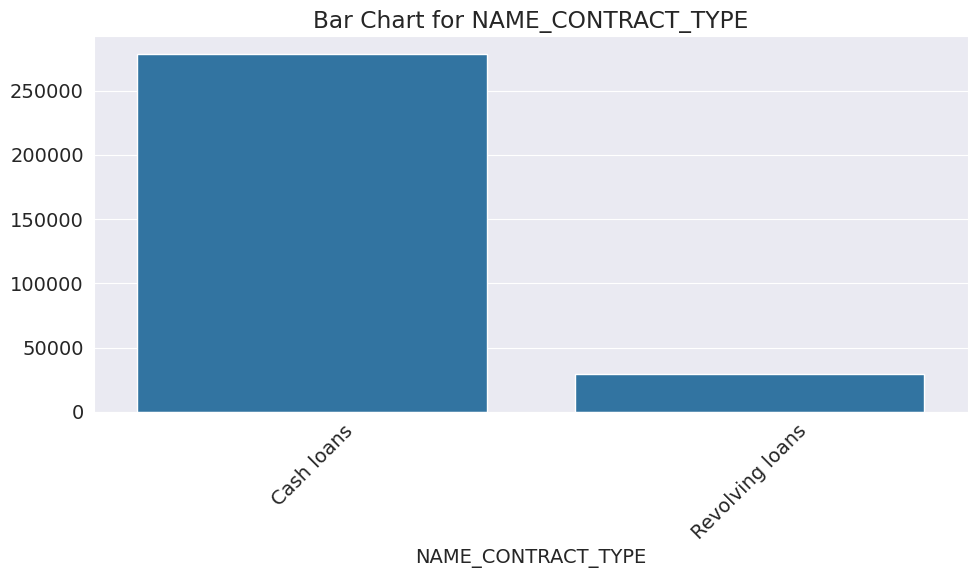

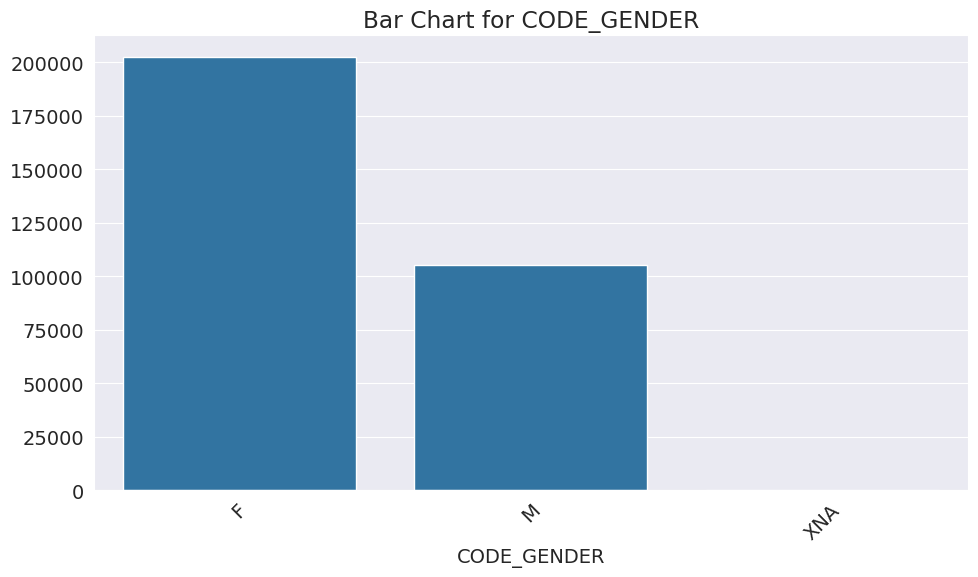

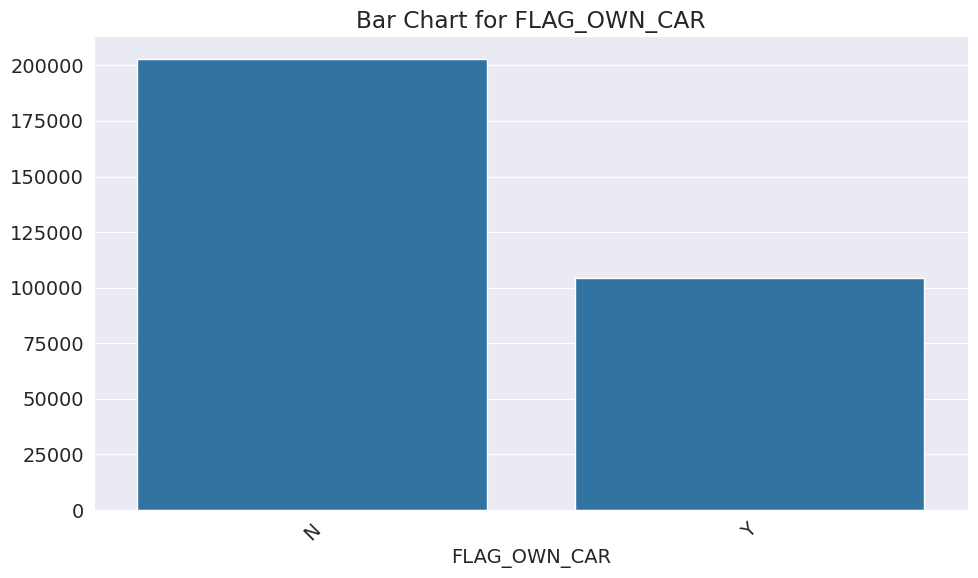

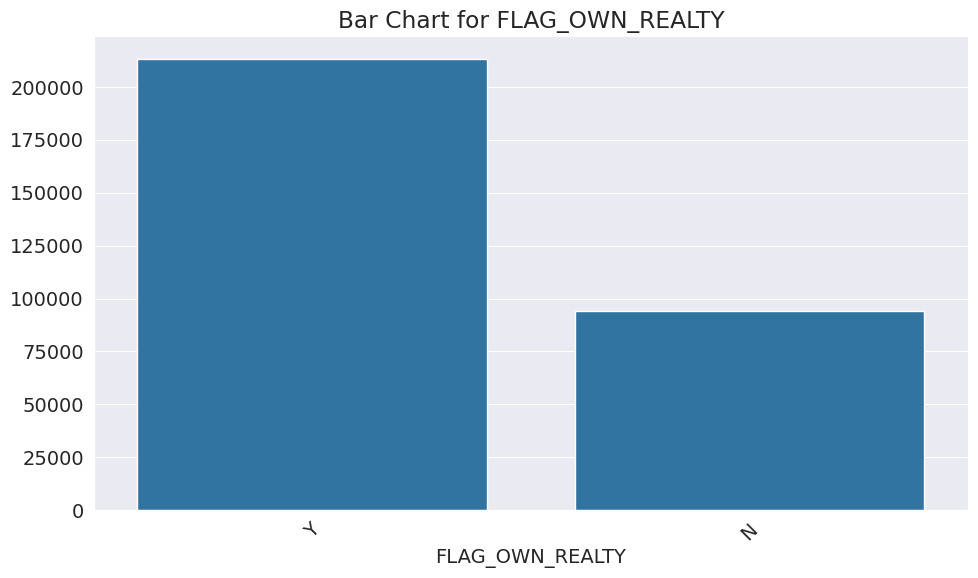

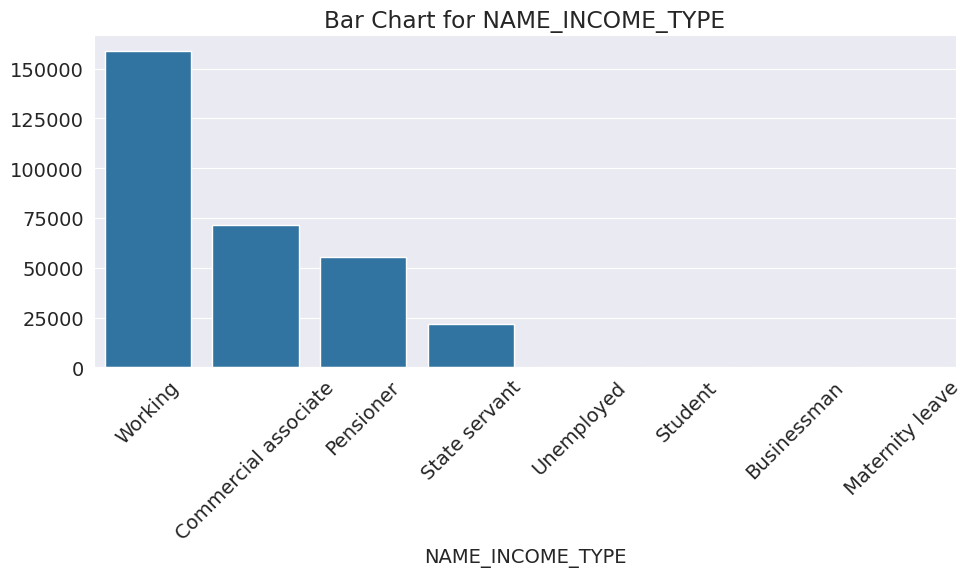

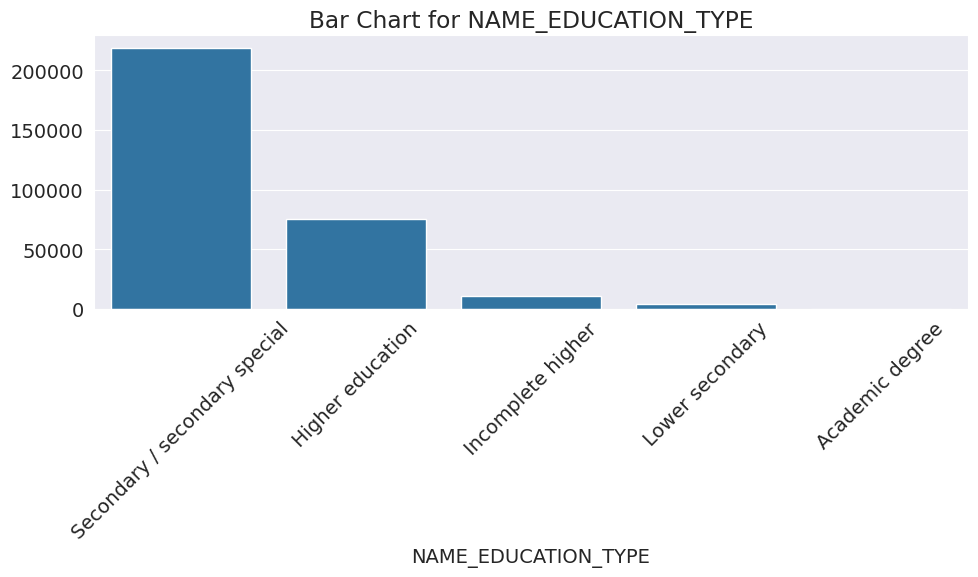

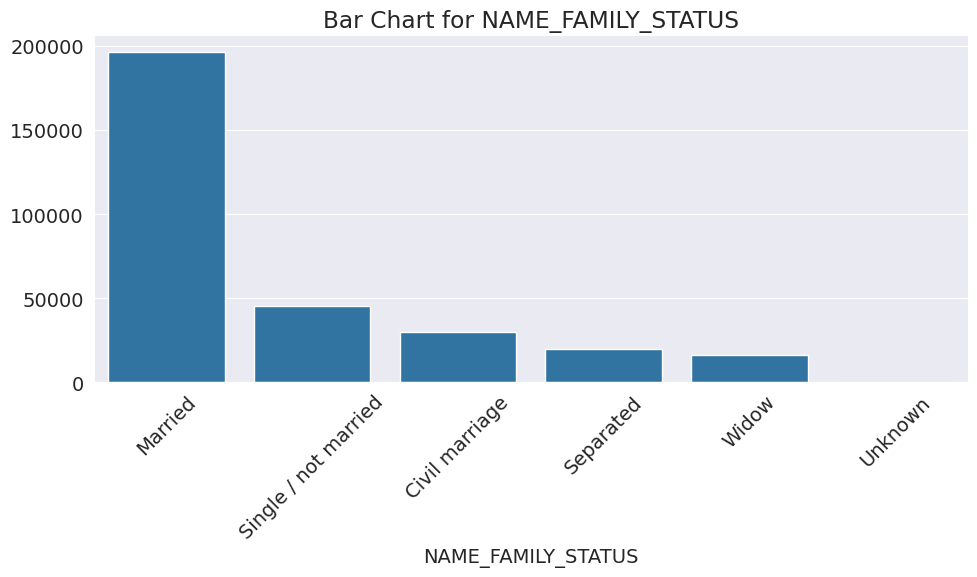

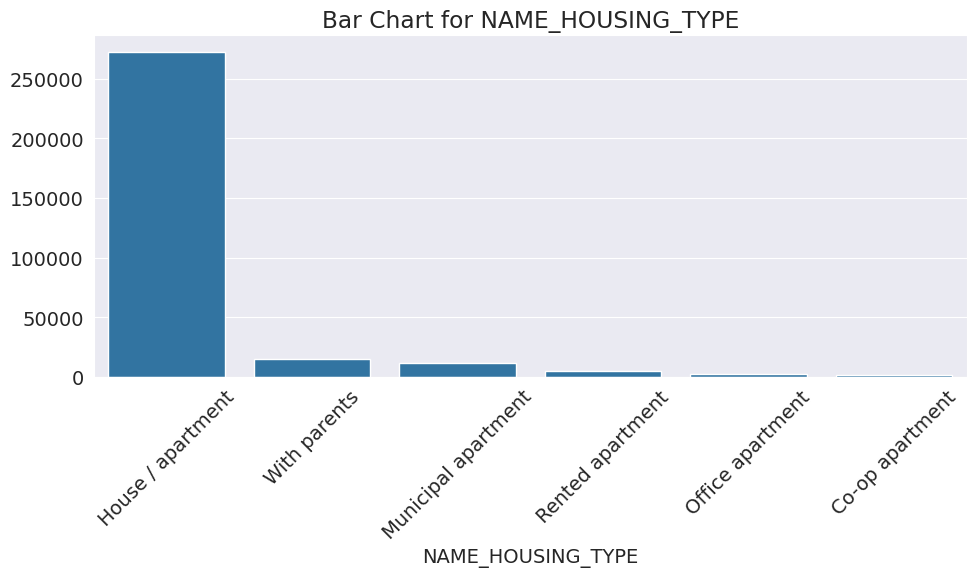

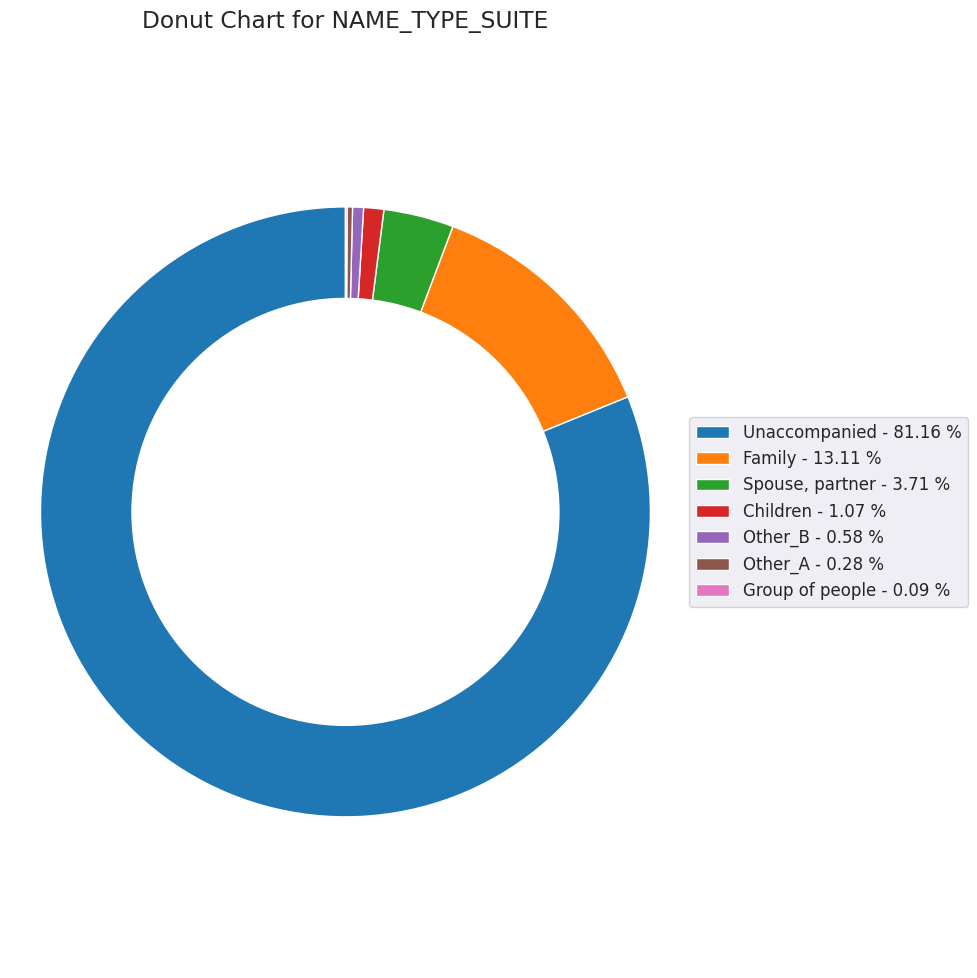

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
loan_df = pd.read_csv('/content/house-loan-data-analysis/loan_data.csv')  # Make sure to update the path to your CSV file

# Define the categorical columns for which you want to create charts
categorical_columns = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'
]

# Create bar charts for categorical columns
for column in categorical_columns:
    if column != 'NAME_TYPE_SUITE':  # We will handle 'NAME_TYPE_SUITE' with a pie chart
        plt.figure(figsize=(10, 6))
        value_counts = loan_df[column].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Bar Chart for {column}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Pie chart for 'NAME_TYPE_SUITE'
value_counts = loan_df['NAME_TYPE_SUITE'].value_counts()

# Set up the pie chart plot
plt.figure(figsize=(10, 10))
plt.pie(value_counts, labels=None, startangle=90)
plt.title('Donut Chart for NAME_TYPE_SUITE', pad=20)

# Draw a circle in the center for a donut look
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Define legend with the percentages
legend_labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(value_counts.index, value_counts*100/value_counts.sum())]
plt.legend(labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.axis('equal')  # Ensures the pie/donut chart is a circle
plt.tight_layout()
plt.show()


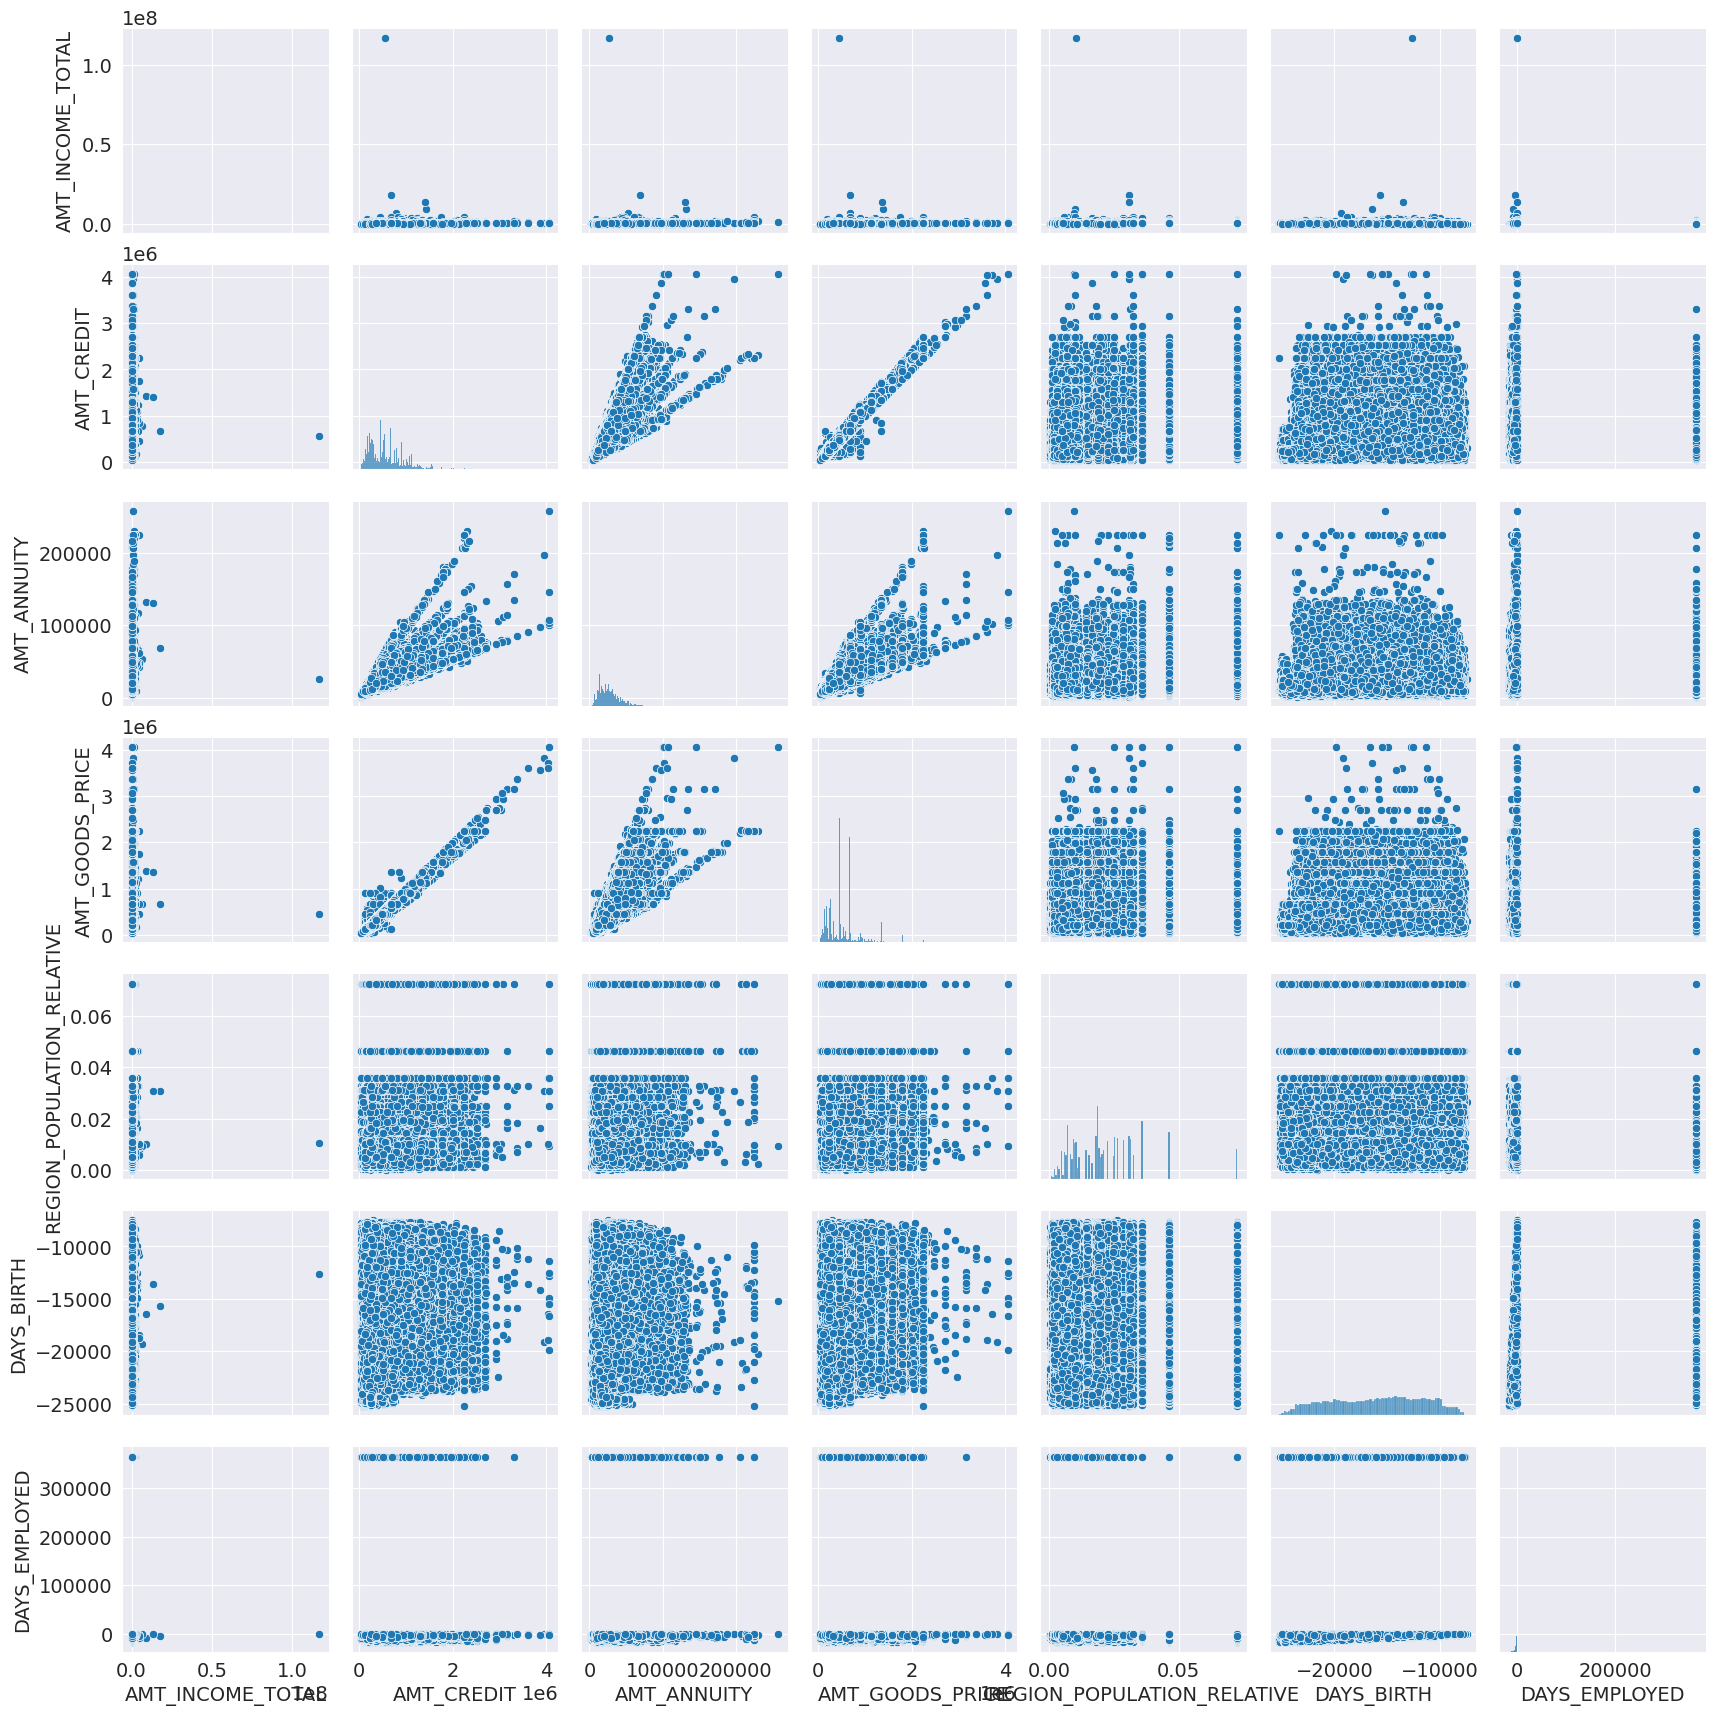

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
loan_df = pd.read_csv('/content/house-loan-data-analysis/loan_data.csv')  # Replace with the actual path to your CSV file

# Select a subset of variables for multivariate analysis, ideally numerical
# Replace these with the names of the actual numerical columns you're interested in
selected_columns = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED'
]

# Create a pairplot
sns.pairplot(loan_df[selected_columns])

plt.show()


In [46]:
import pandas as pd

# Load the dataset
loan_df = pd.read_csv('/content/house-loan-data-analysis/loan_data.csv')  # Replace with the actual path to your dataset

# Calculate the percentage of missing data in each column
missing_data = loan_df.isnull().mean() * 100
print("Percentage of Missing Data:\n", missing_data[missing_data > 0].sort_values(ascending=False))


Percentage of Missing Data:
 COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
                              ...    
EXT_SOURCE_2                 0.214626
AMT_GOODS_PRICE              0.090403
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
DAYS_LAST_PHONE_CHANGE       0.000325
Length: 67, dtype: float64


In [47]:
def detect_outliers_iqr(dataframe):
    outlier_indices = []
    # For each feature calculate Q1 (25th percentile) and Q3 (75th percentile) and the IQR
    for col in dataframe.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    # Select observations containing more than 2 outliers
    outlier_indices = list(set(outlier_indices))
    print(f'Number of outliers detected: {len(outlier_indices)}')
    return dataframe.iloc[outlier_indices]

# Call the function
outliers_df = detect_outliers_iqr(loan_df)
print(outliers_df)


Number of outliers detected: 280703
        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0    

In [48]:
# Find duplicate rows
duplicates = loan_df[loan_df.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])

# If needed, drop duplicates
# loan_df = loan_df.drop_duplicates()


Number of duplicate rows: 0


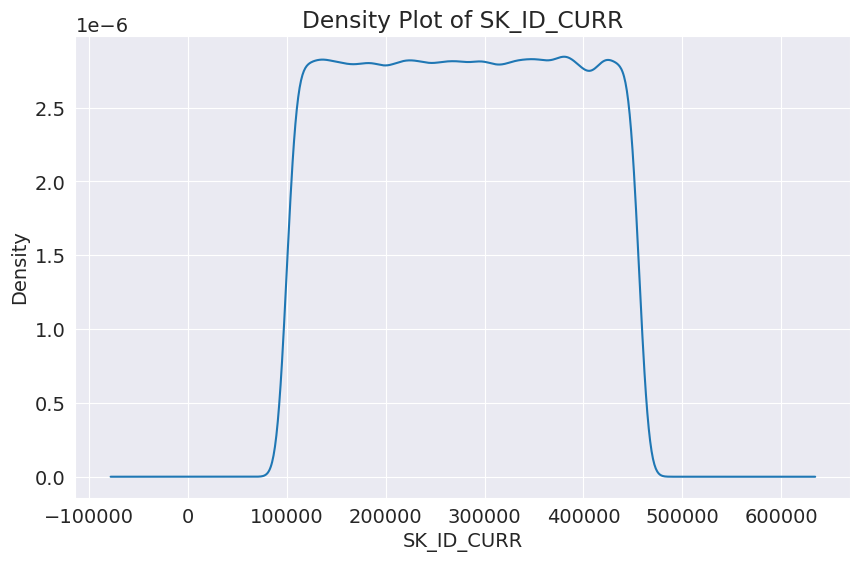

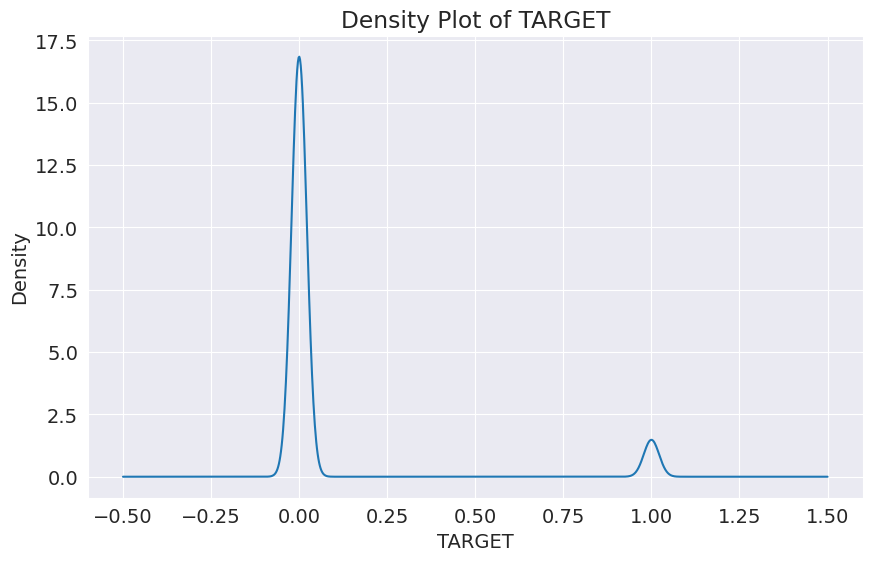

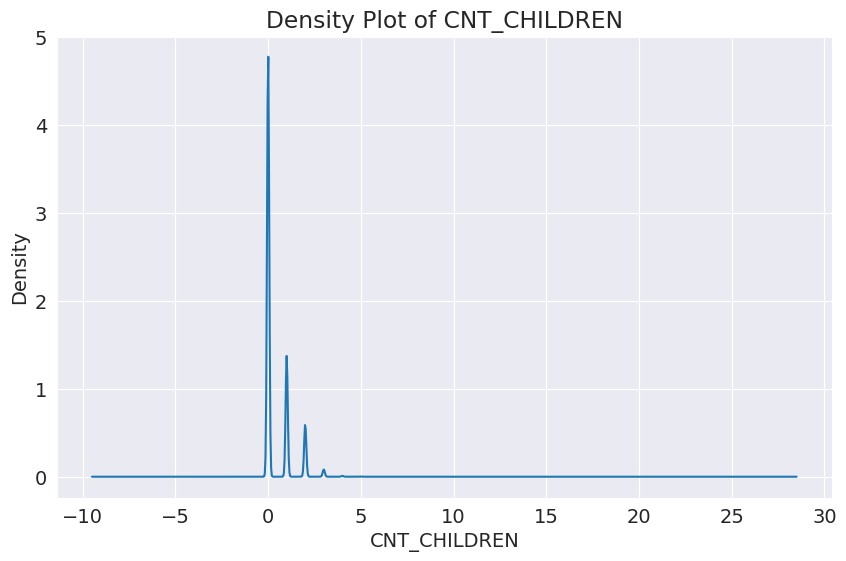

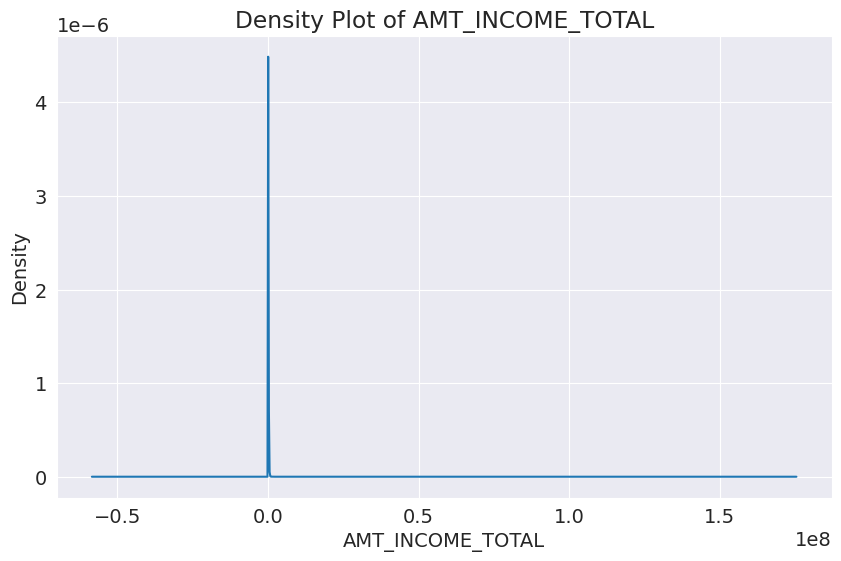

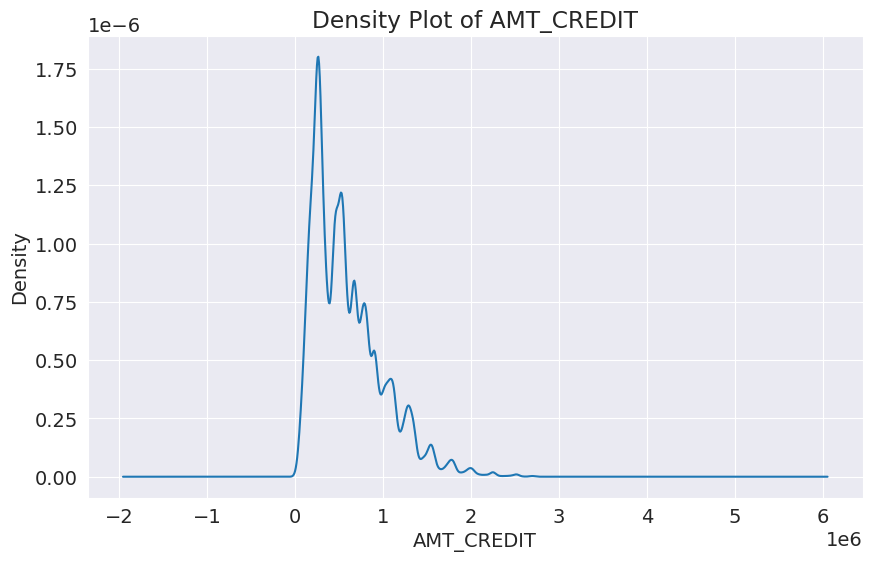

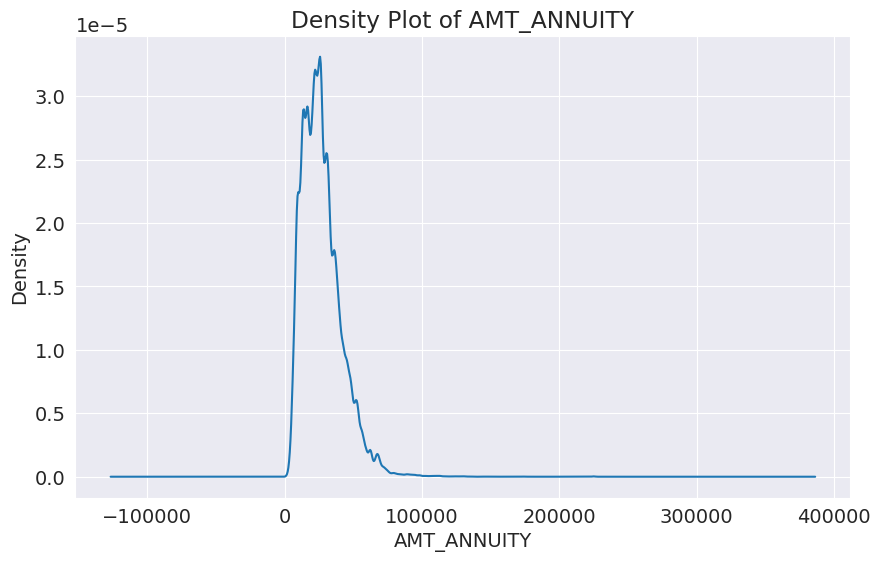

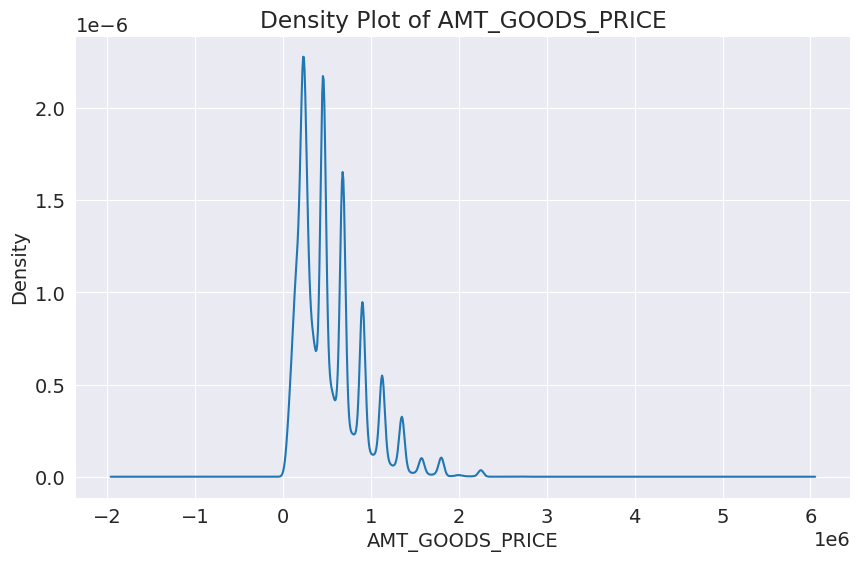

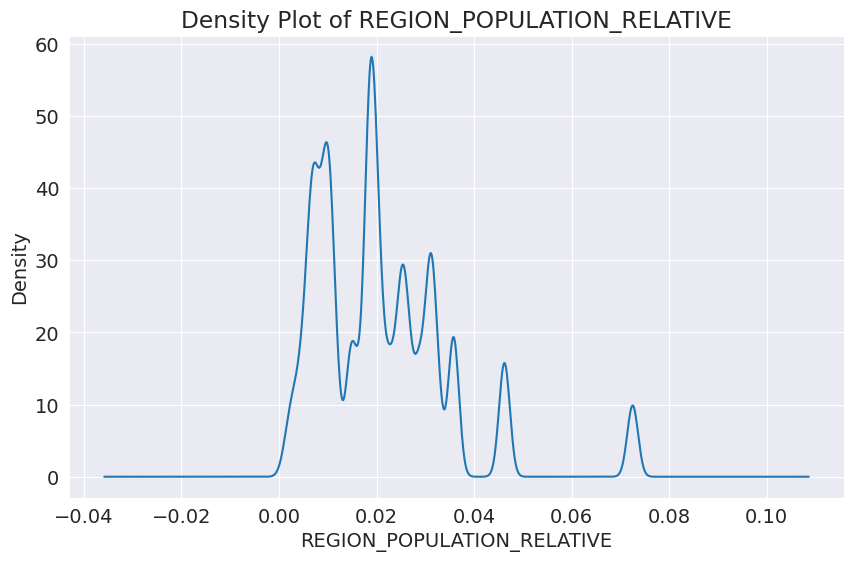

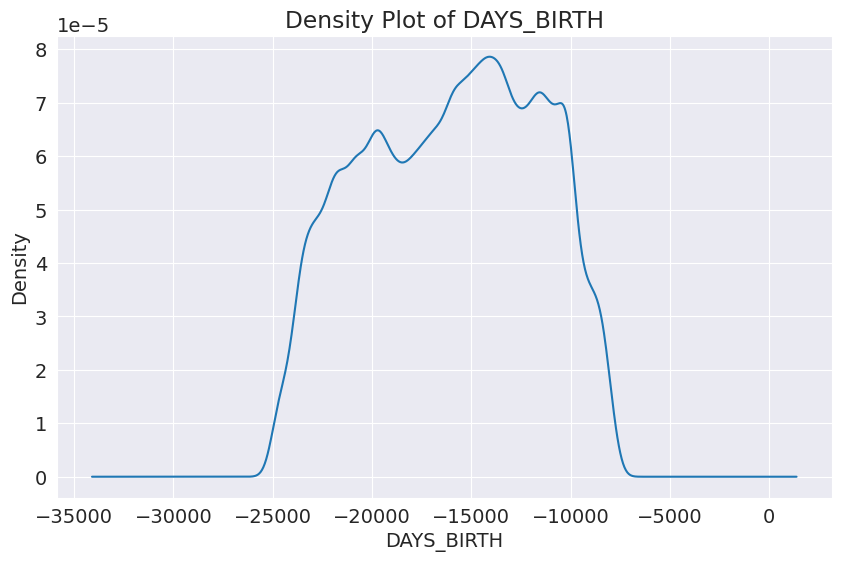

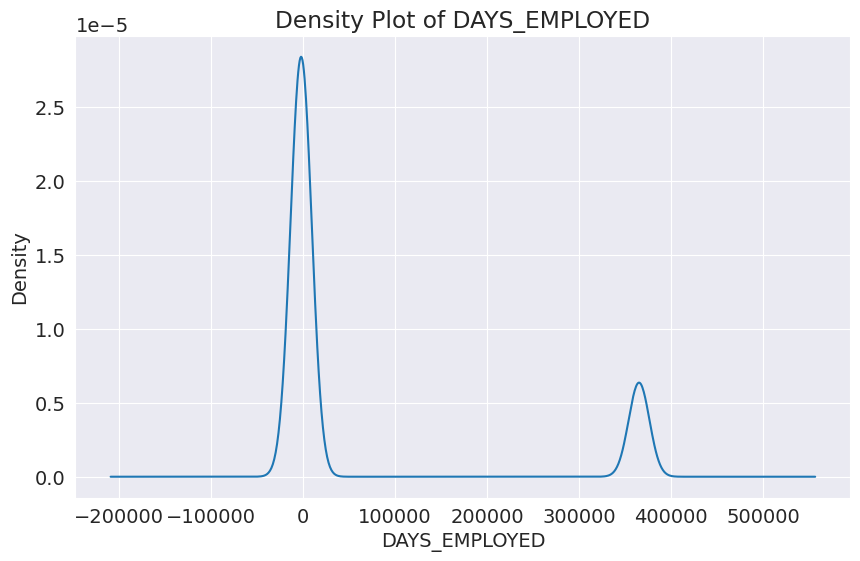

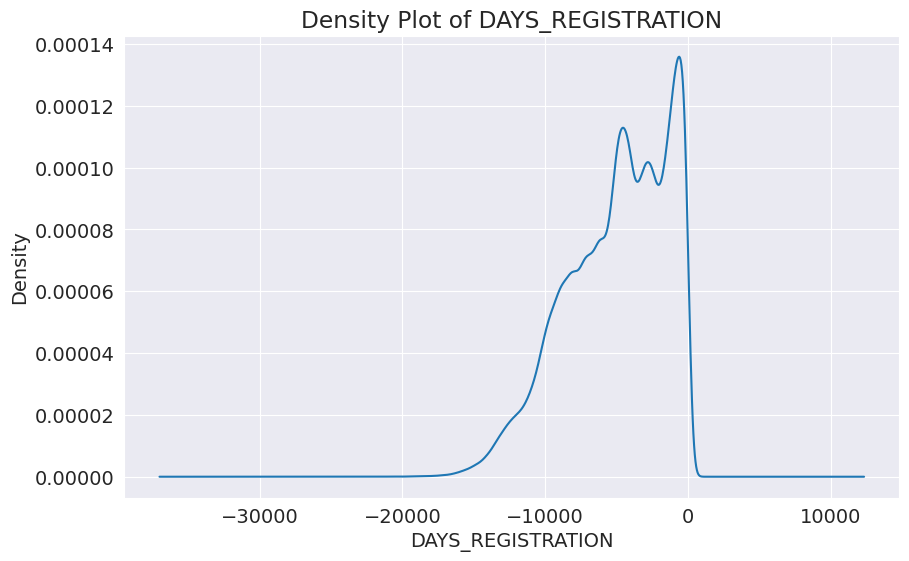

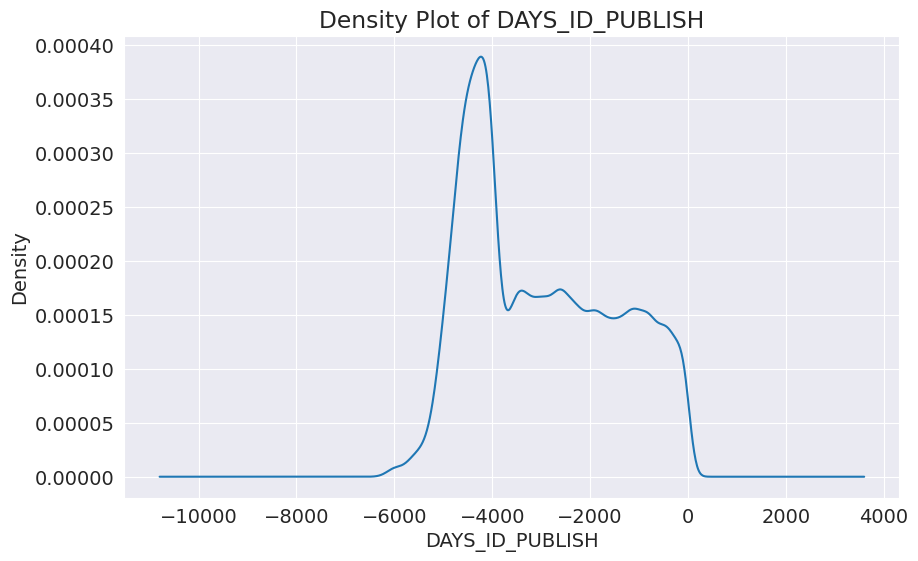

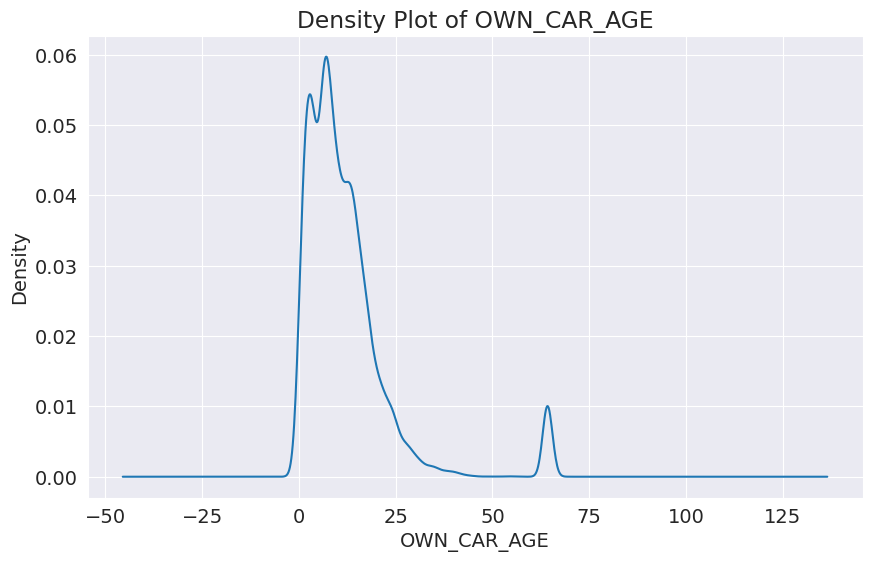

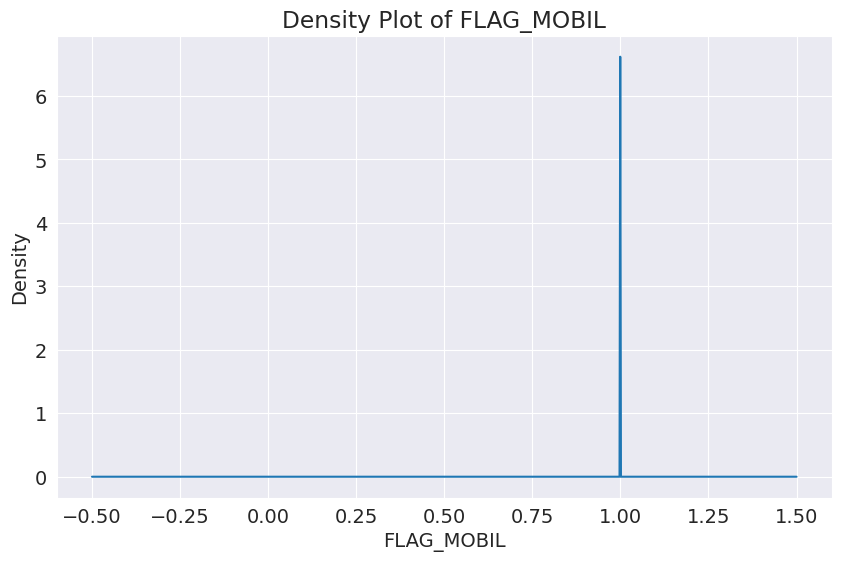

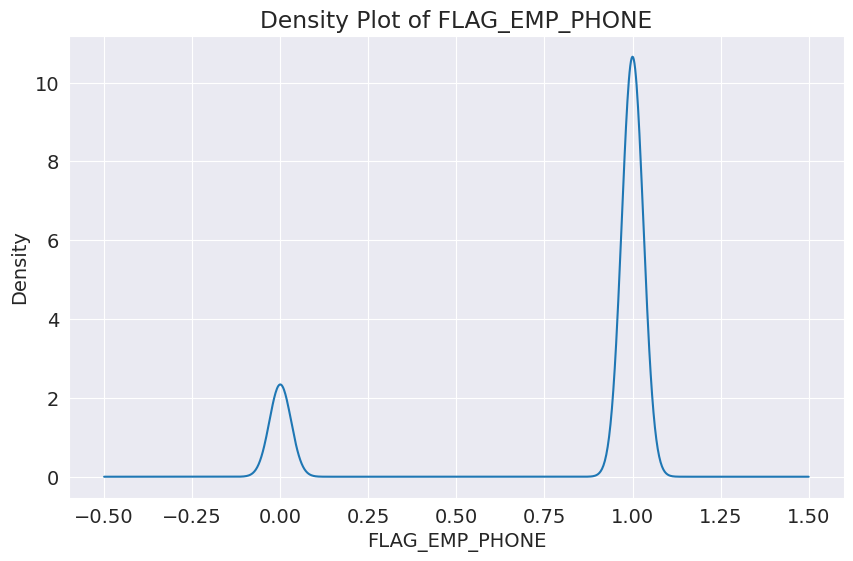

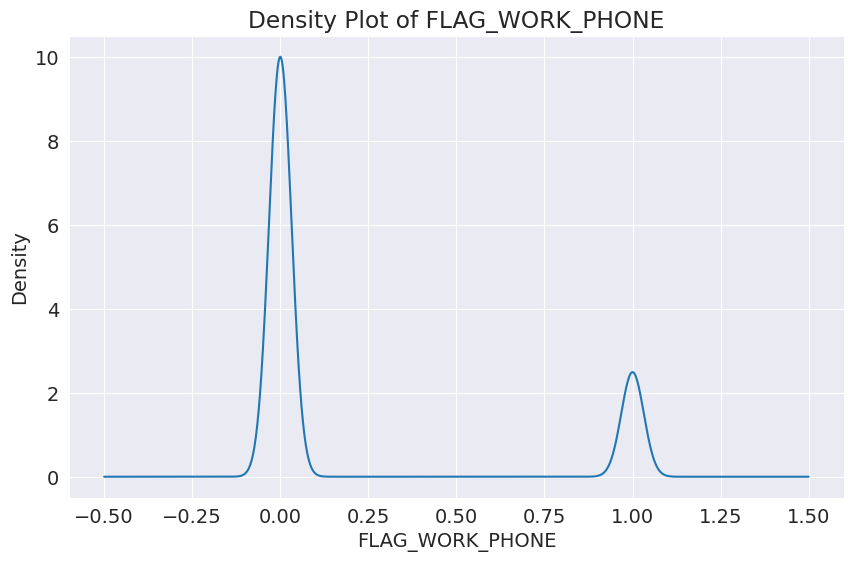

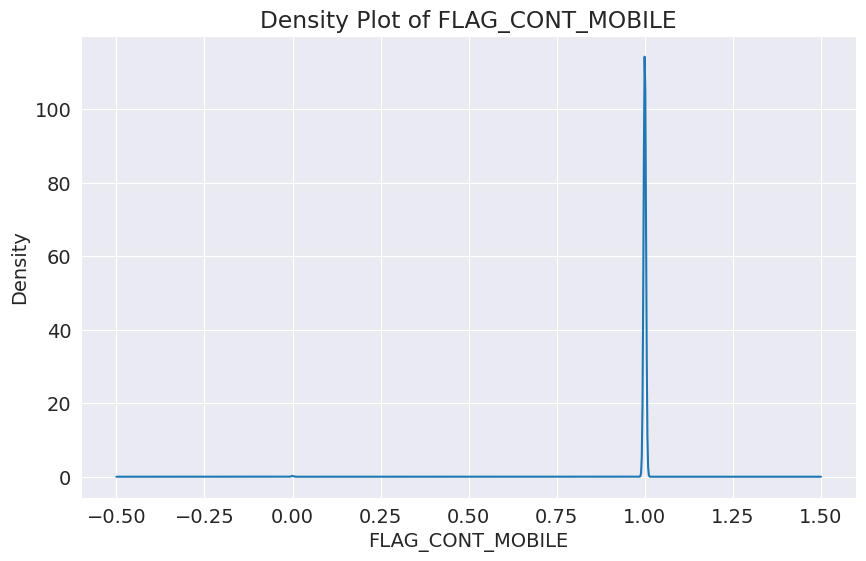

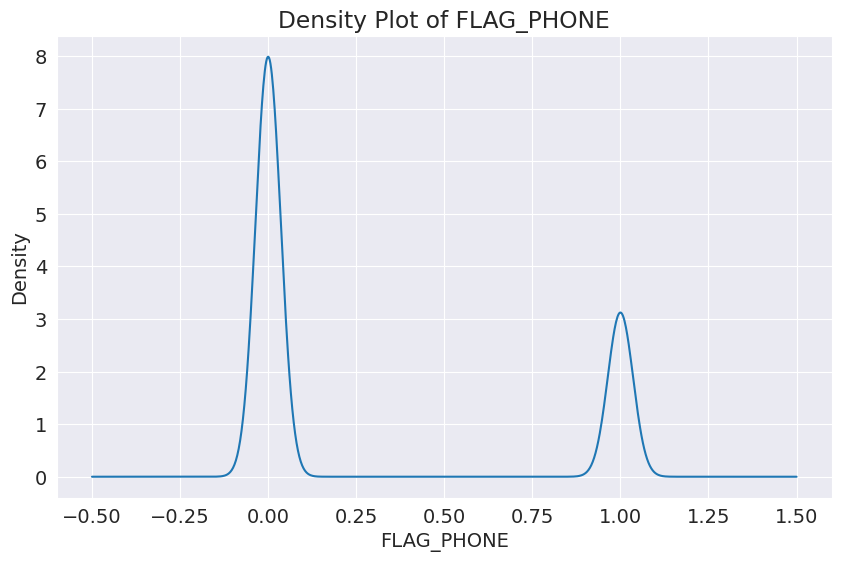

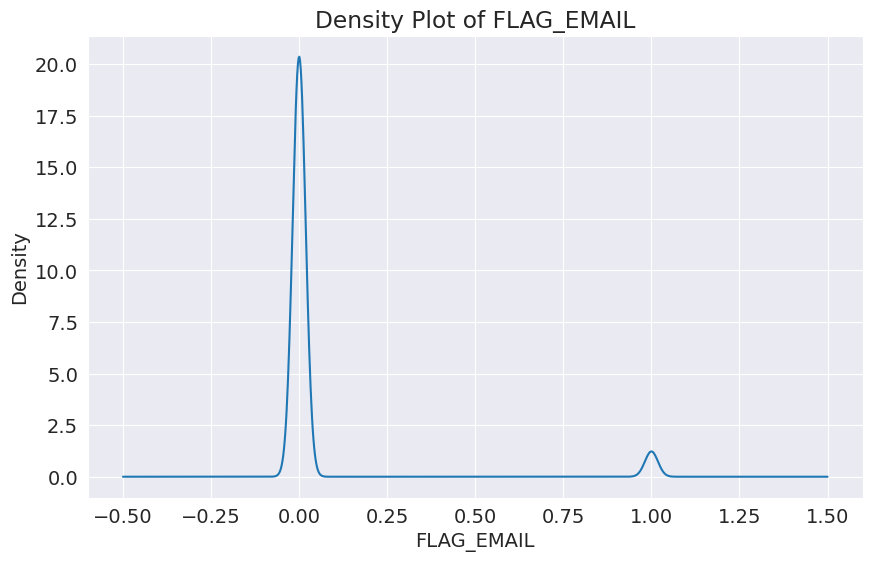

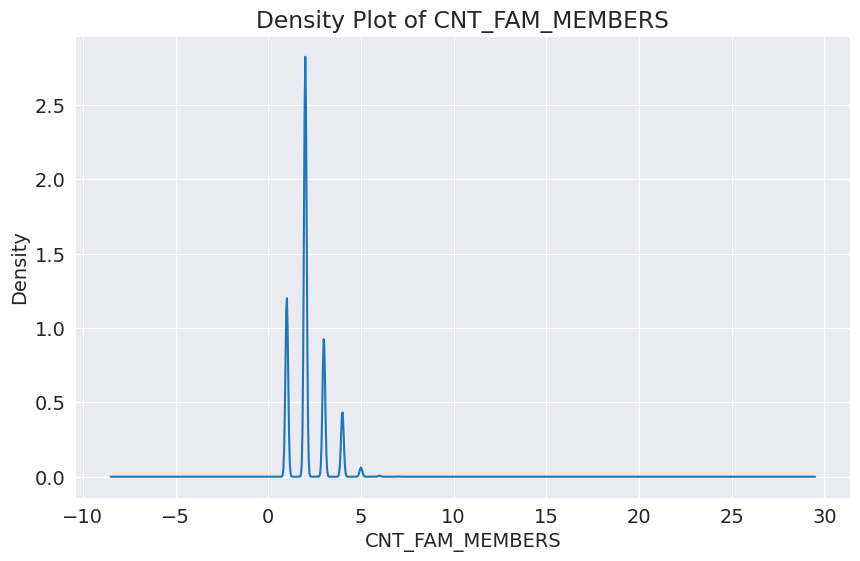

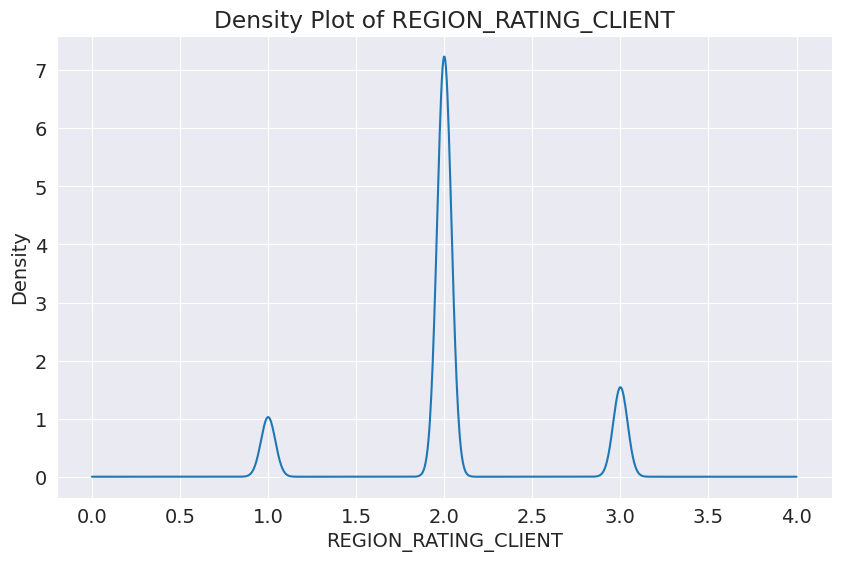

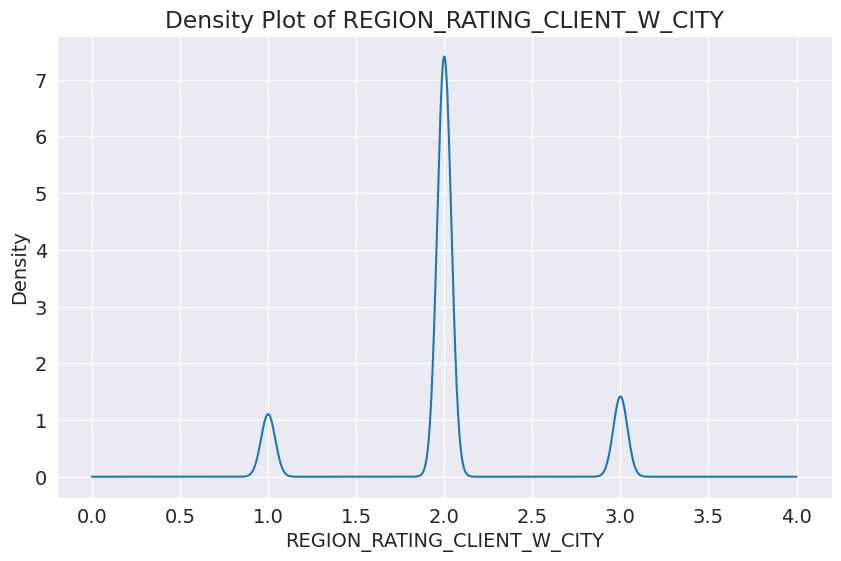

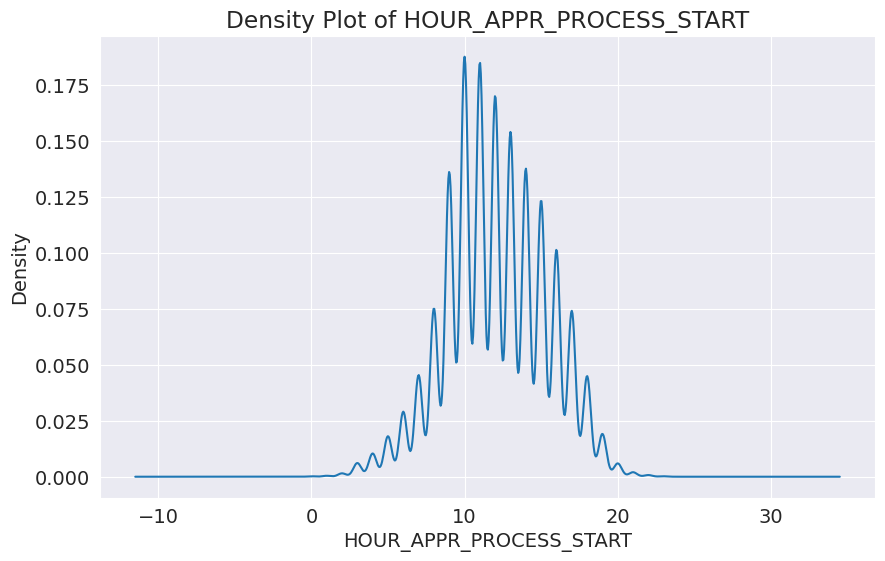

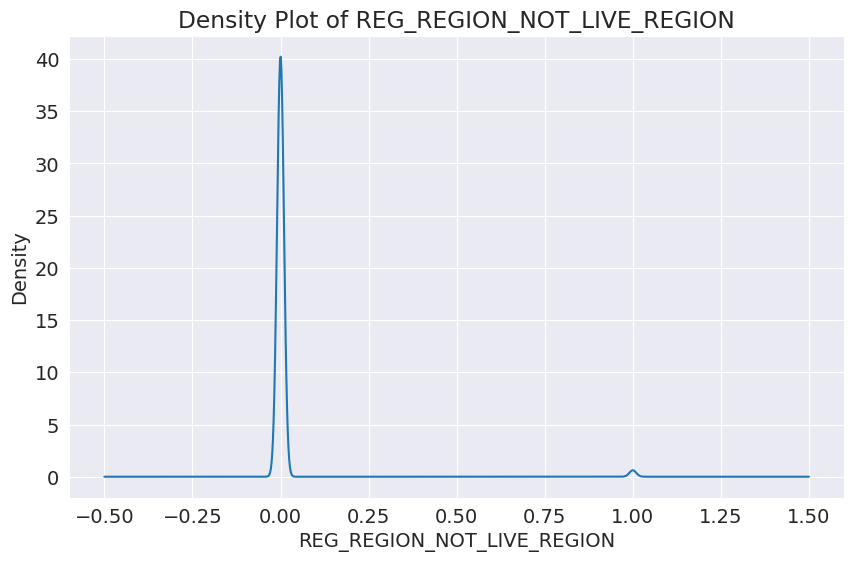

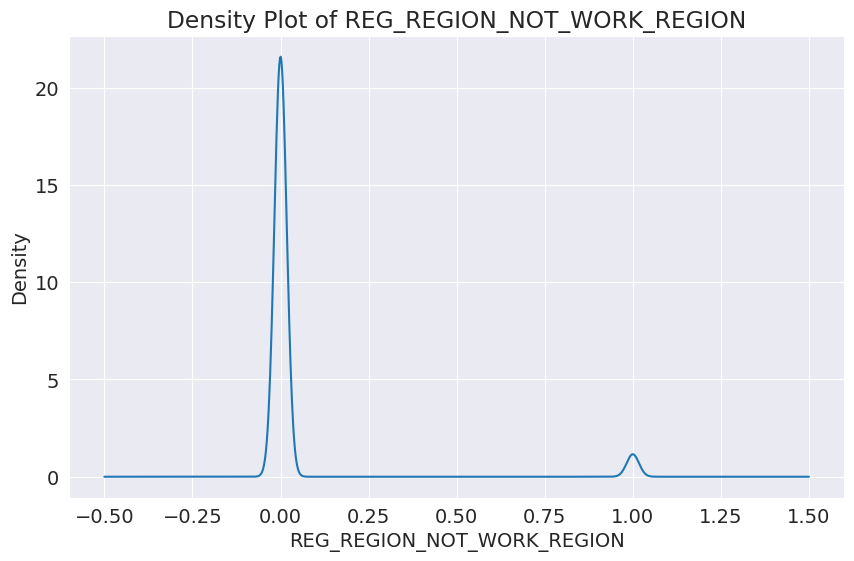

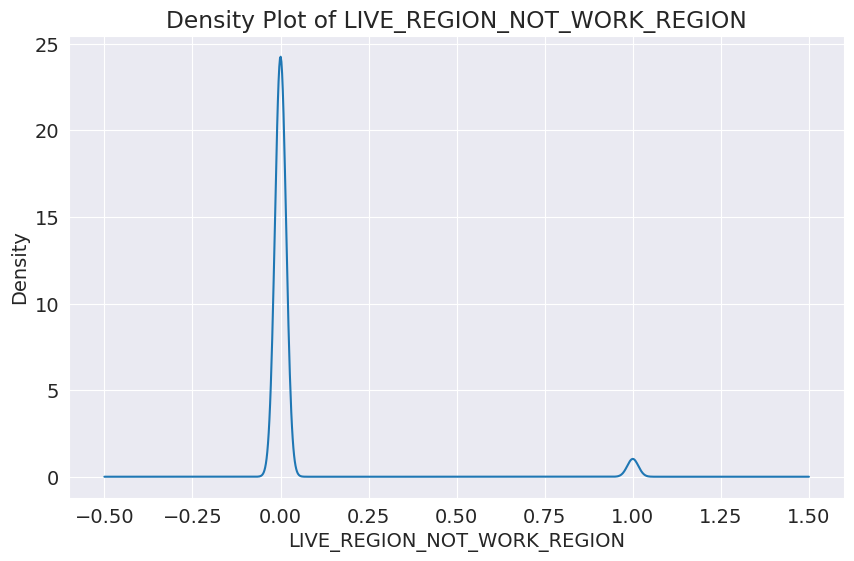

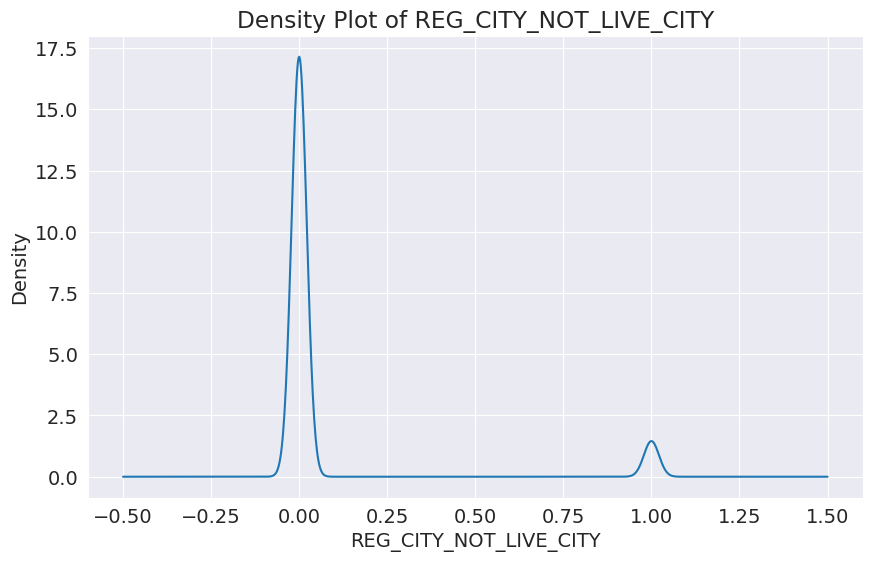

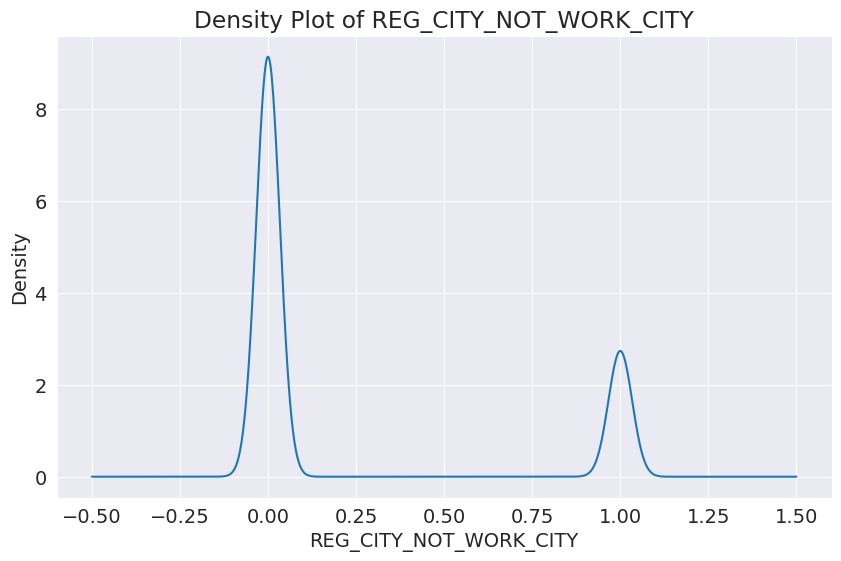

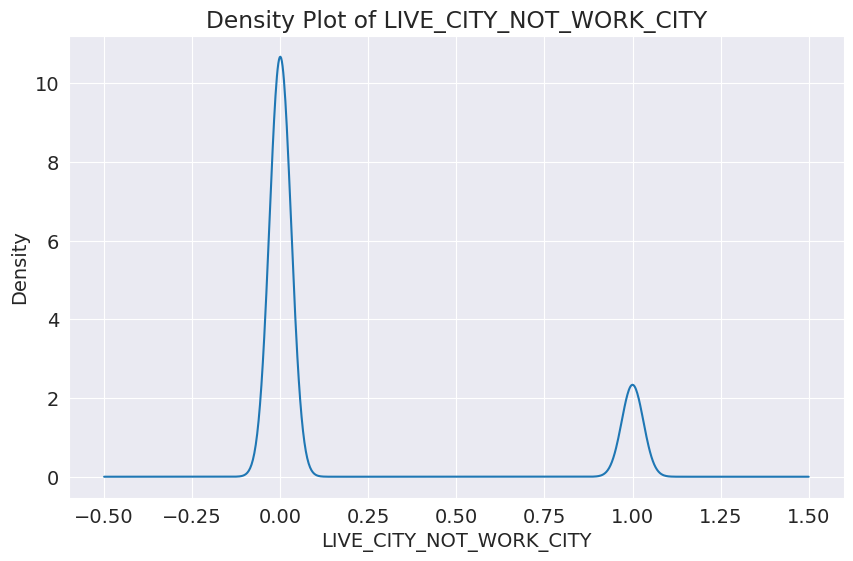

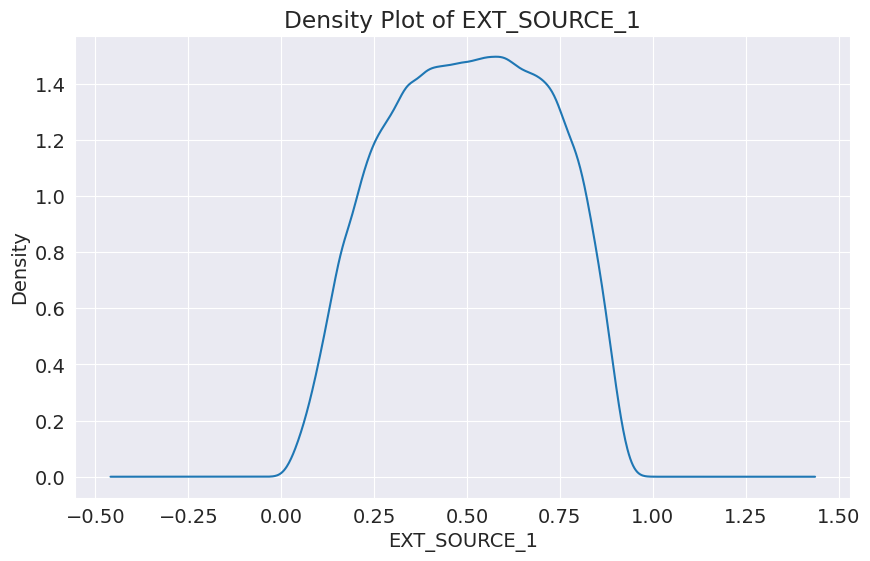

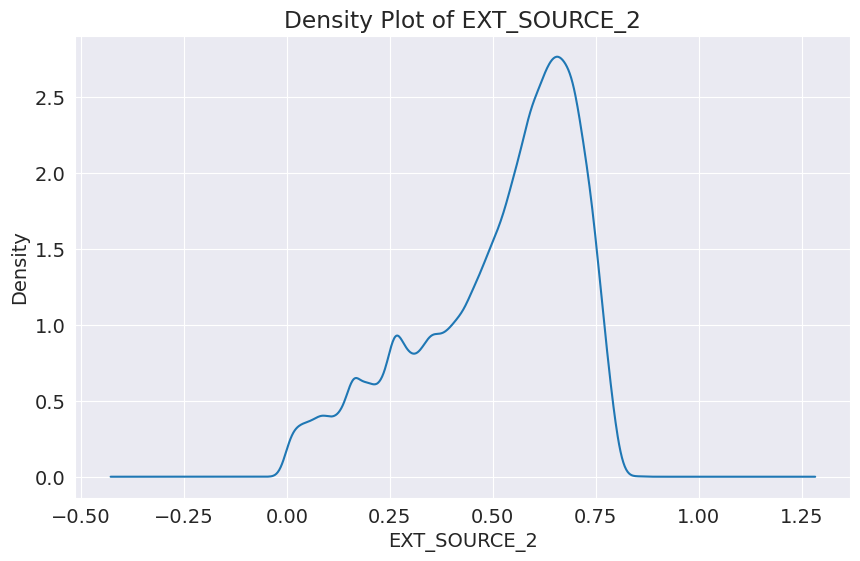

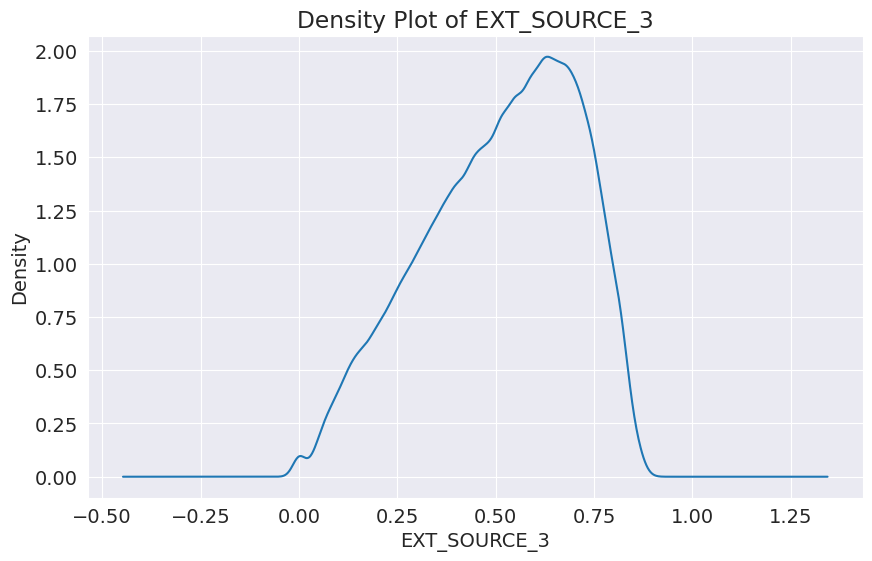

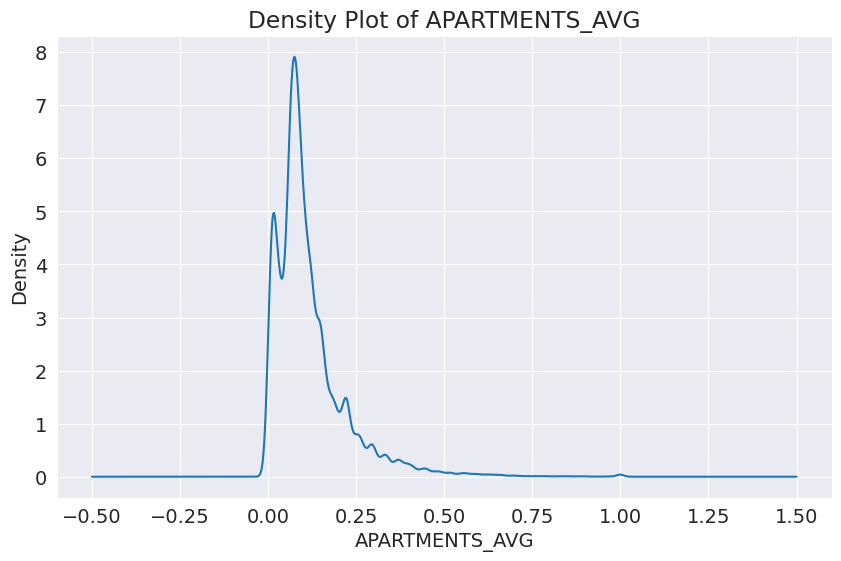

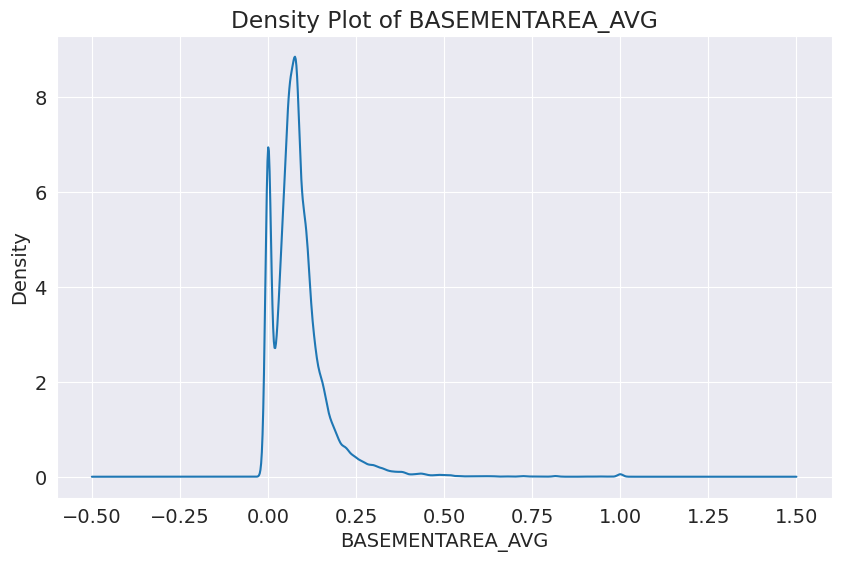

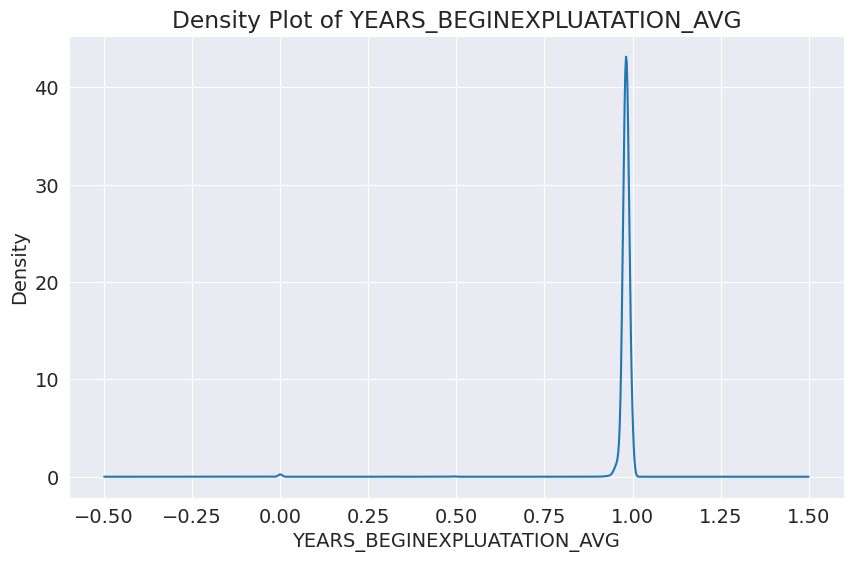

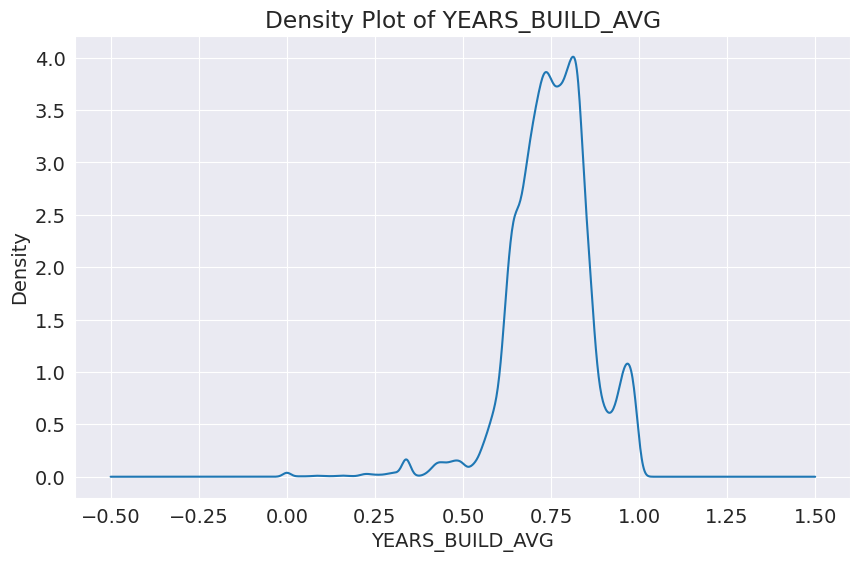

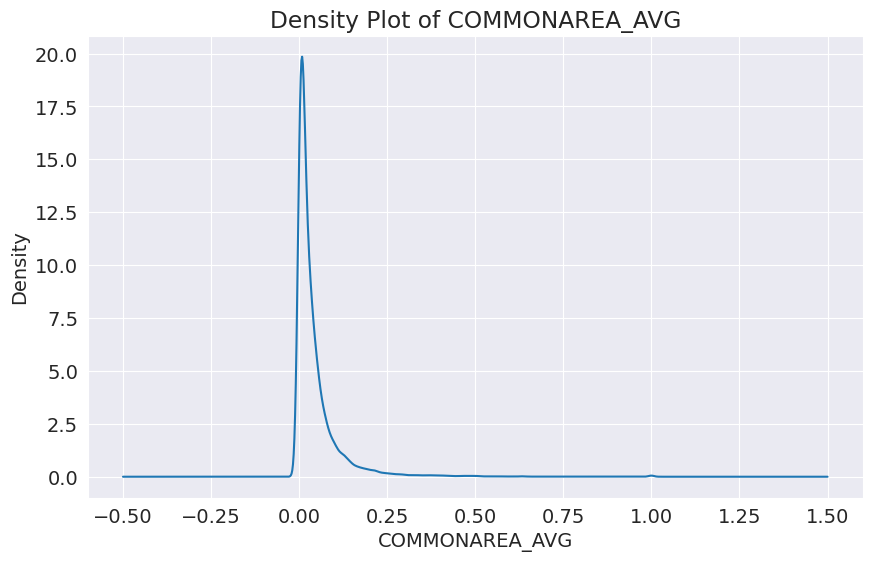

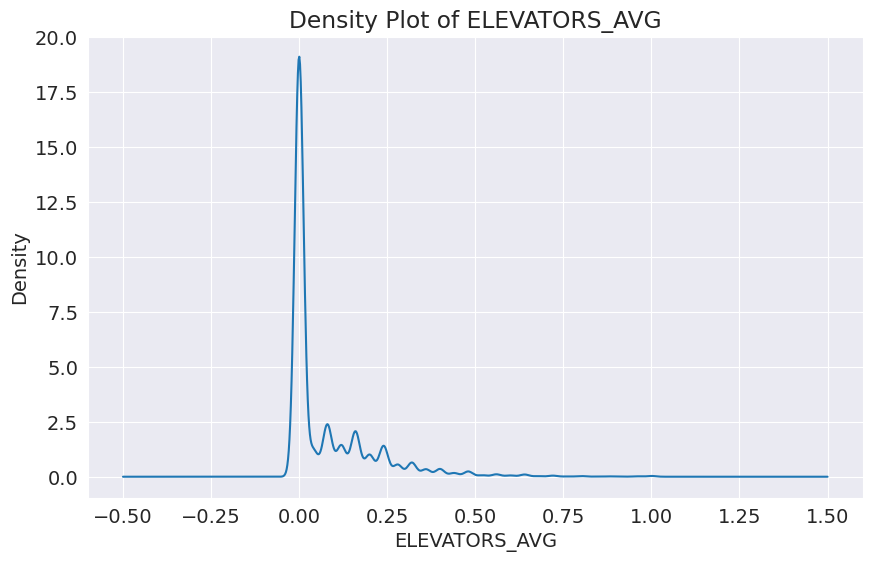

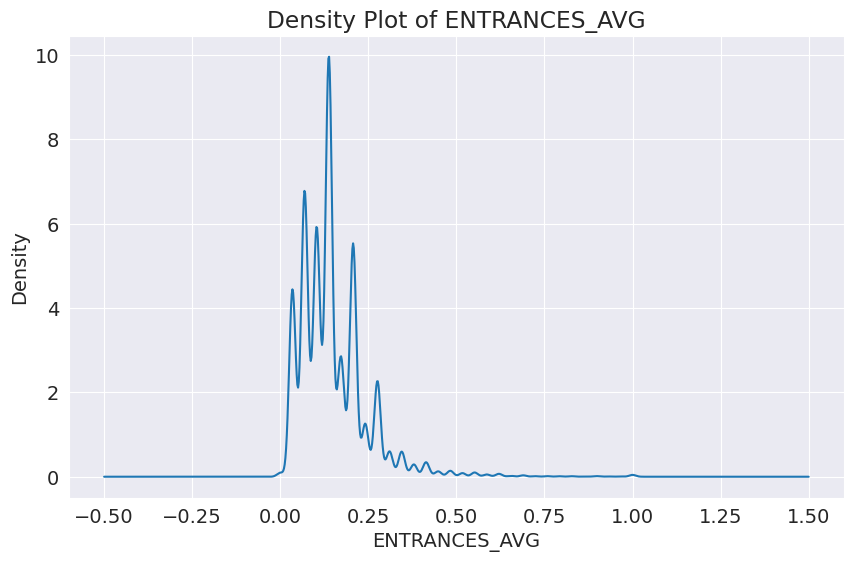

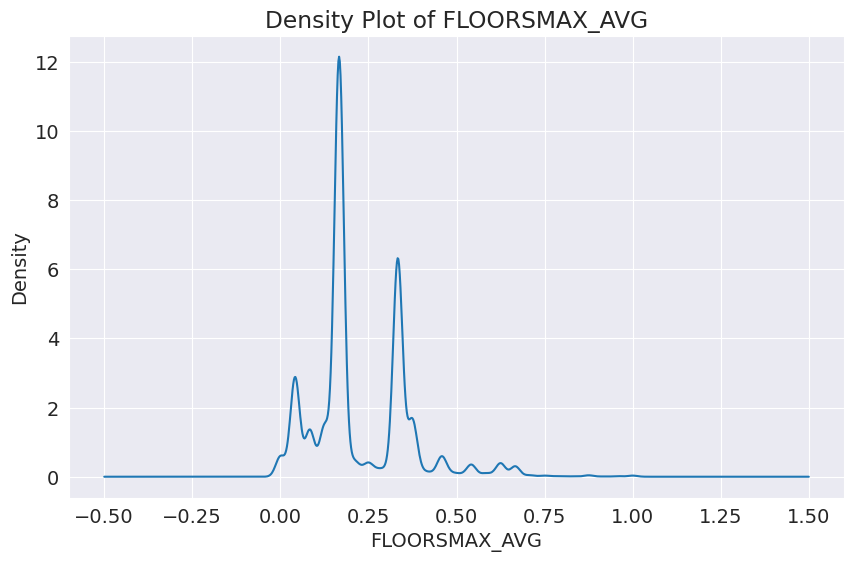

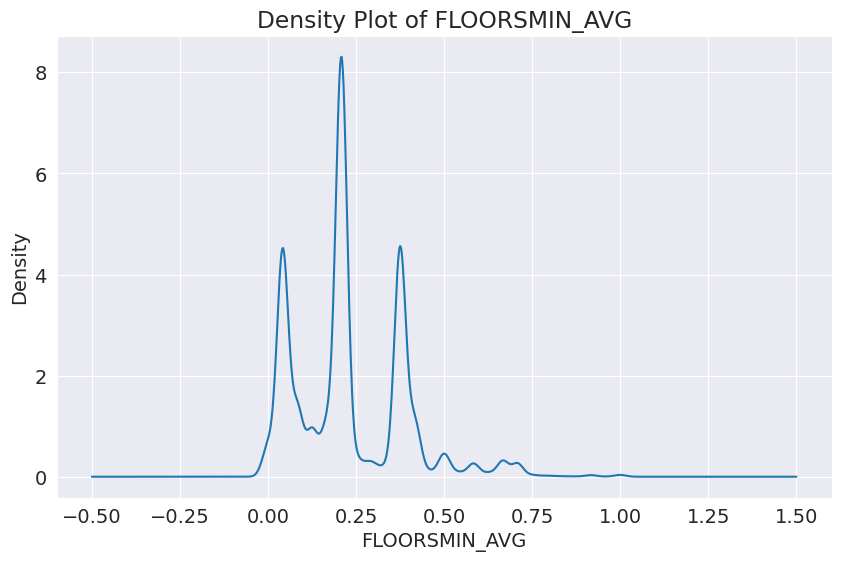

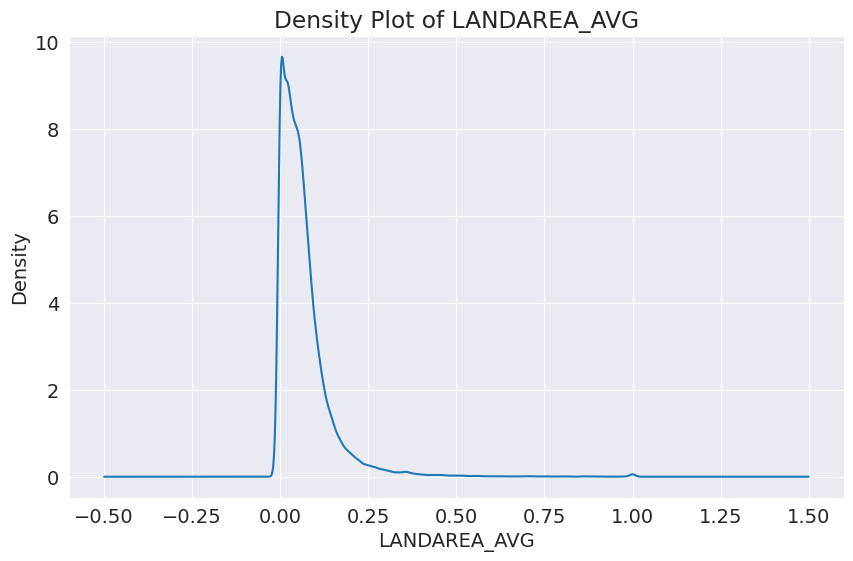

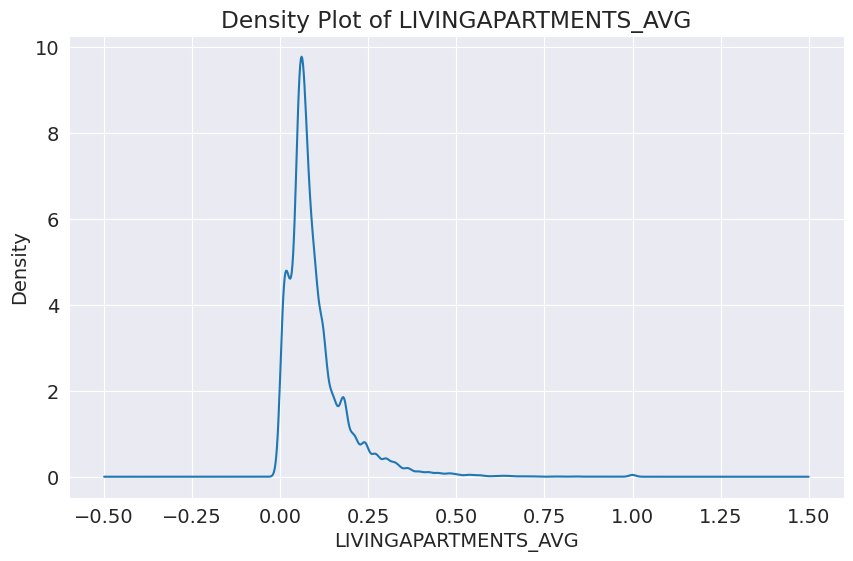

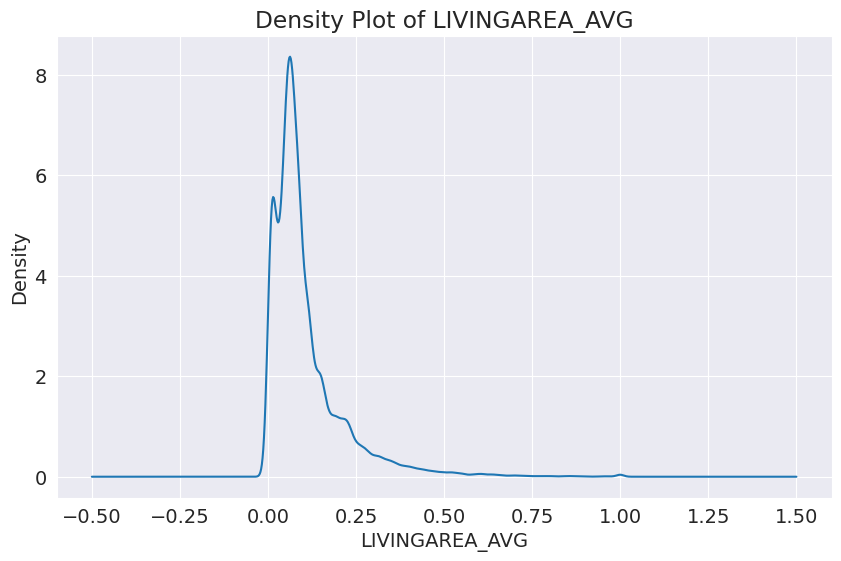

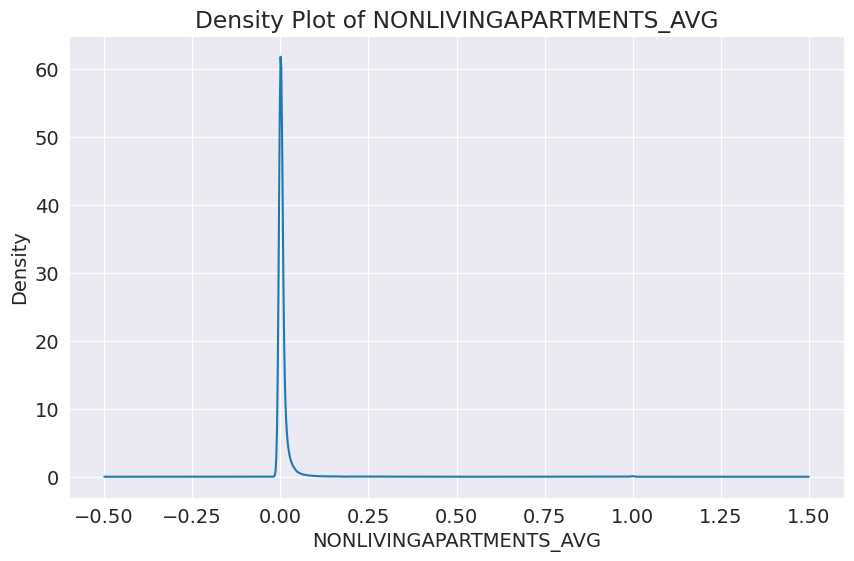

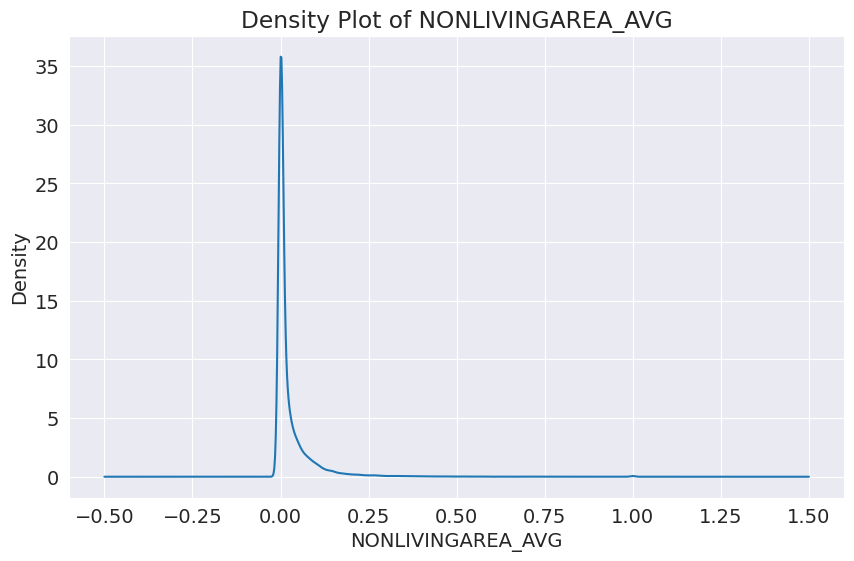

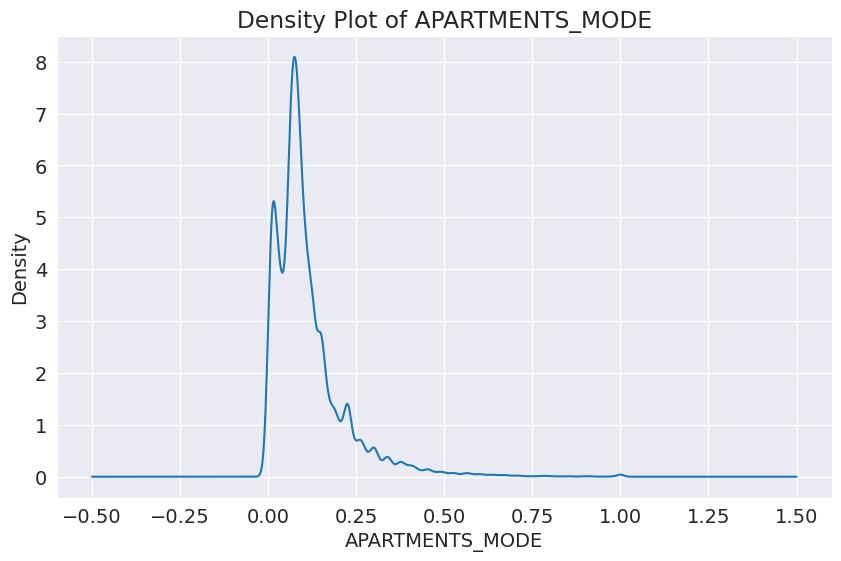

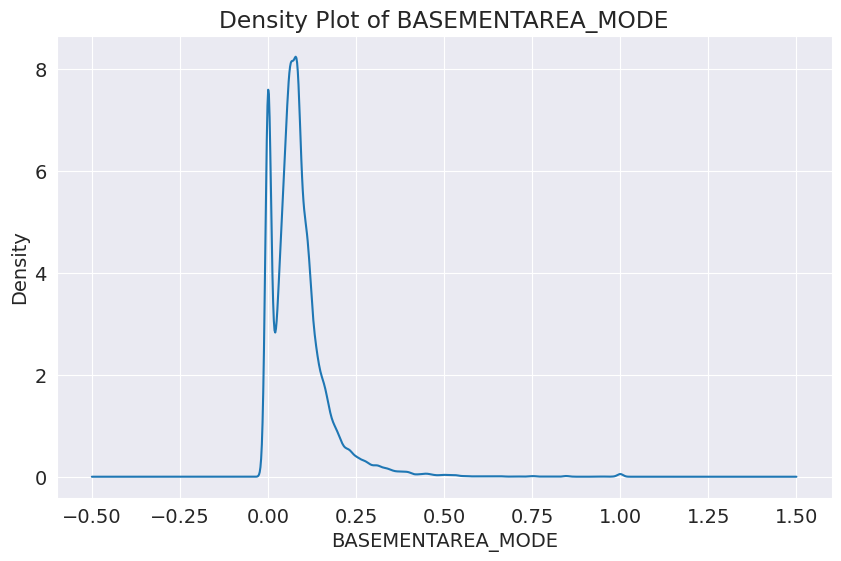

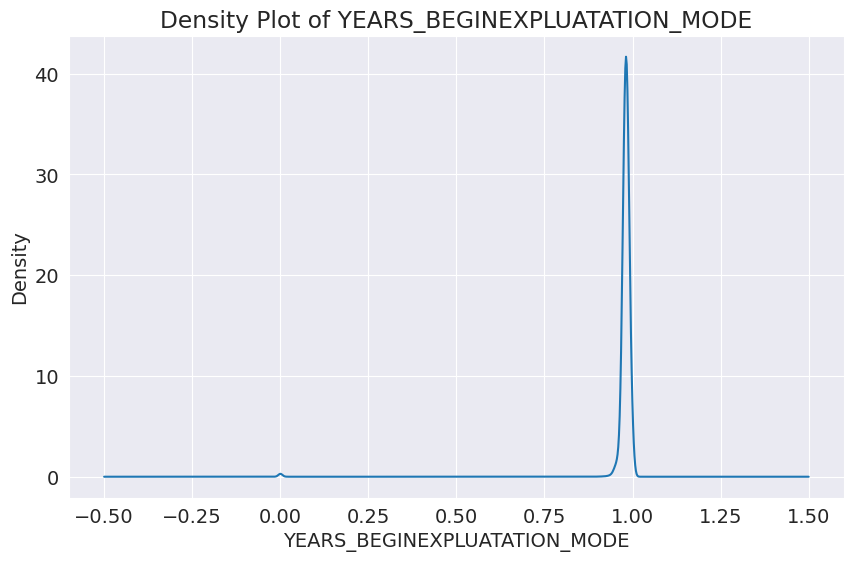

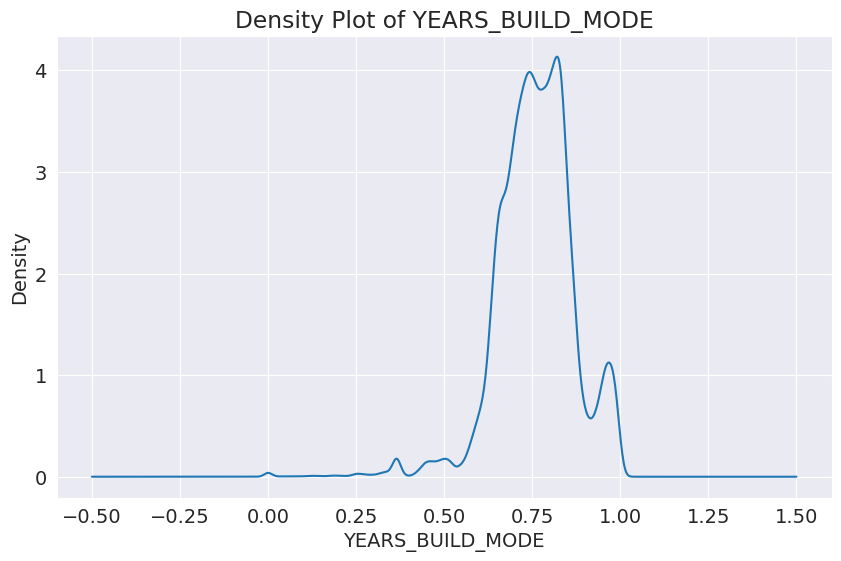

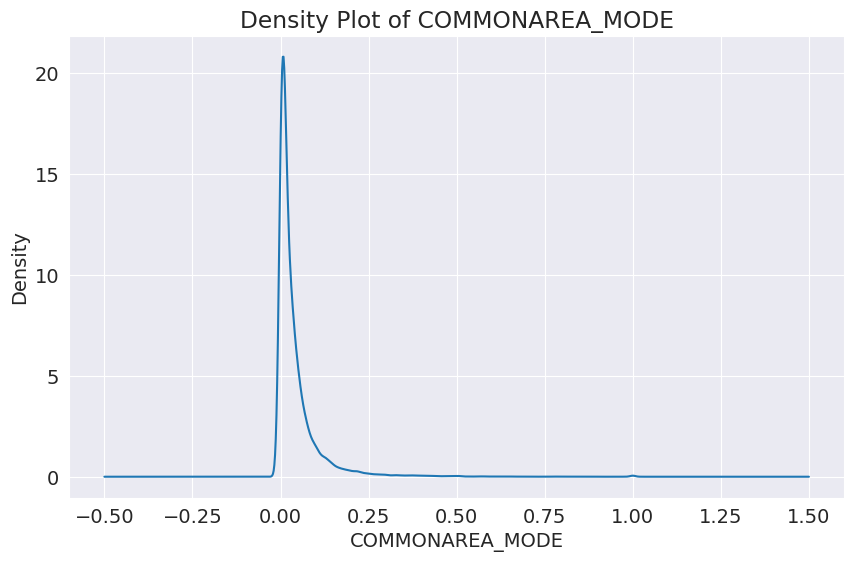

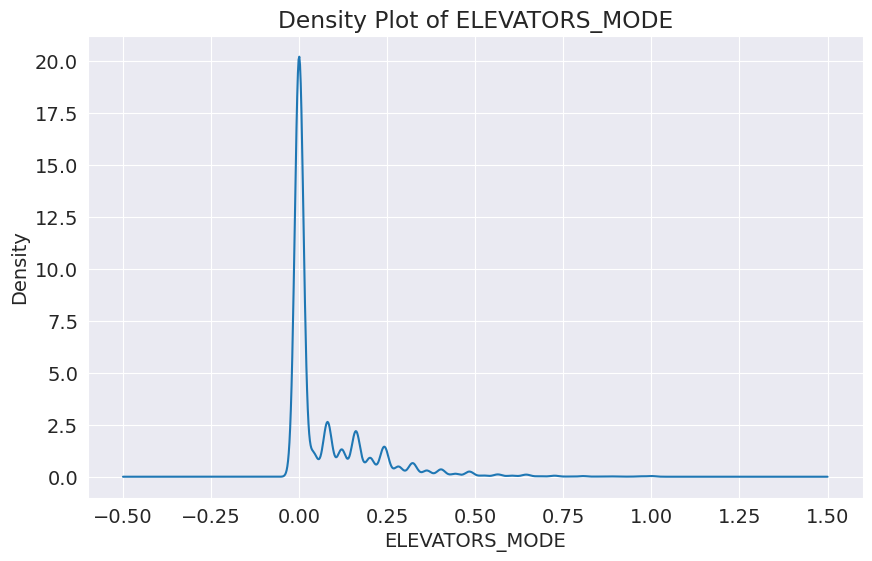

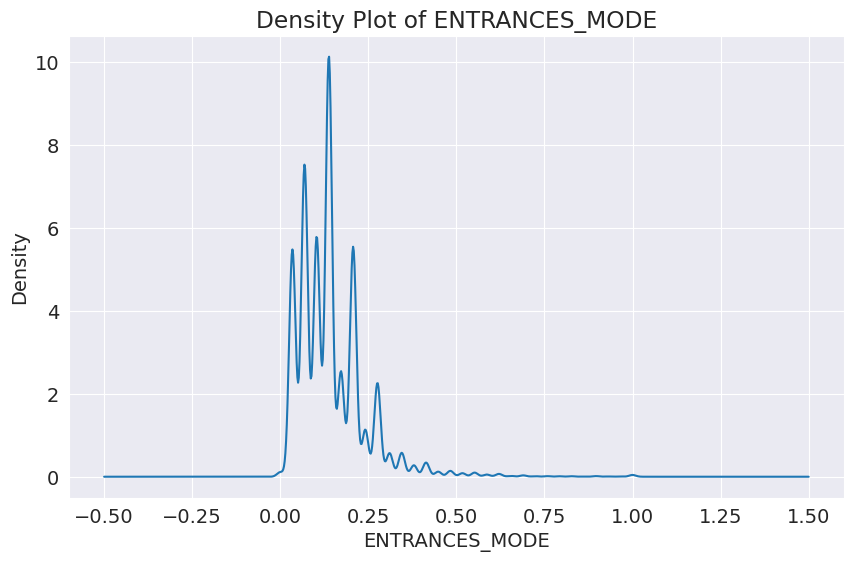

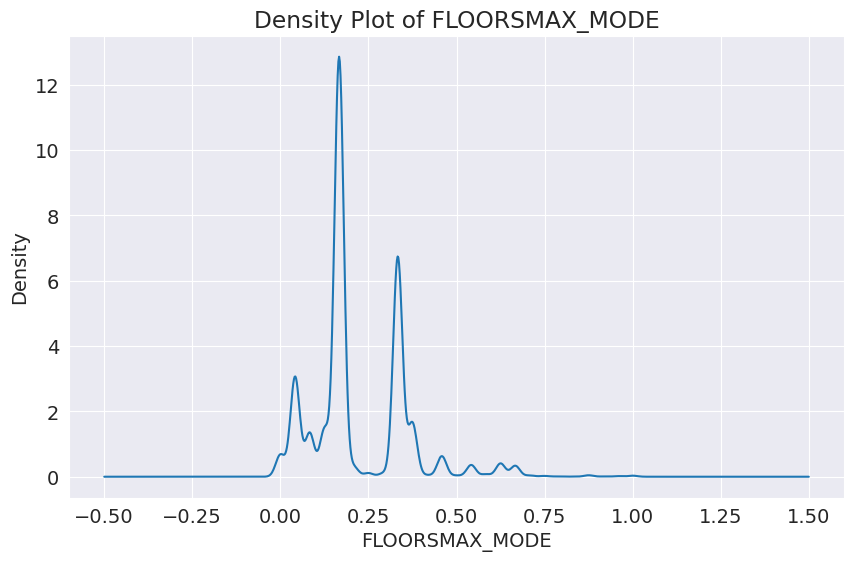

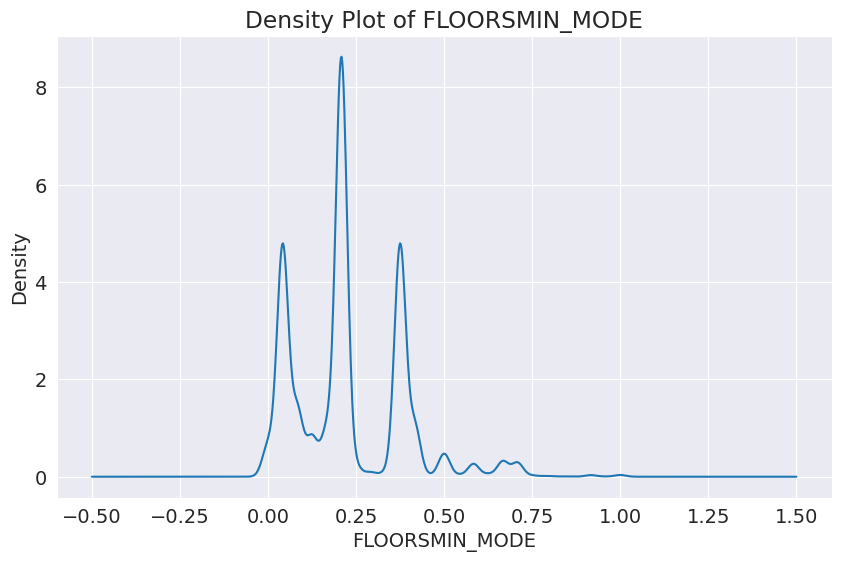

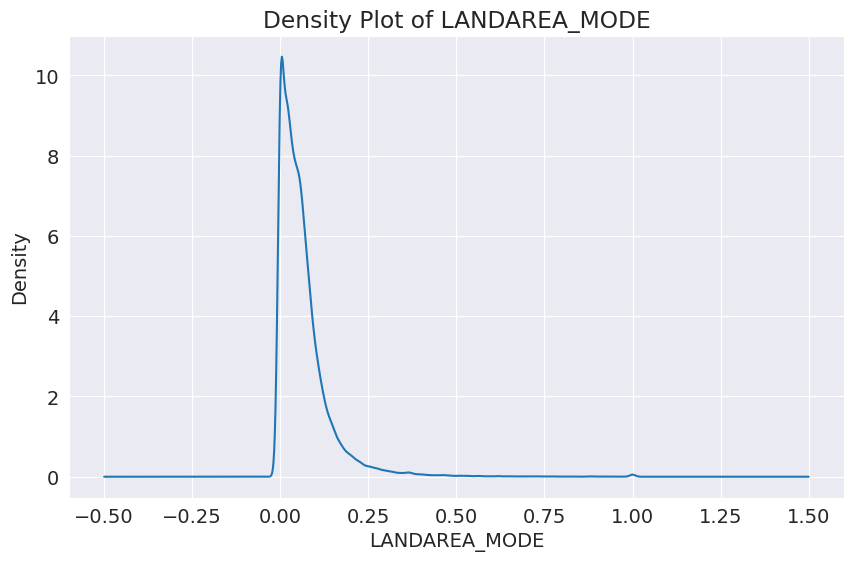

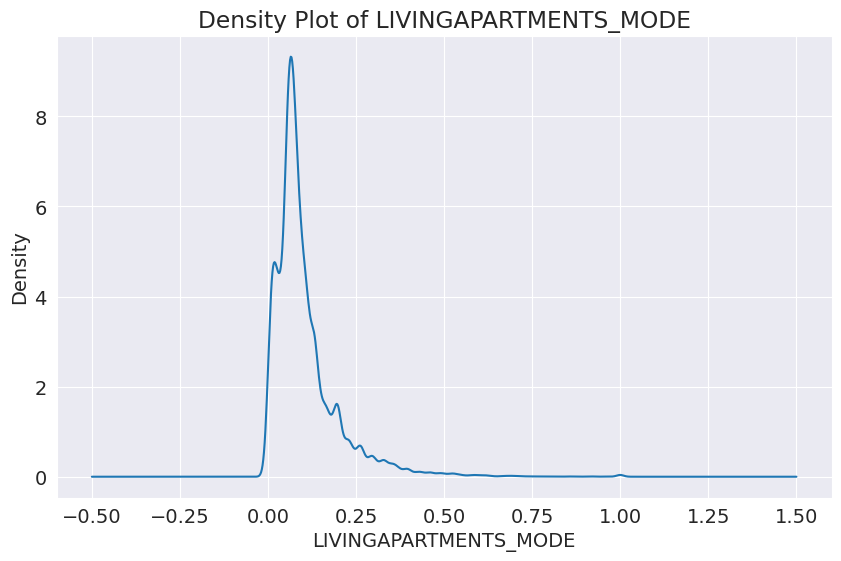

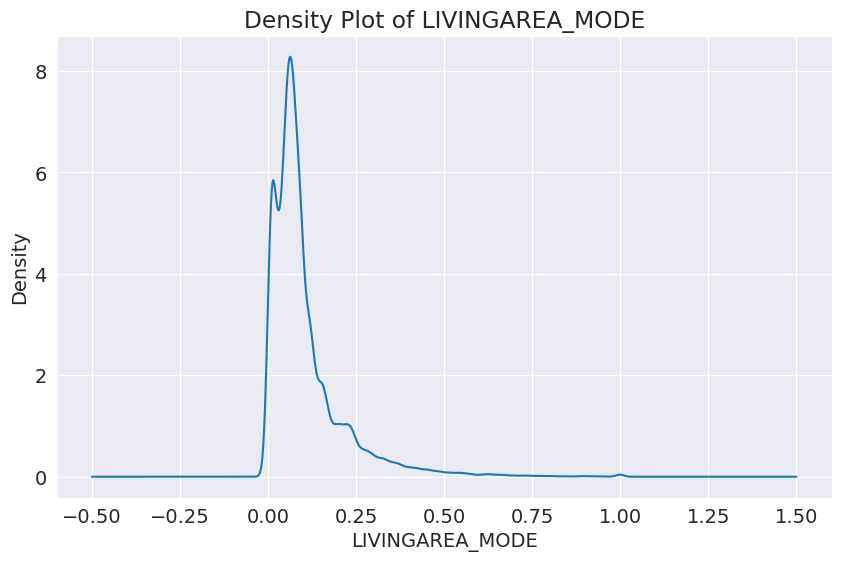

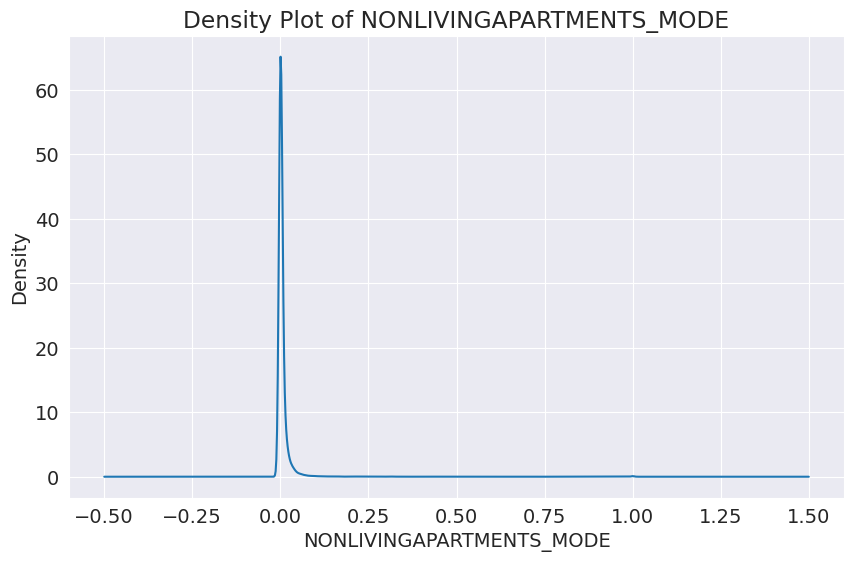

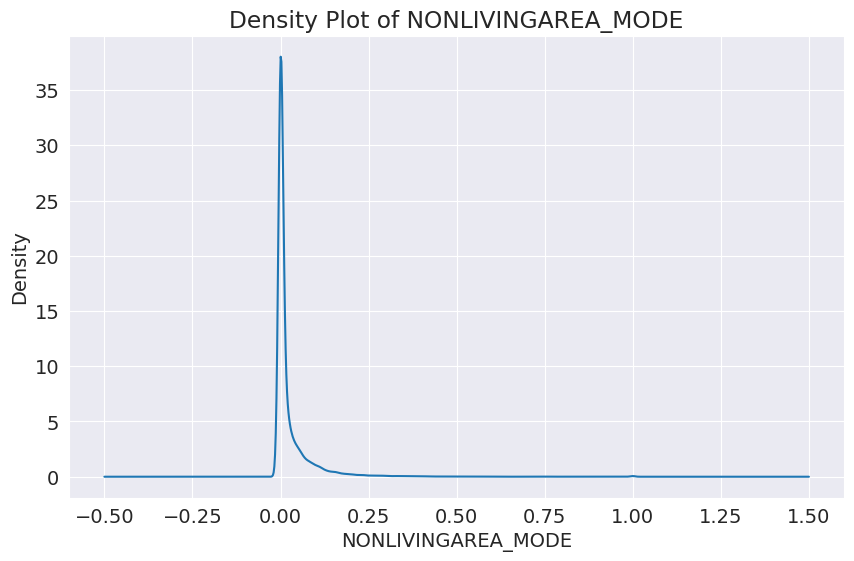

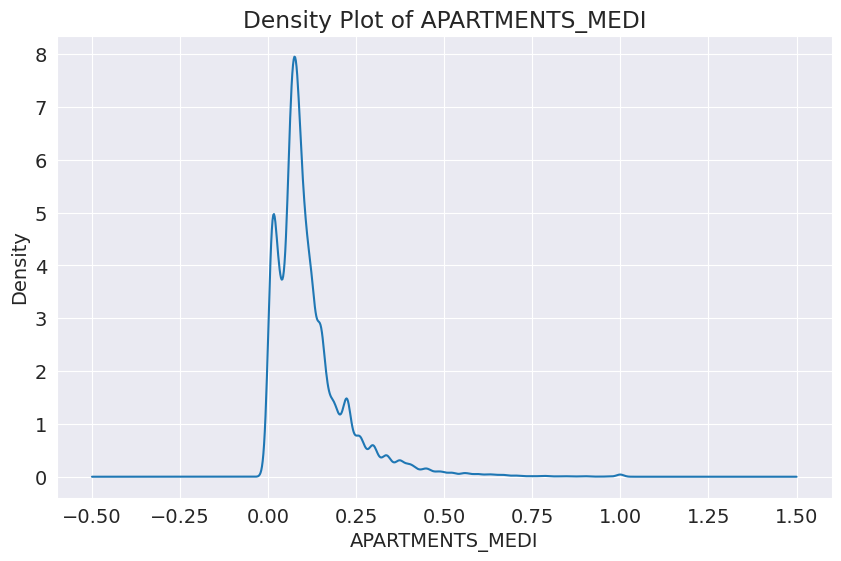

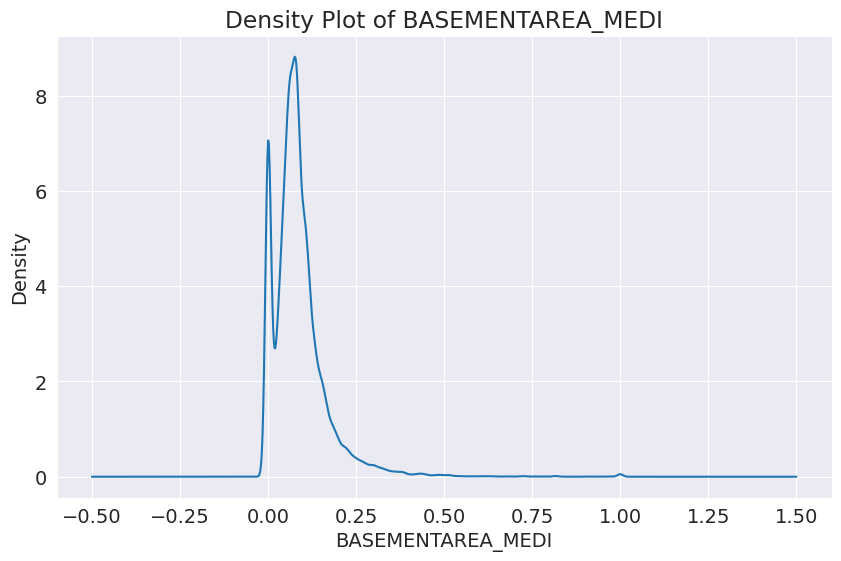

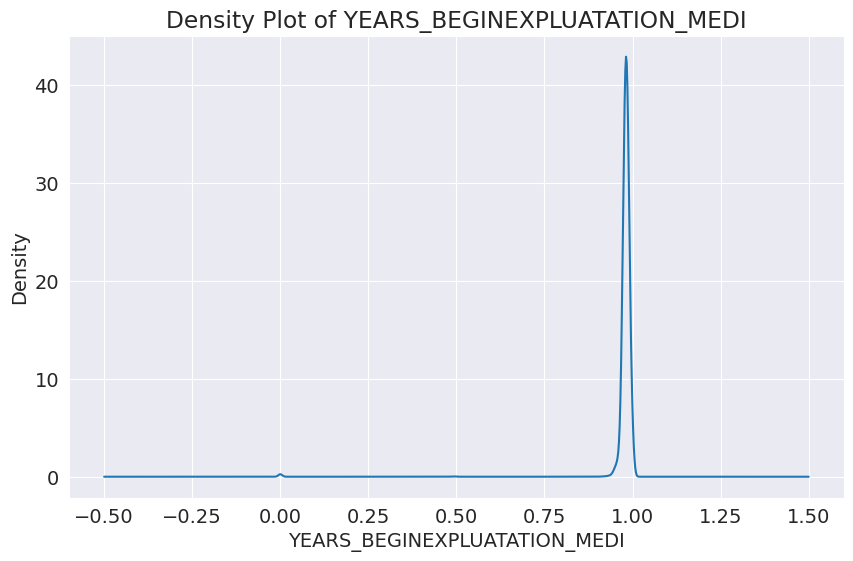

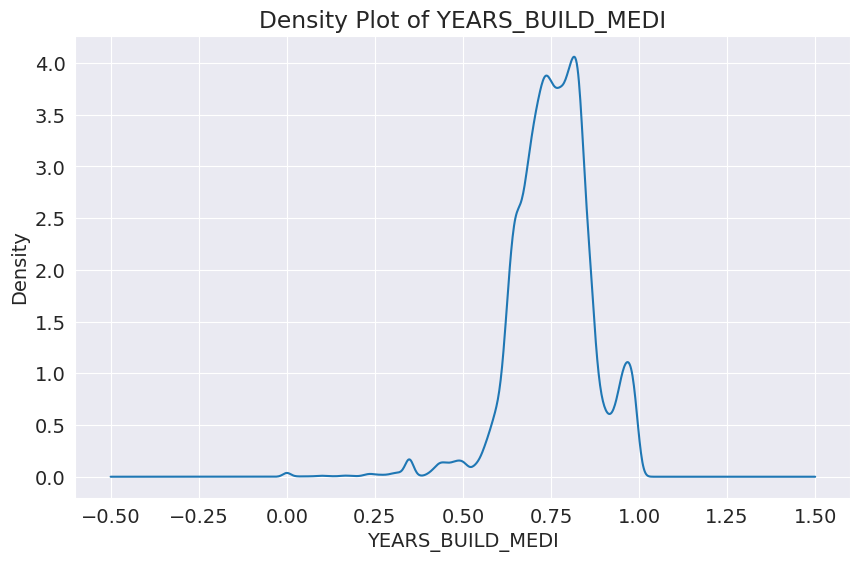

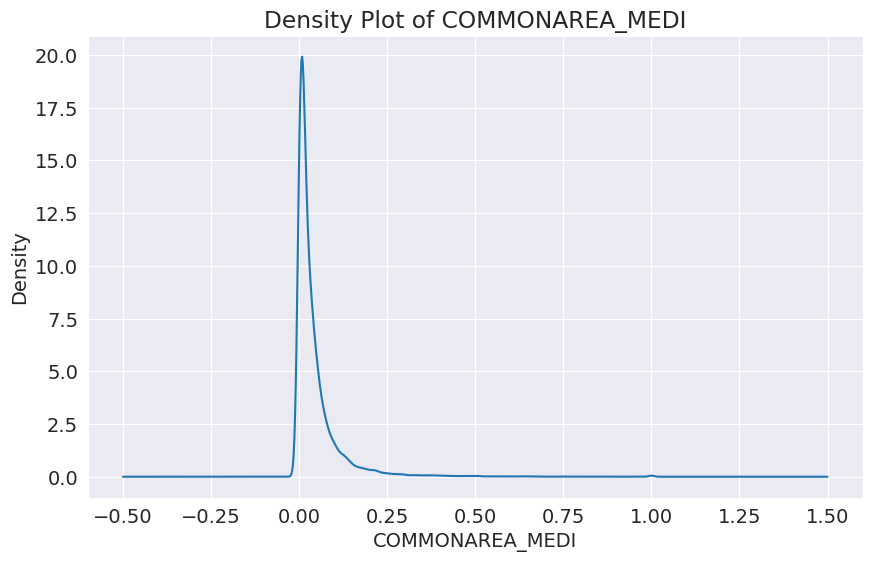

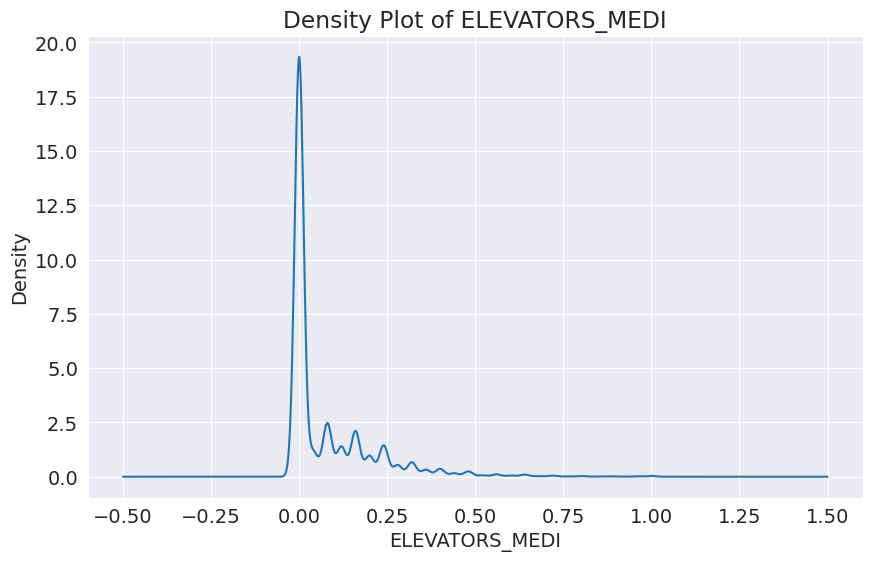

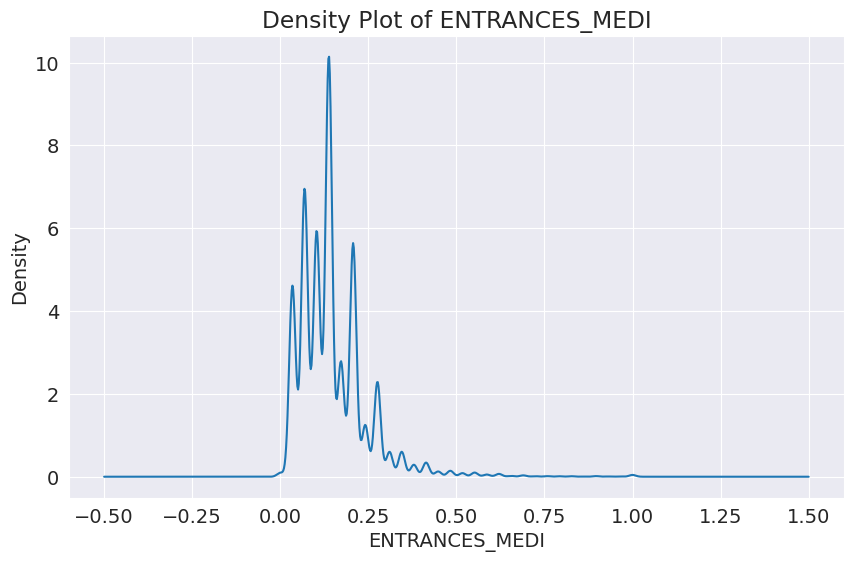

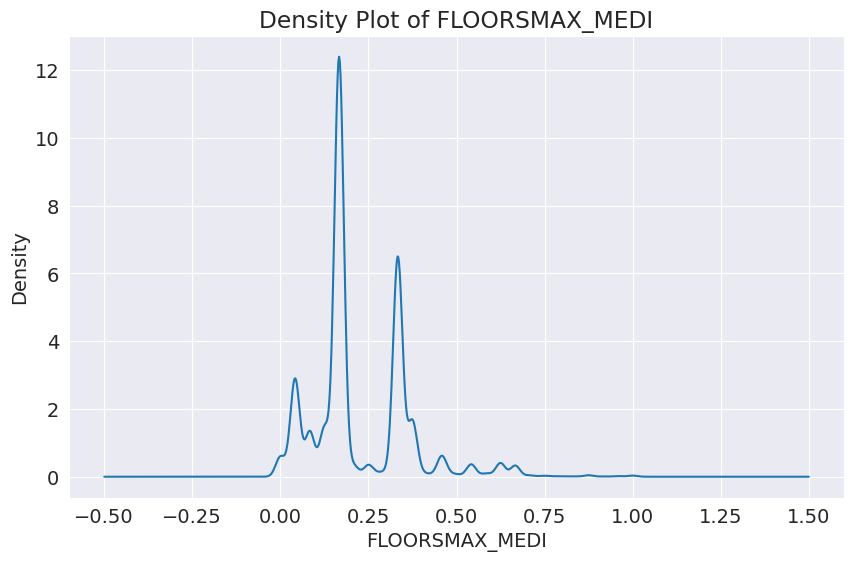

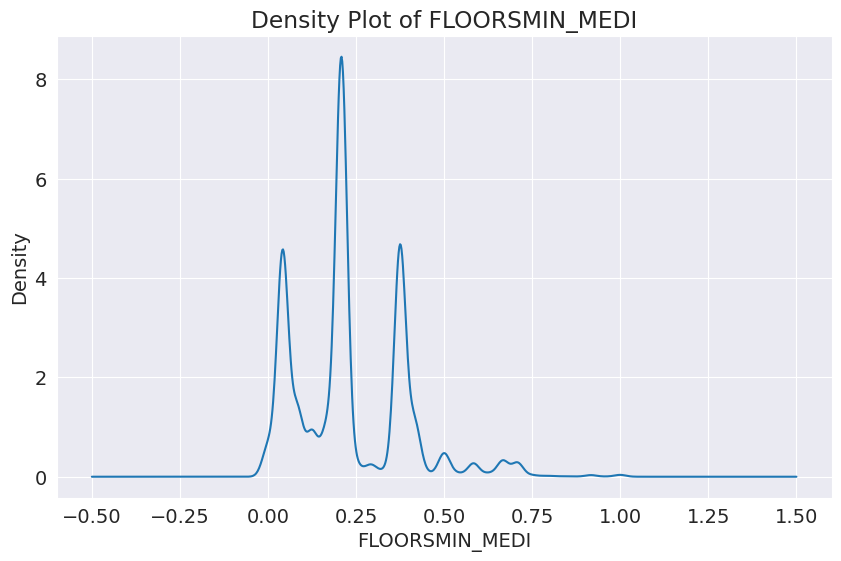

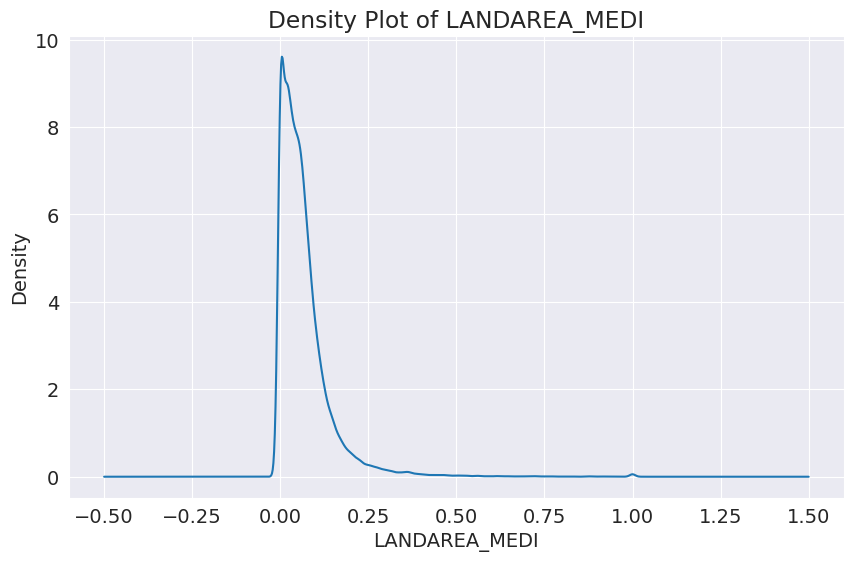

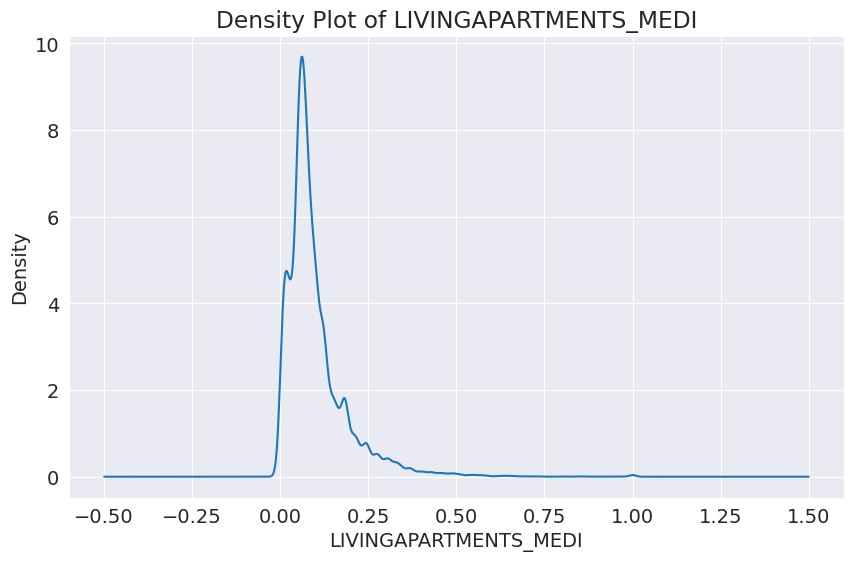

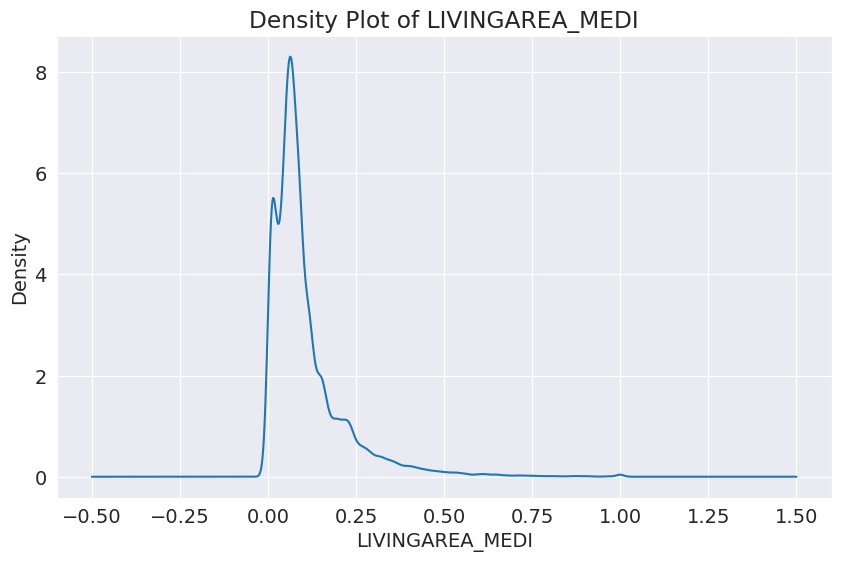

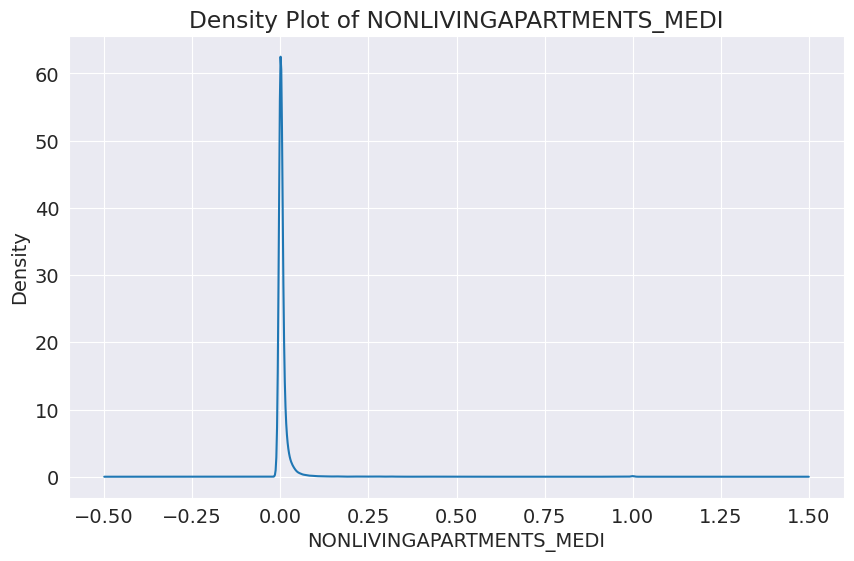

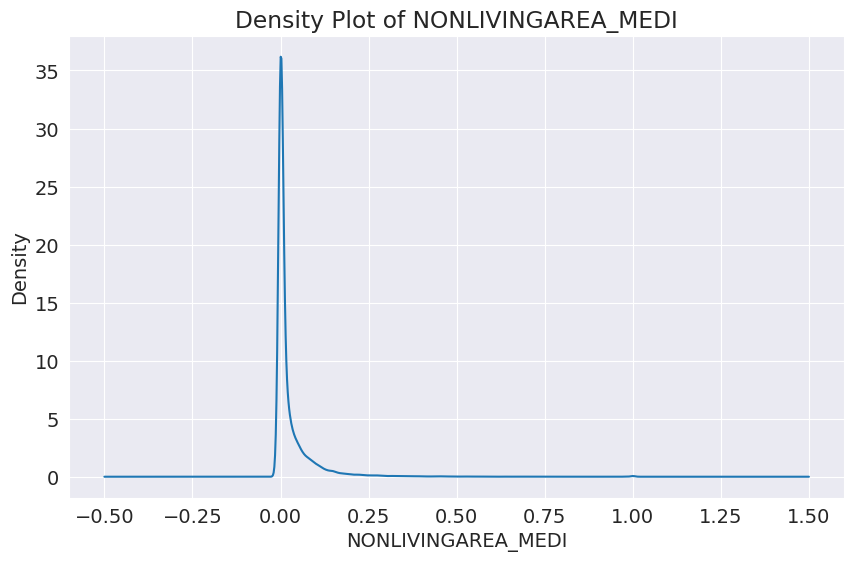

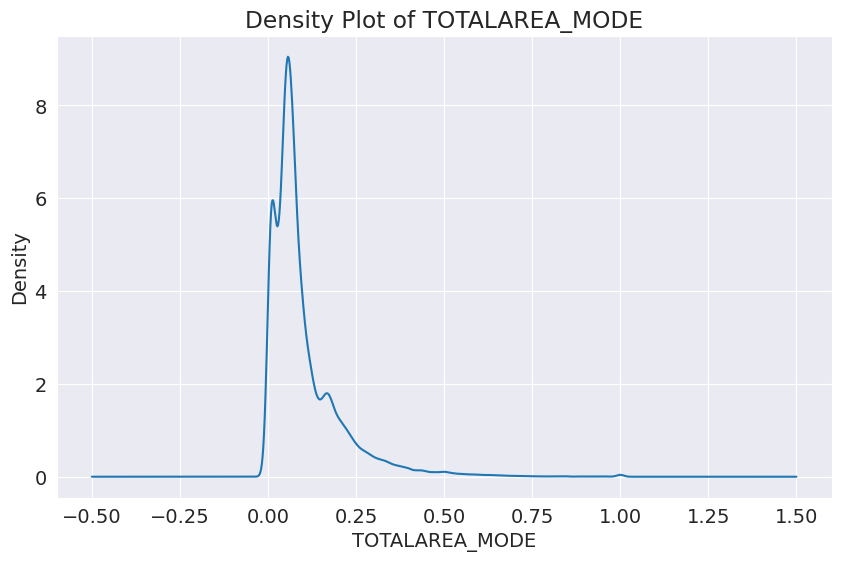

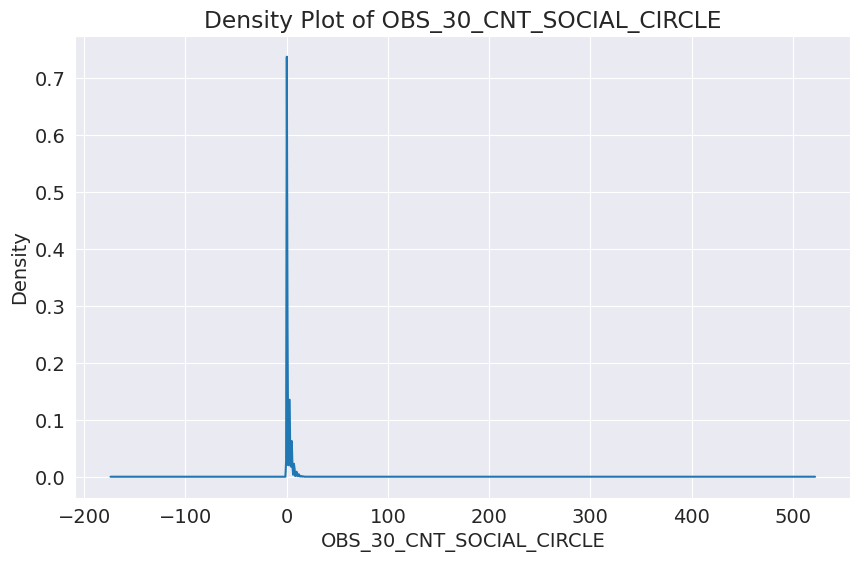

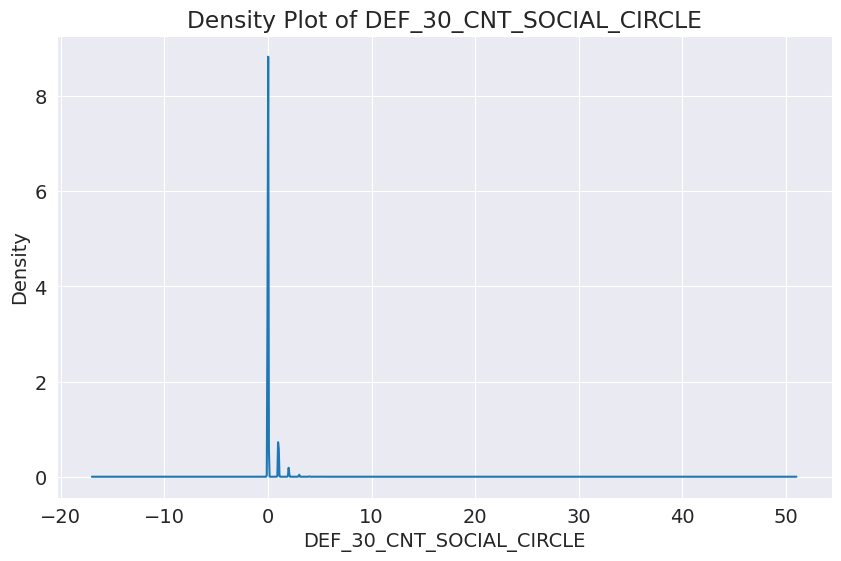

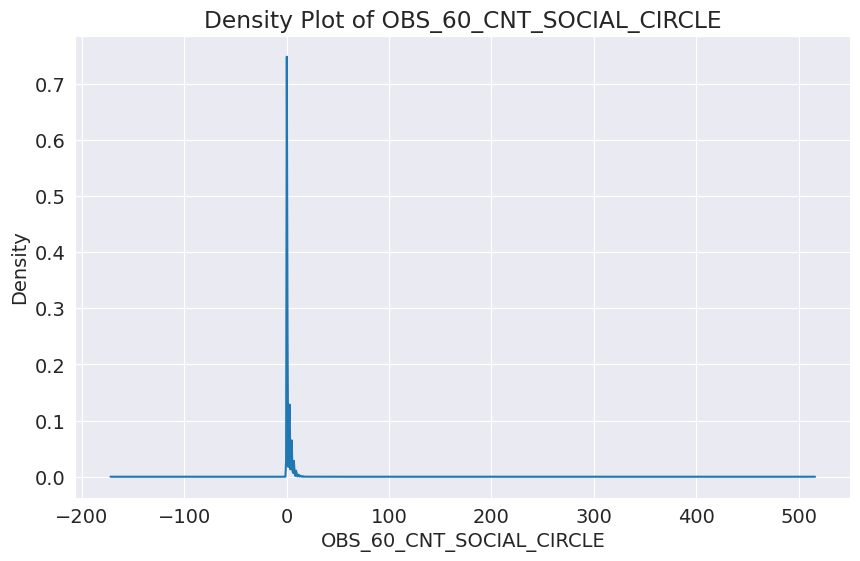

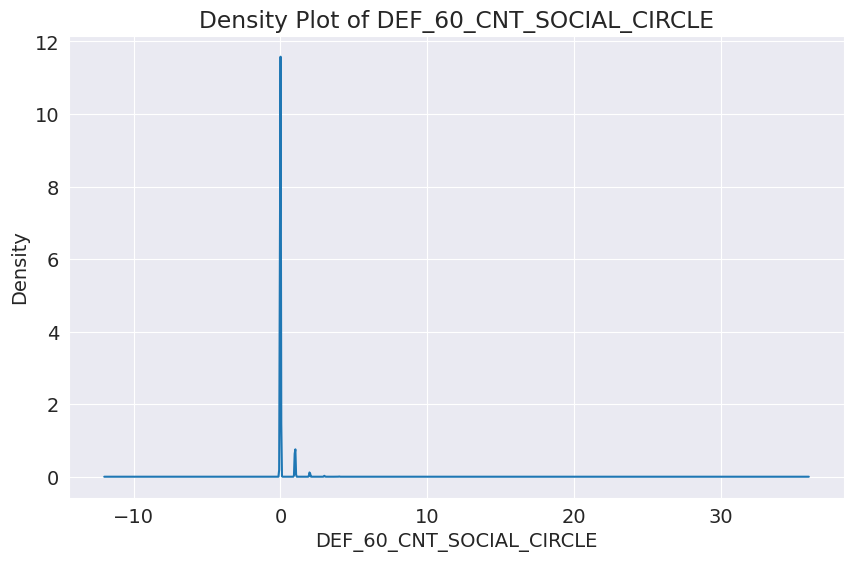

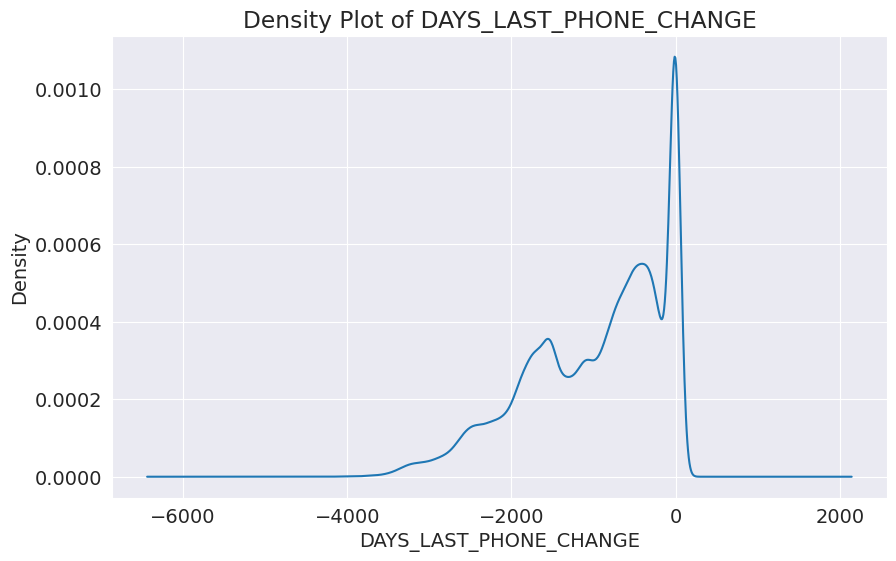

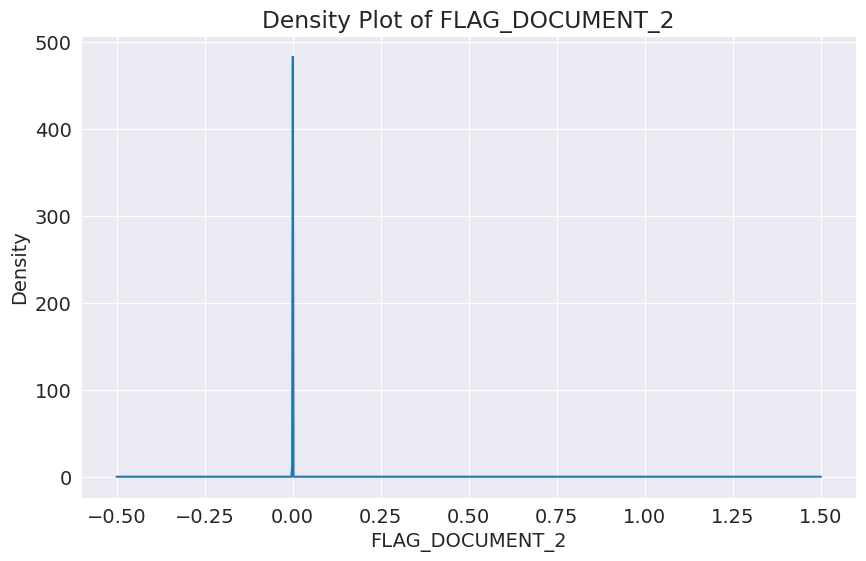

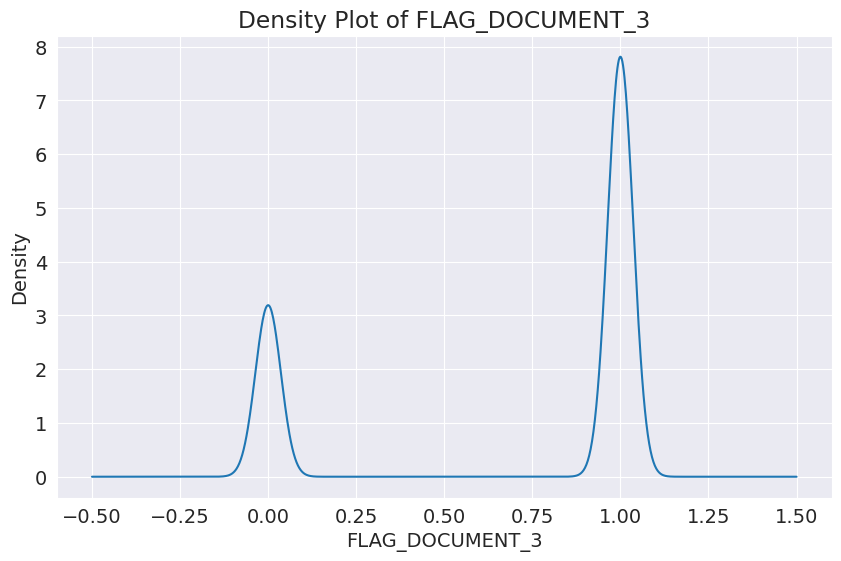

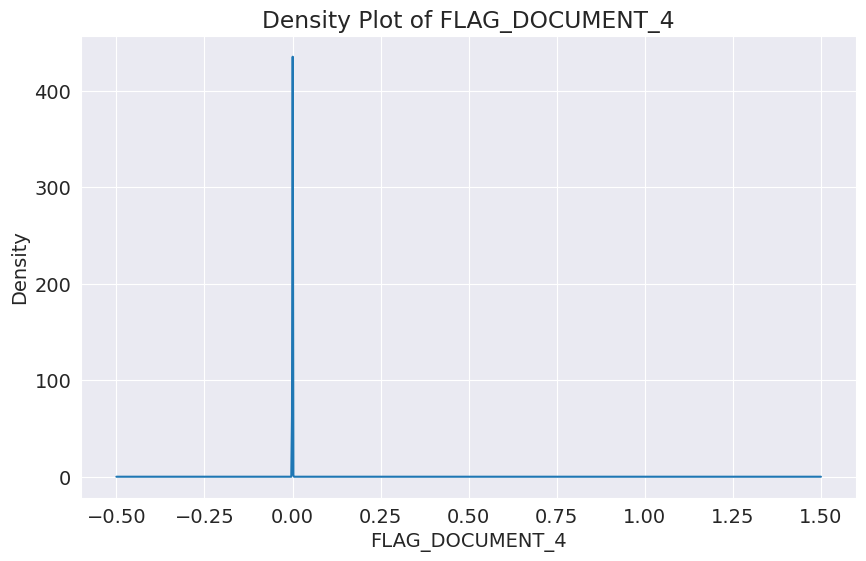

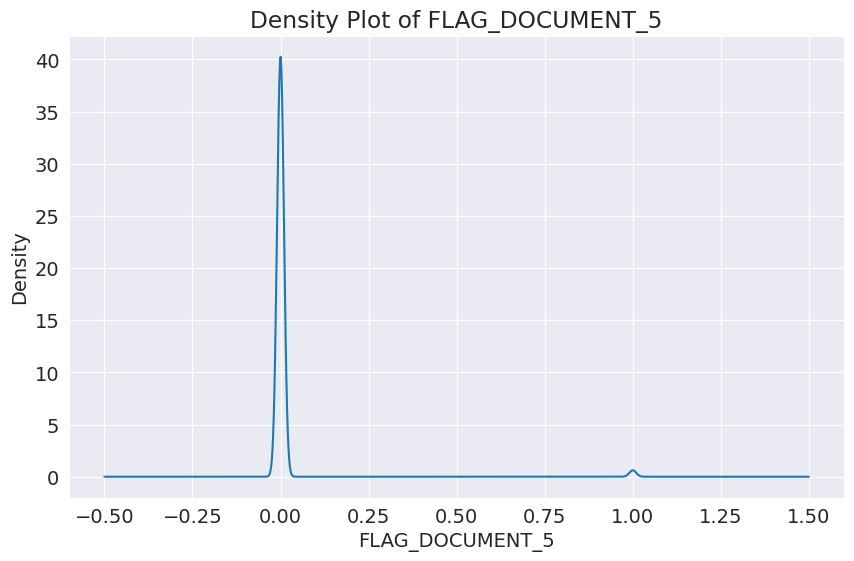

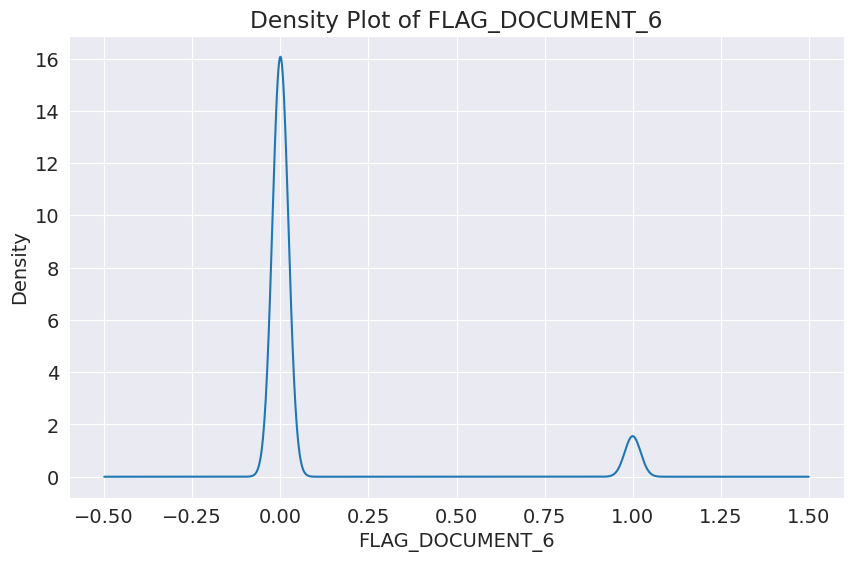

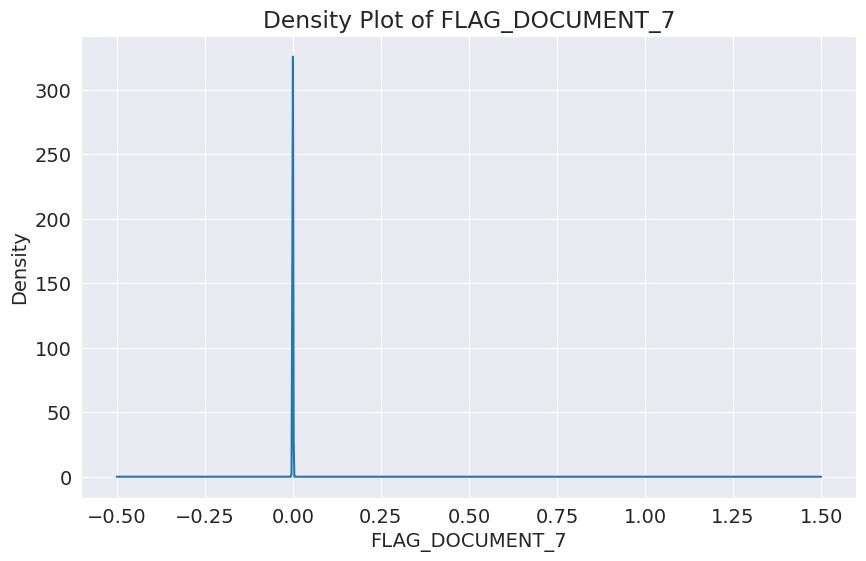

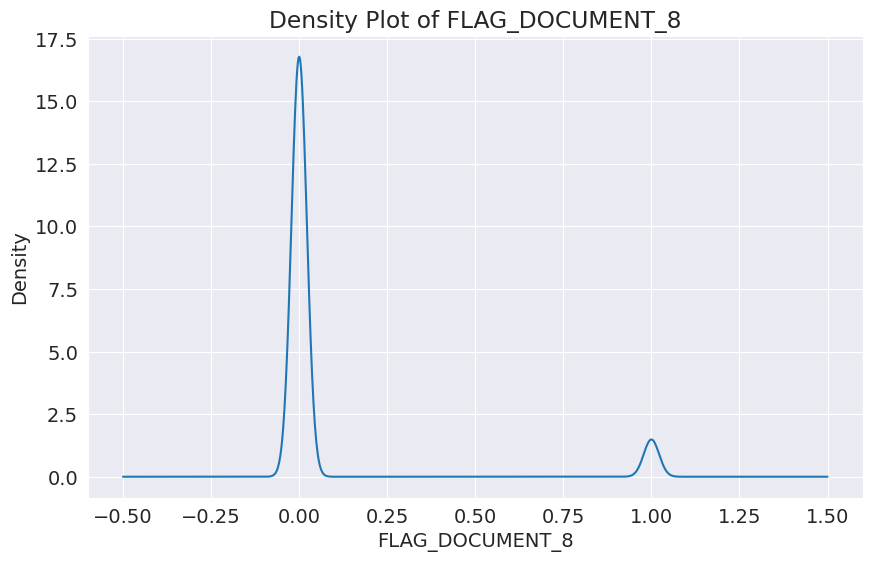

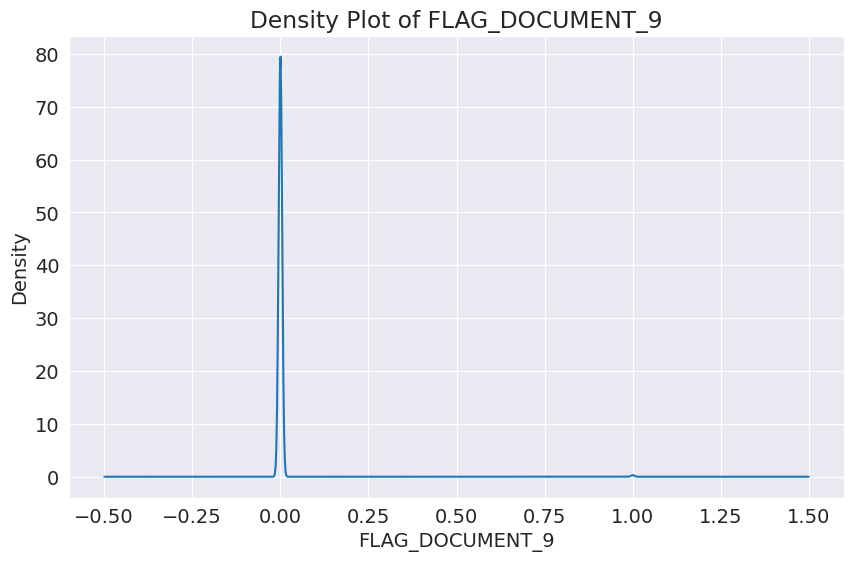

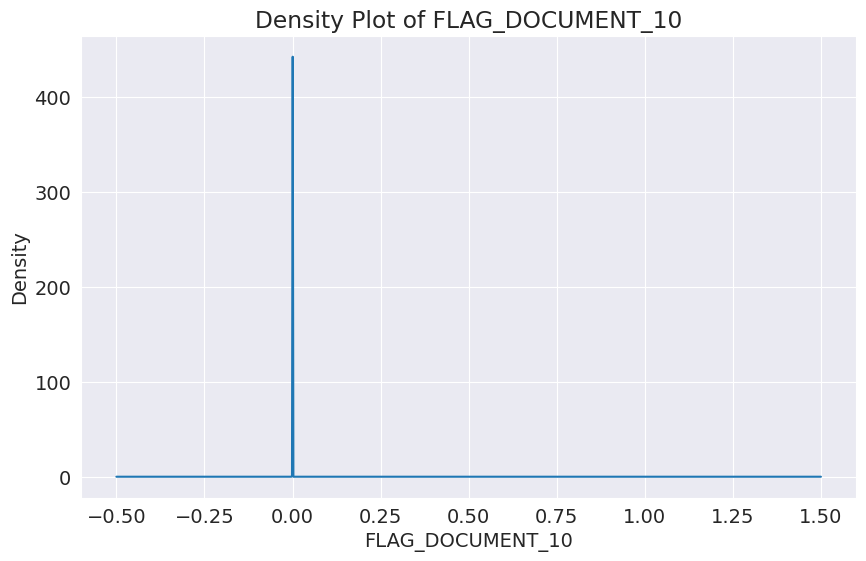

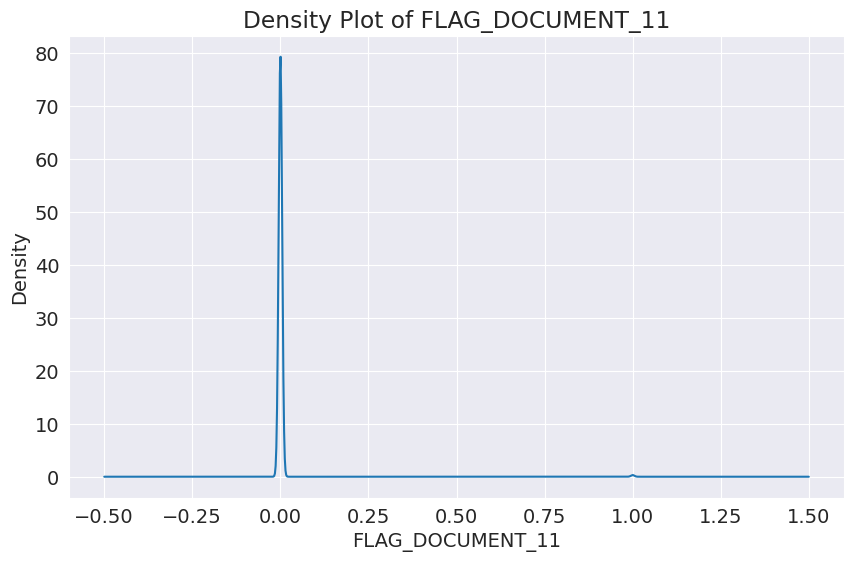

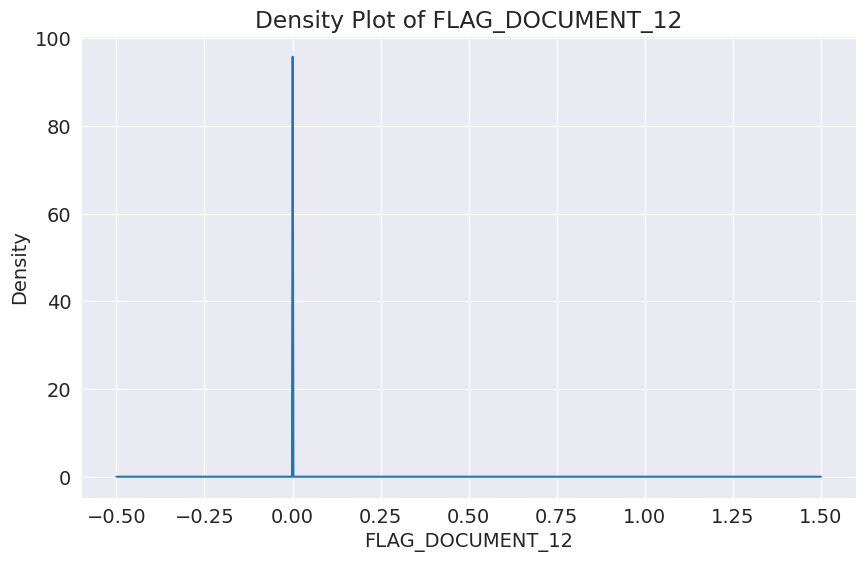

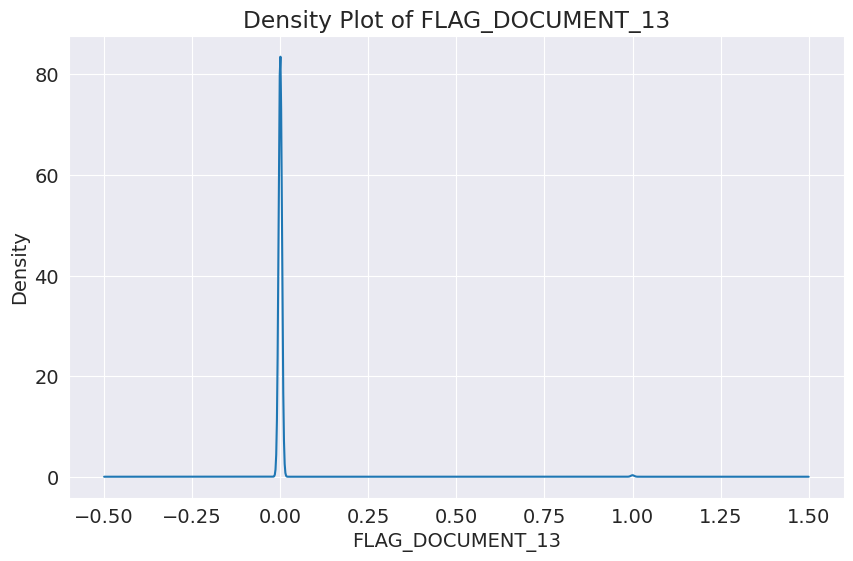

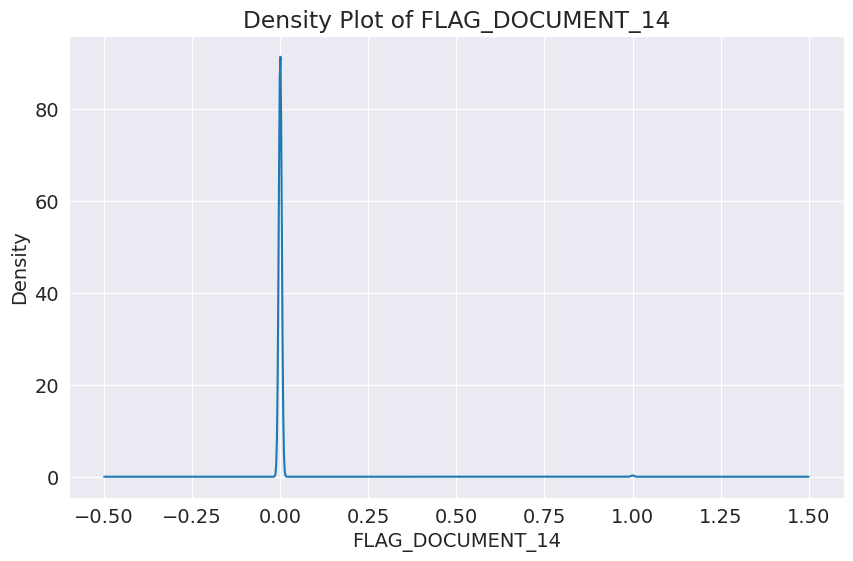

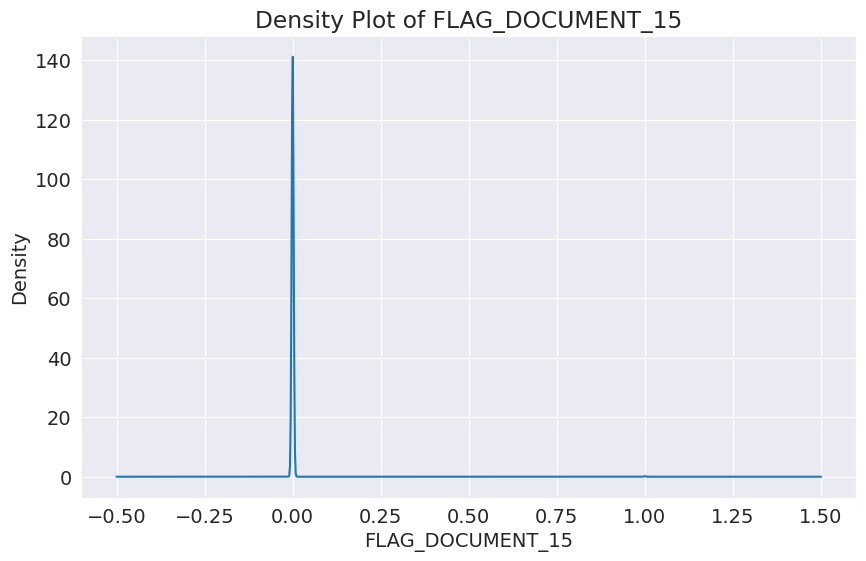

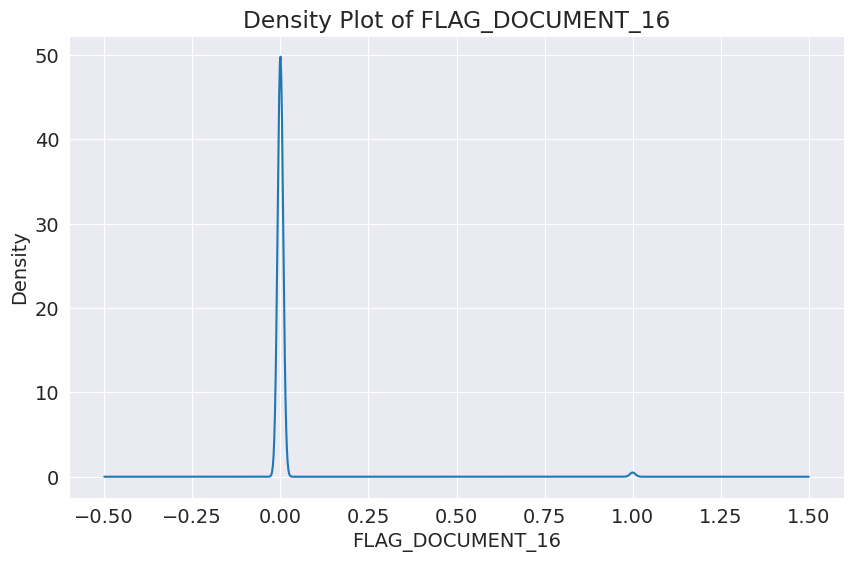

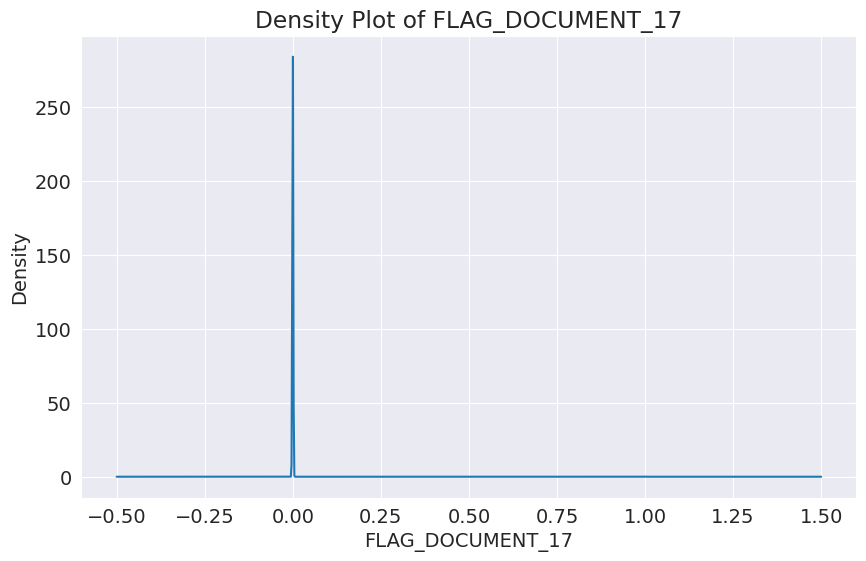

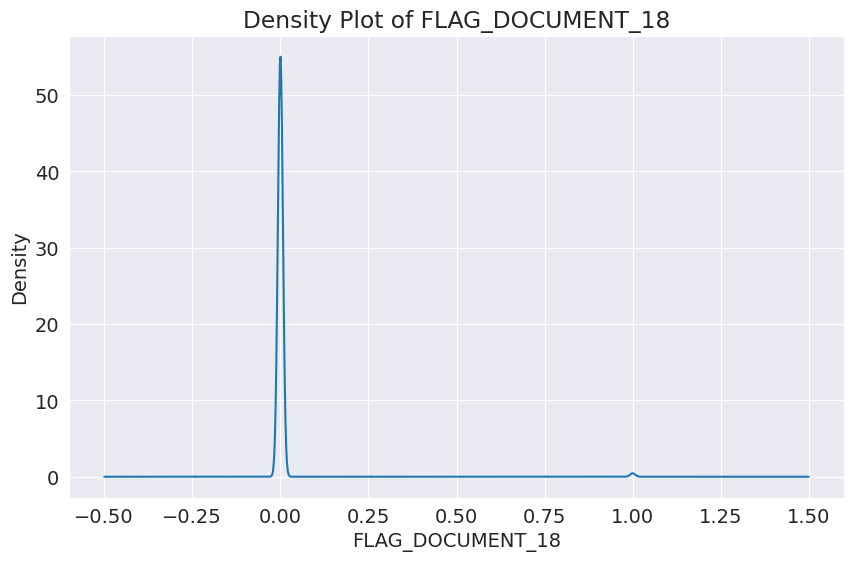

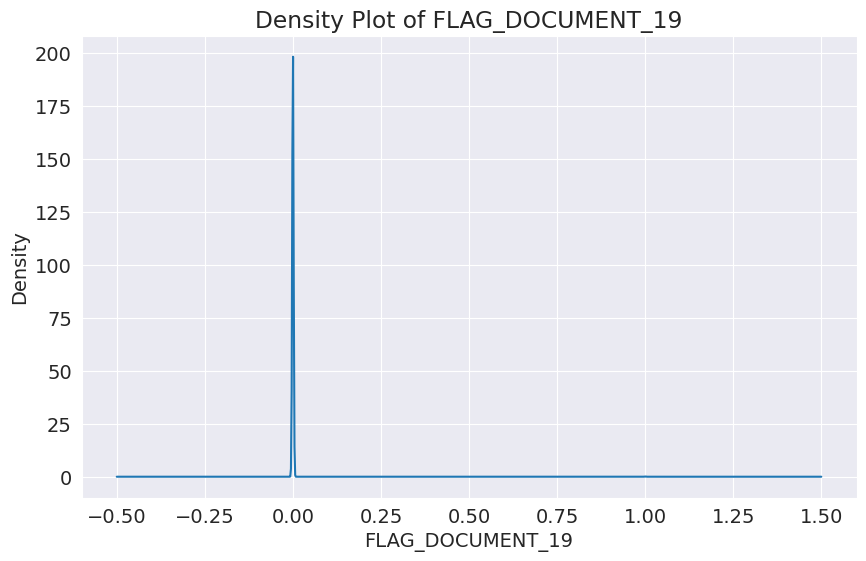

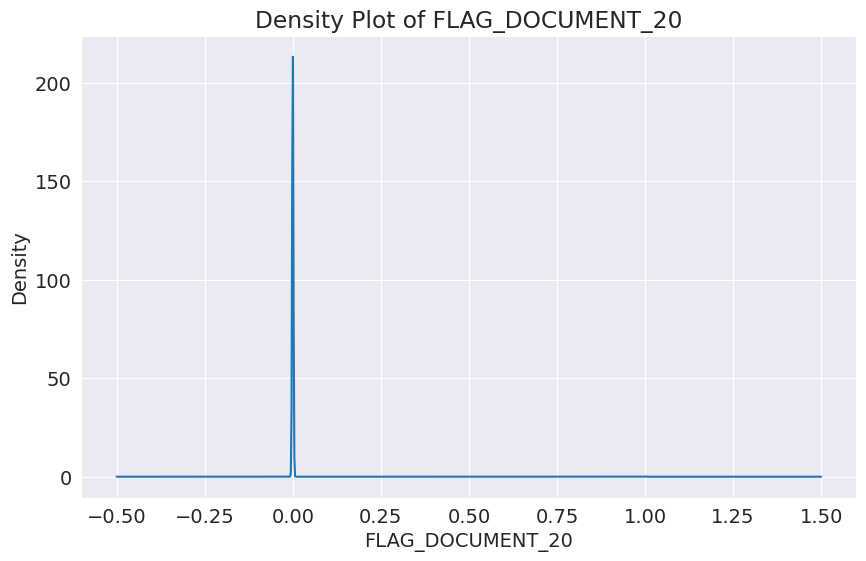

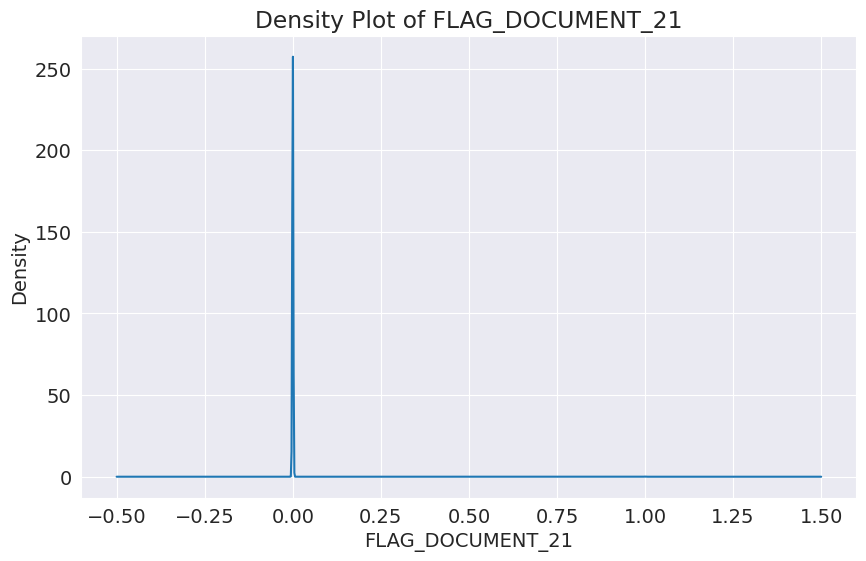

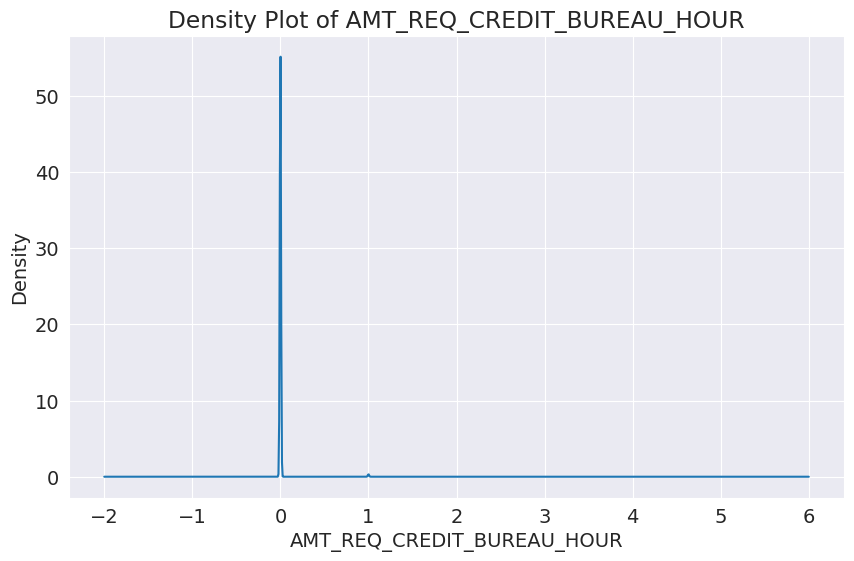

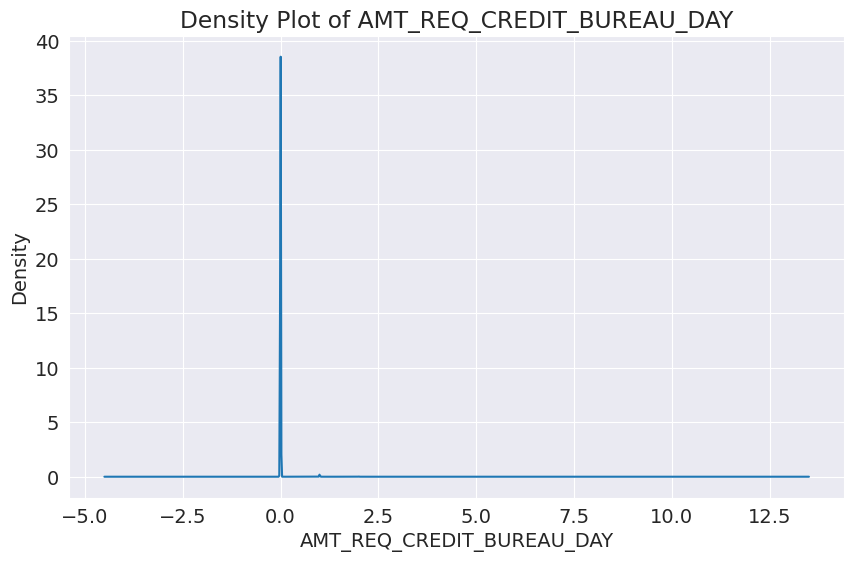

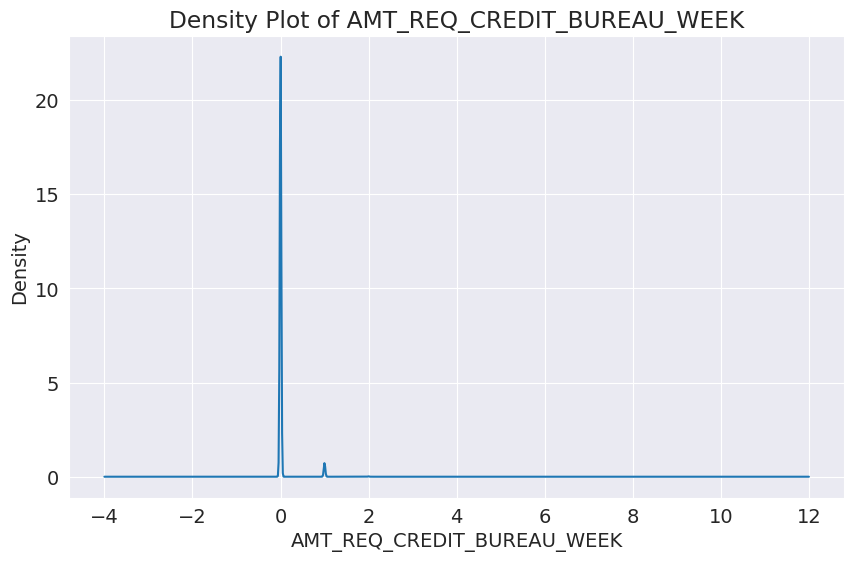

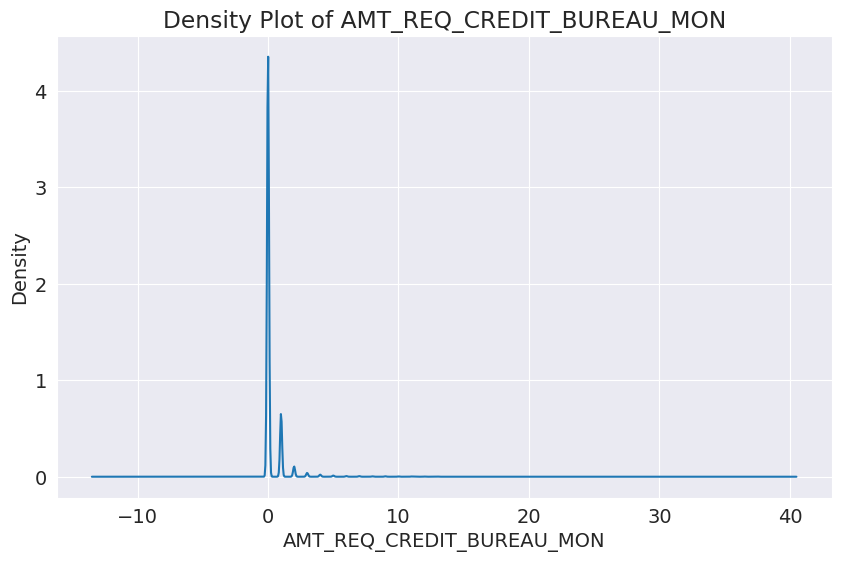

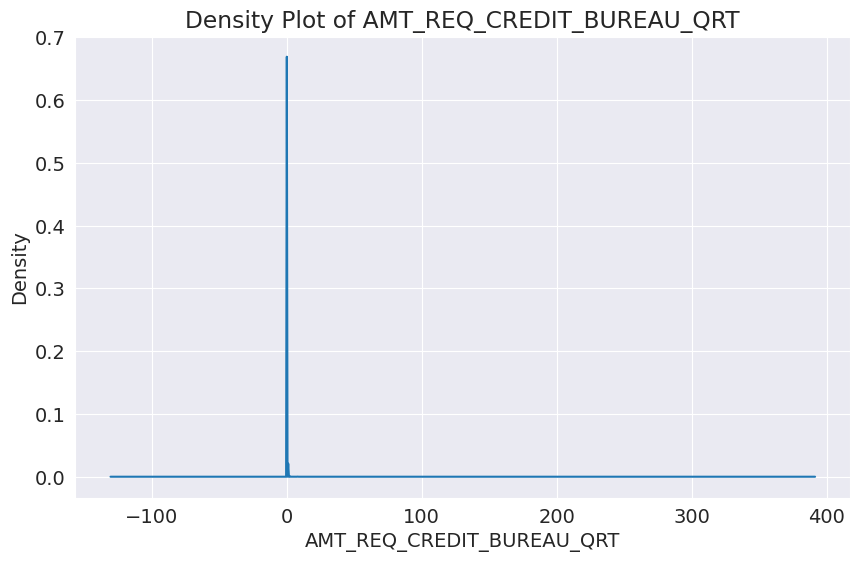

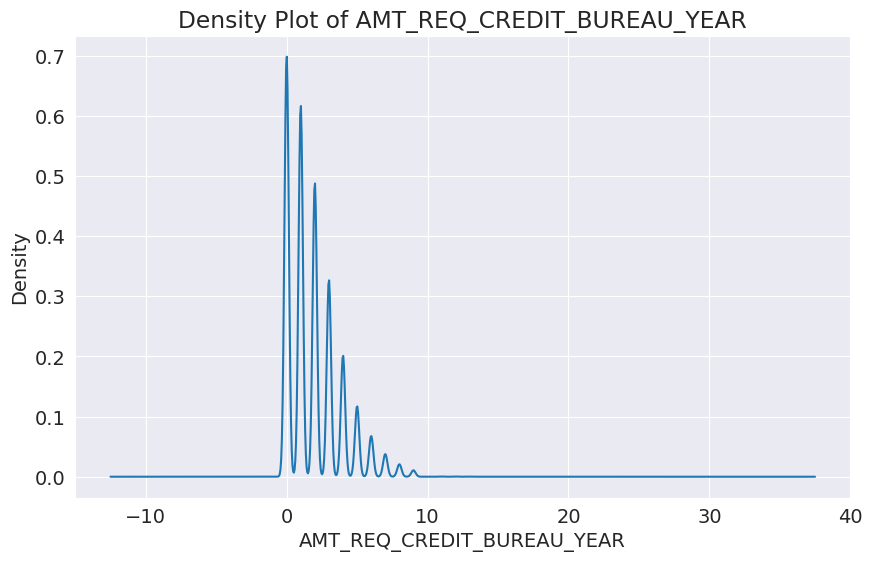

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
loan_df = pd.read_csv('/content/house-loan-data-analysis/loan_data.csv')  # Replace with the actual path to your CSV file

# Select only numerical columns for density plot creation
numerical_columns = loan_df.select_dtypes(include=['number']).columns

# Generate density plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    loan_df[column].plot(kind='density')
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.grid(True)  # Show grid for better scale reading
    plt.show()


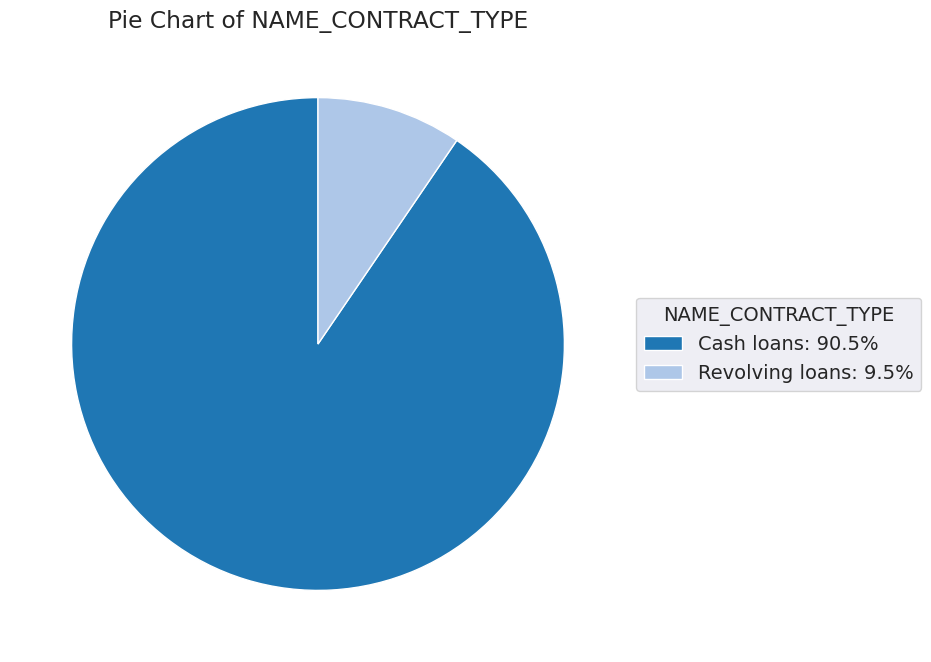

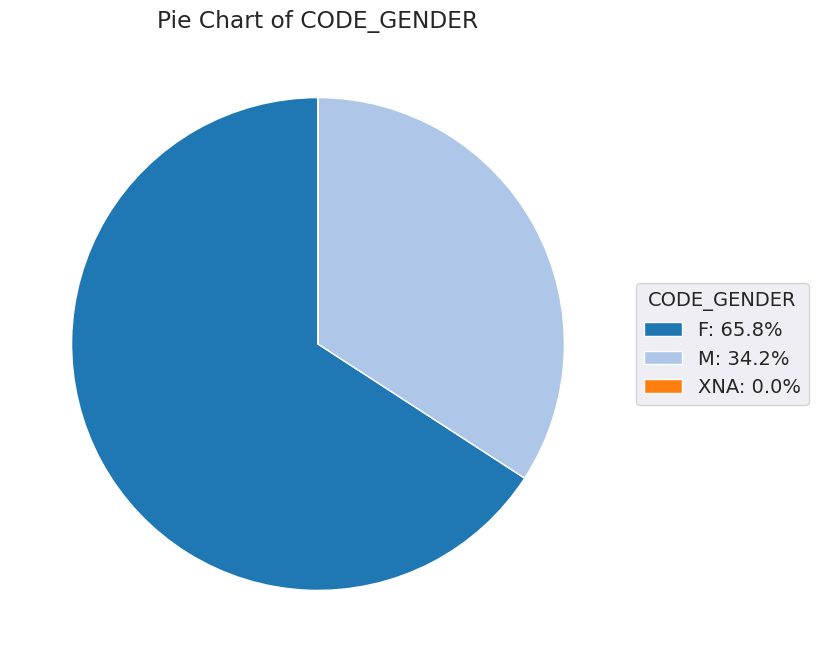

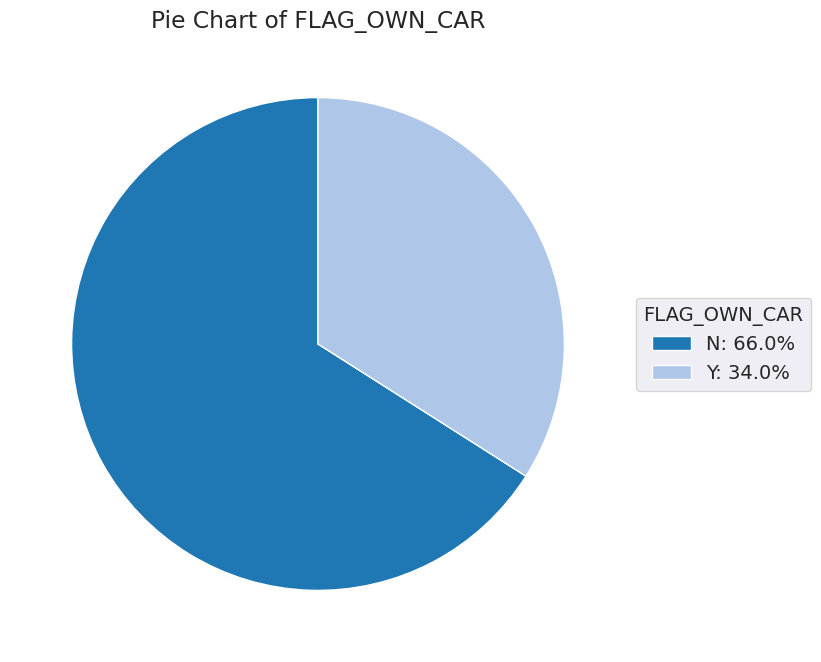

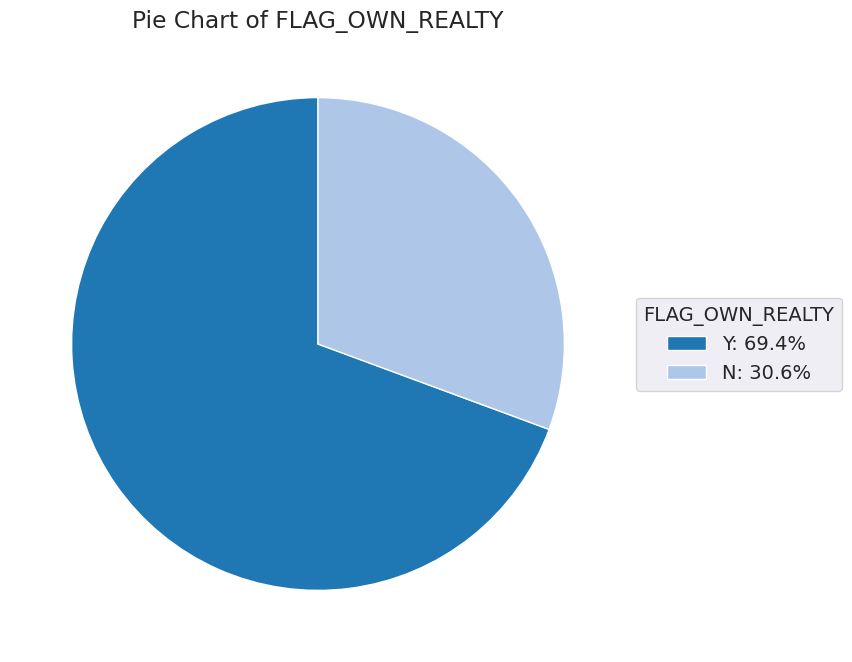

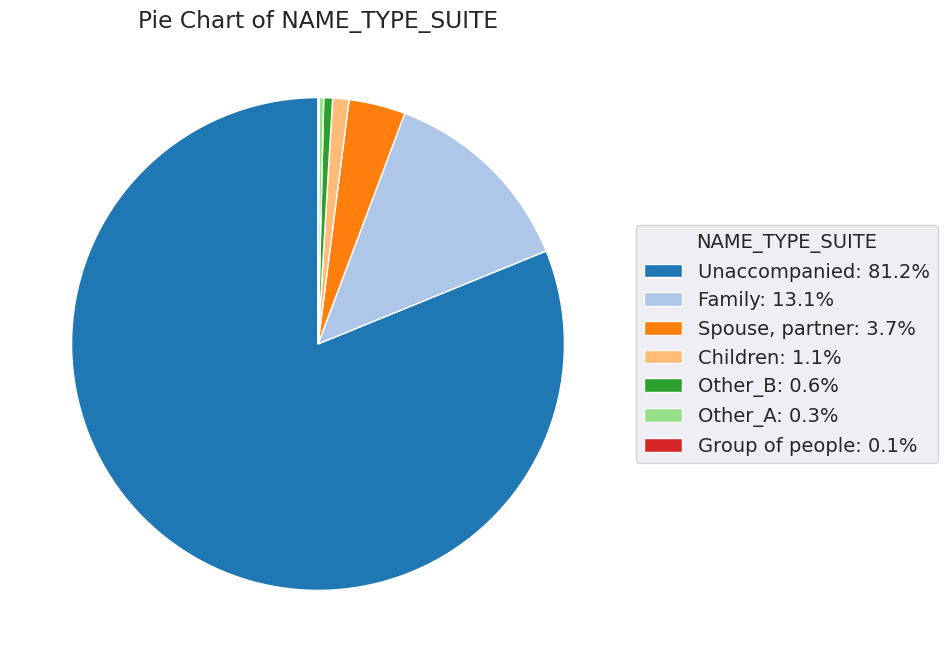

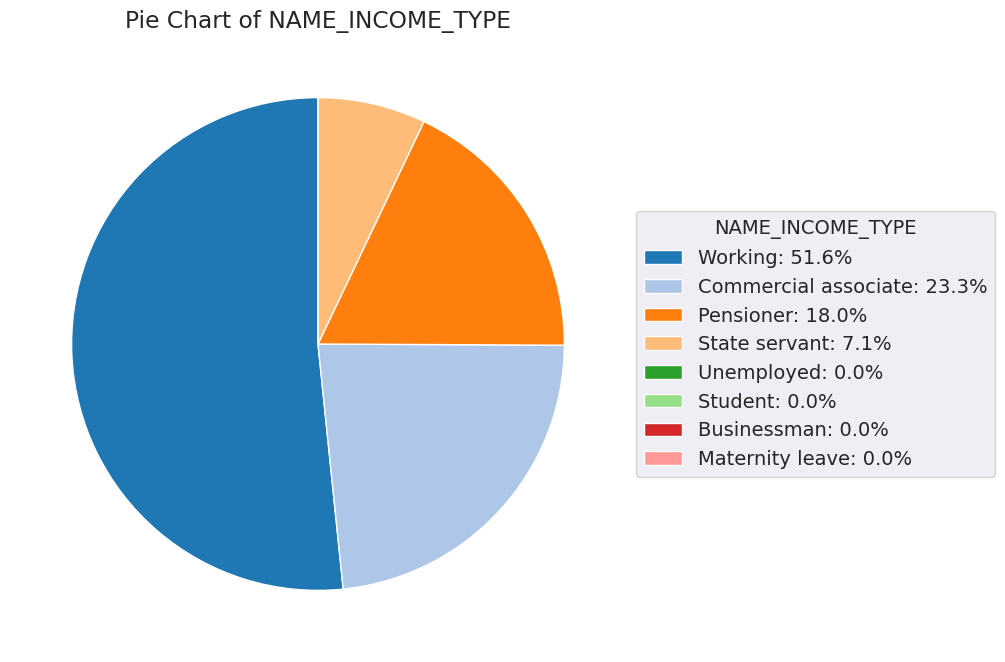

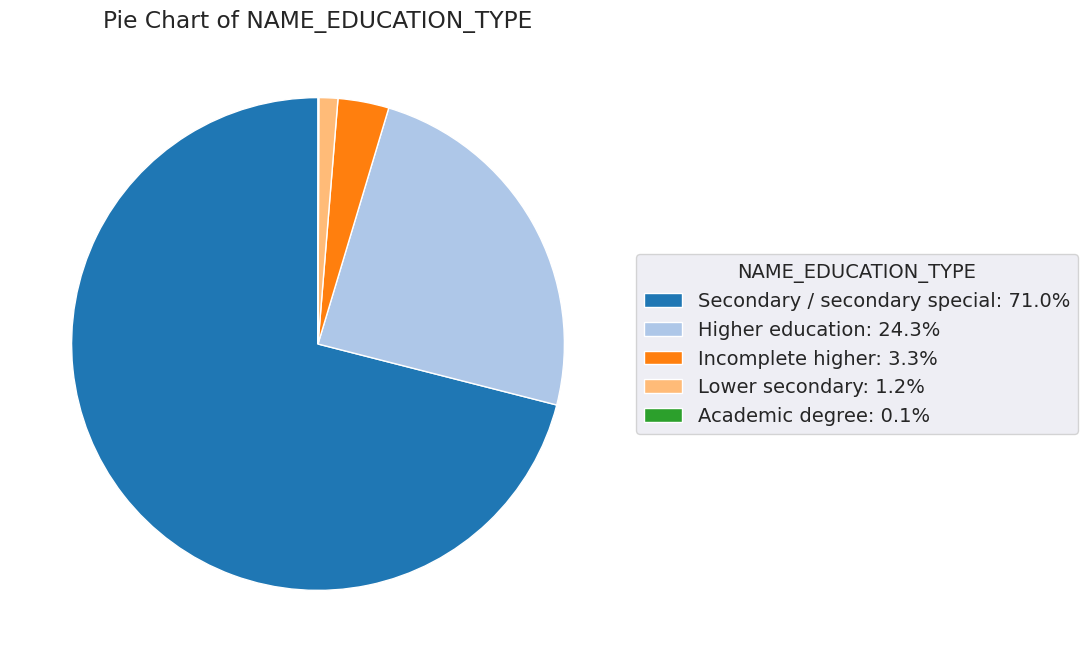

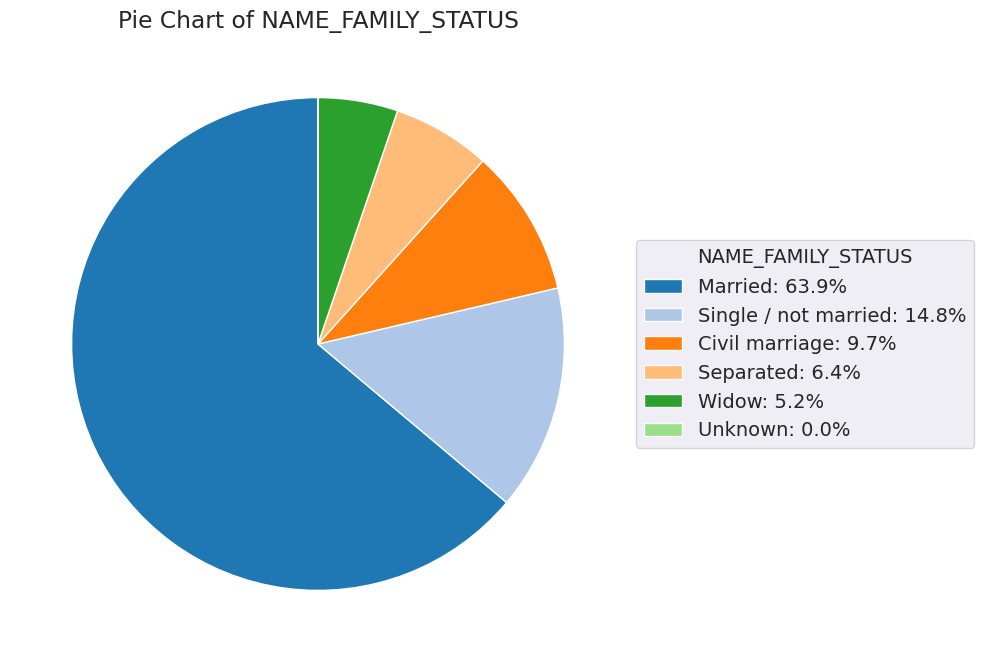

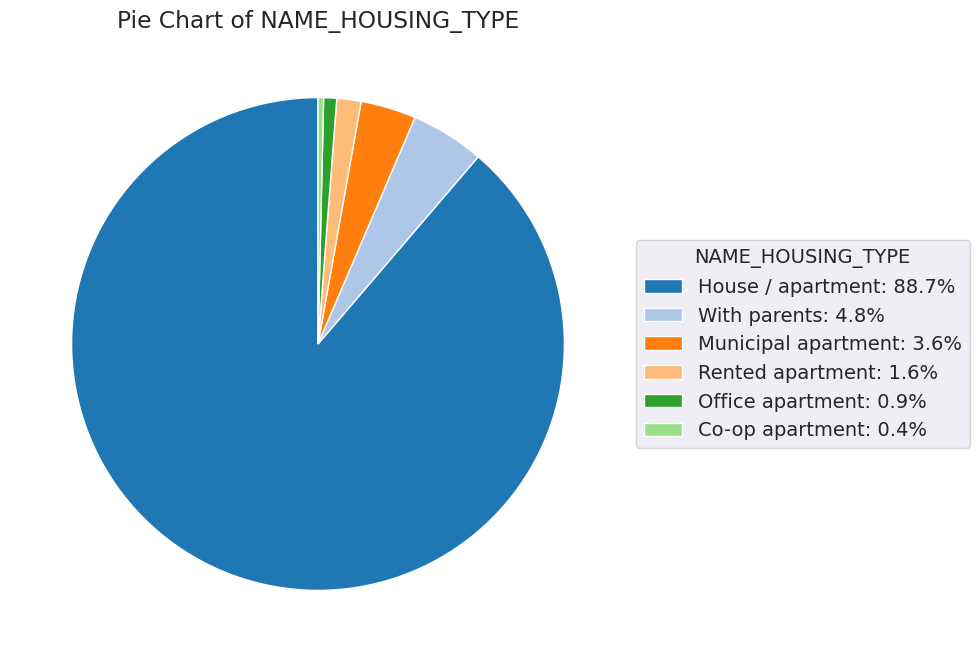

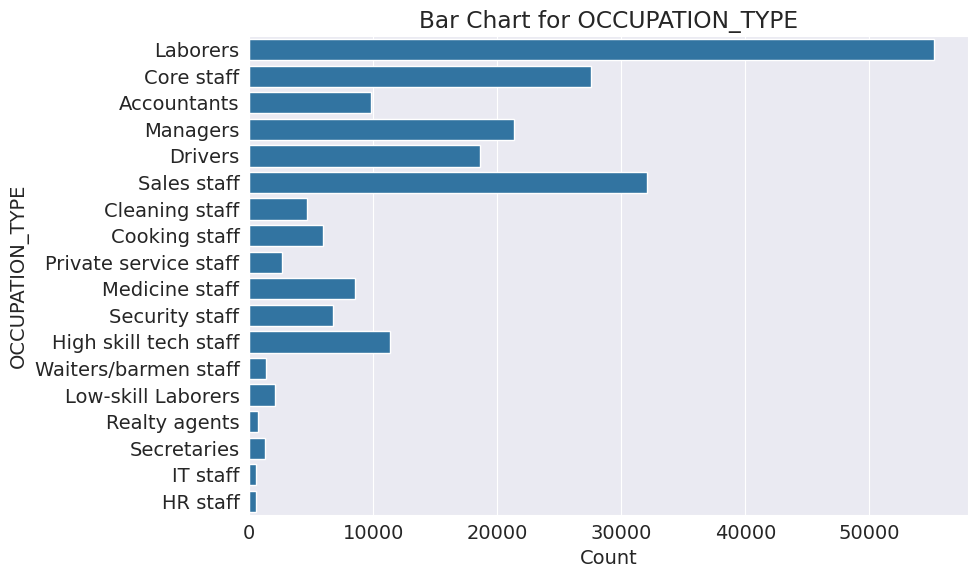

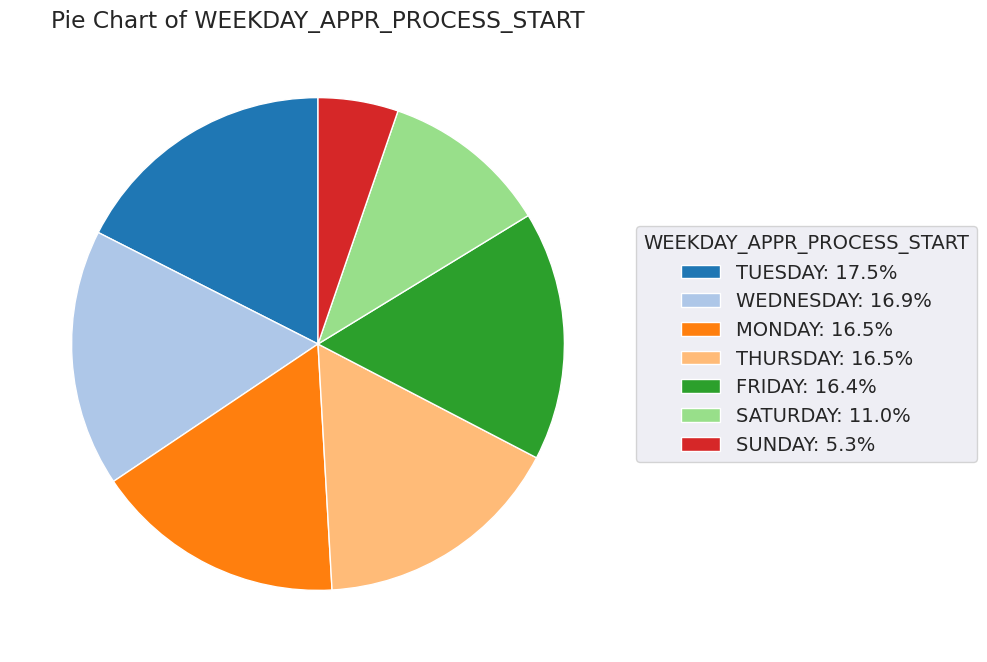

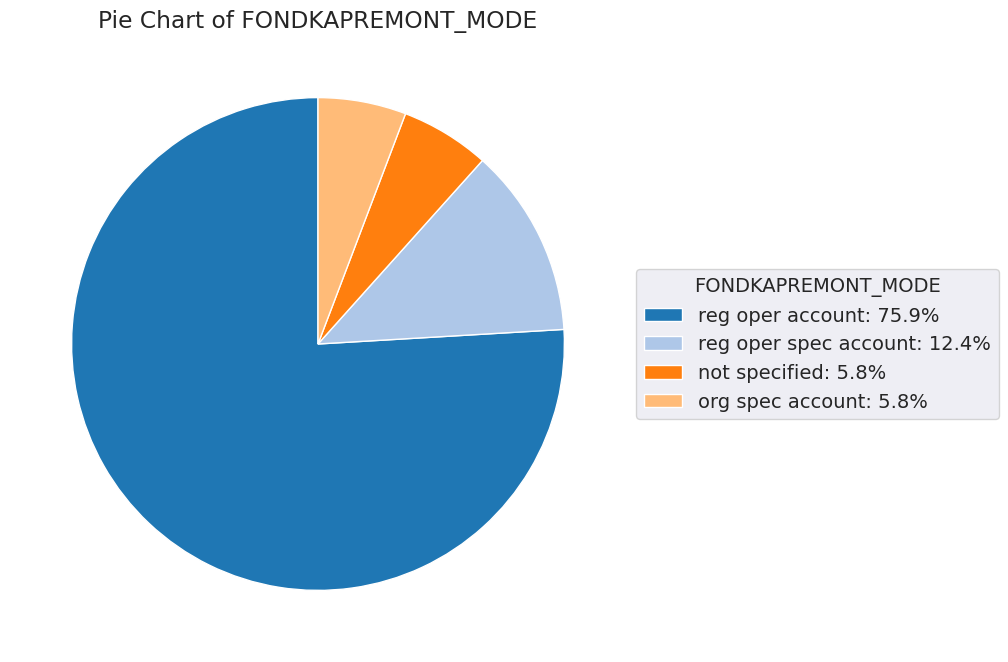

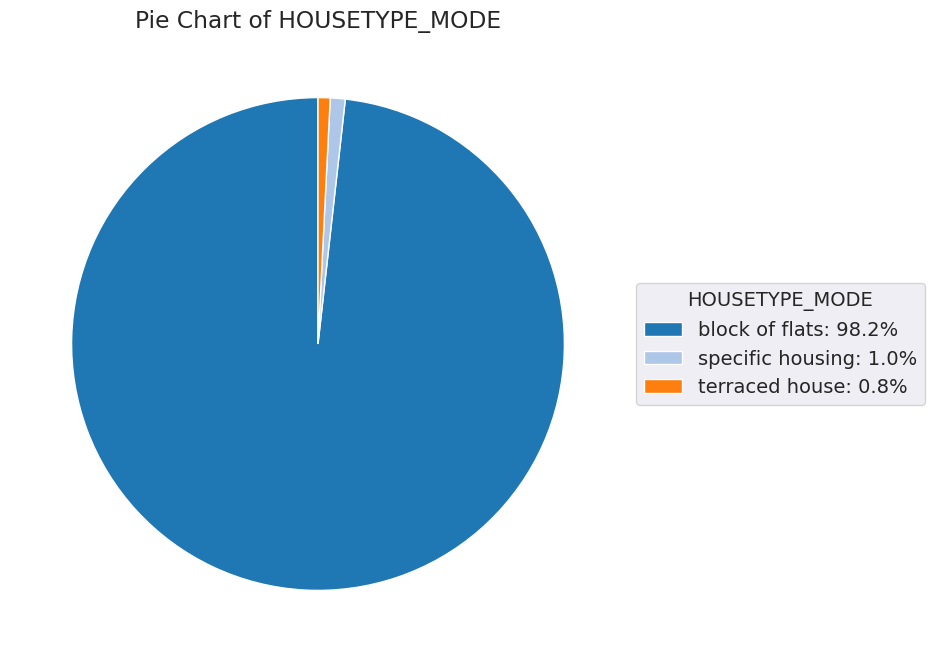

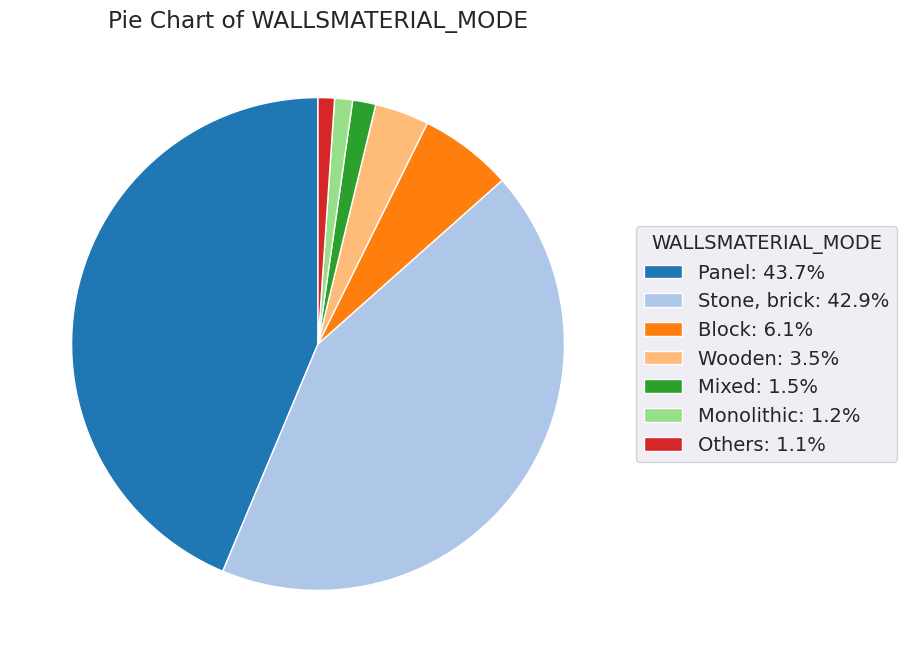

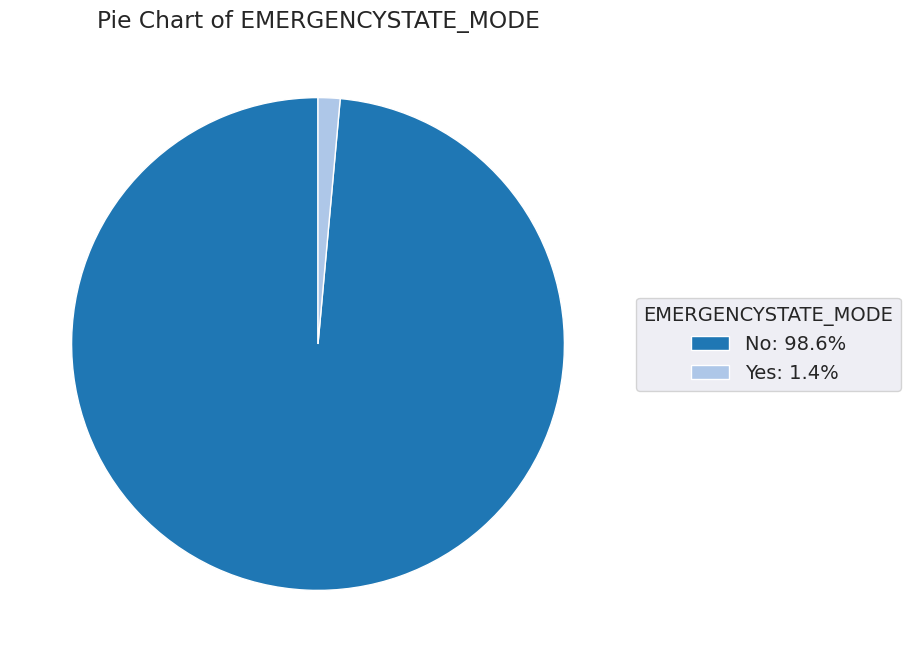

In [56]:
  import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
loan_df = pd.read_csv('/content/house-loan-data-analysis/loan_data.csv')  # Replace this with your actual file path

# Select only categorical columns
categorical_columns = loan_df.select_dtypes(include=['object']).columns

# Exclude 'ORGANIZATION_TYPE' from the EDA graphs
categorical_columns = [col for col in categorical_columns if col != 'ORGANIZATION_TYPE']

# Generate bar charts and pie charts for each categorical column
for column in categorical_columns:
    # Number of unique values determines if a pie chart should be used
    unique_values = loan_df[column].dropna().unique()
    if len(unique_values) <= 10:  # Suitable for pie charts
        # Pie Chart
        plt.figure(figsize=(8, 8))
        data = loan_df[column].value_counts()
        plt.pie(data, startangle=90, colors=plt.cm.tab20.colors[:len(data)])  # Use tab20 colormap
        plt.title(f'Pie Chart of {column}')
        legend_labels = [f'{idx}: {val:1.1f}%' for idx, val in zip(data.index, 100 * data / data.sum())]
        plt.legend(title=column, loc='center left', bbox_to_anchor=(1, 0.5), labels=legend_labels)
        plt.show()
    else:
        # Bar Chart
        plt.figure(figsize=(10, 6))
        sns.countplot(y=column, data=loan_df)
        plt.title(f'Bar Chart for {column}')
        plt.xlabel('Count')
        plt.ylabel(column)
        plt.tight_layout()
        plt.show()
